In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

# Inicio Grafico CasosHospitalizados_InfluVSR

In [2]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [3]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 26_01_2023 07_31_57.xlsx'

In [4]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 26_1_2023'

In [5]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 23_01_2023 07_31_52.xlsx')

In [6]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [7]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza A',2:'Influenza B'})

In [8]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza nao subtipado',
4:'Influenza nao subtipado',5:'Influenza nao subtipado',6:'Influenza nao subtipado'})

In [9]:
dados['Faixa Etaria'] = dados['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
                                                         '40-49 anos':'20-59 anos','50-59 anos':'20-59 anos','60-69 anos':'60 anos ou mais','70-79 anos':'60 anos ou mais',
                                                         '80 e mais anos':'60 anos ou mais'})

In [10]:
teste = dados.groupby('Sem Epi Internacao').count()
teste.tail()

,Numero da Notificacao,Data da Notificacao,Sem Epid Notif,Data Primeiros Sintomas,Sem Epid Prim Sint,Cod Municipio Notificacao,Nome Municipio Notificacao,co_uni_not,Nome Unidade Notificacao,Vinculo SUS,...,v_lote_dose_REF_D4,v_lote_dose_UNICA,v_nome_dose_1,v_nome_dose_2,v_nome_dose_REF_D3,v_nome_dose_REF_D4,v_nome_dose_UNICA,Reinfeccao,Municipio_Mais_Populoso,Bandeira
Sem Epi Internacao,,,,,,,,,,,,,,,,,,,,,
2022_50,461,461,461,461,461,461,461,461,461,457,...,111,7,330,317,268,111,7,31,461,0
2022_51,460,460,460,460,460,460,460,460,460,451,...,118,2,357,342,267,118,2,40,460,0
2022_52,514,514,514,514,514,514,514,514,513,506,...,178,6,394,391,342,178,6,41,514,0
2023_01,147,147,147,147,147,147,147,147,147,144,...,49,1,116,112,90,49,1,10,147,0
2023_02,15,15,15,15,15,15,15,15,15,15,...,4,0,12,10,9,4,0,0,15,0


In [300]:
filtro_casosHospitalizados = dados[['Sem Epi Internacao','Classificacao final','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_casosHospitalizados 

,Sem Epi Internacao,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_03,SRAG não especificado,NaN,NaN,NaN,NaN
1,2020_02,SRAG não especificado,NaN,NaN,NaN,NaN
2,2020_02,SRAG não especificado,NaN,NaN,NaN,NaN
3,2020_02,SRAG não especificado,NaN,NaN,NaN,NaN
4,2020_03,SRAG não especificado,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
187544,2023_01,SRAG não especificado,NaN,NaN,NaN,NaN
187545,2022_48,COVID-19,NaN,NaN,NaN,NaN
187546,2022_48,COVID-19,NaN,NaN,NaN,NaN
187547,2020_29,SRAG não especificado,NaN,NaN,NaN,NaN


In [301]:
base = filtro_casosHospitalizados.groupby('Sem Epi Internacao').count()
base

,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Internacao,,,,,
2020_01,11,1,1,0,0
2020_02,24,0,0,0,0
2020_03,16,1,1,0,0
2020_04,22,1,1,0,0
2020_05,19,2,2,2,0
...,...,...,...,...,...
2022_50,461,151,6,6,23
2022_51,460,131,5,5,18
2022_52,514,168,3,2,22


In [302]:
influH1 = filtro_casosHospitalizados.loc[filtro_casosHospitalizados['pcr_fluasu']=='Influenza A(H1N1)pdm09'] #pega as linhas onde tem Influenza A(H1N1)pdm09
influH1 = influH1.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influH1 = influH1.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influH1 = influH1.fillna(0) #Substitui NaN (vazio) por zero
influH1

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,0.0,0.0,0.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,0.0,0.0,0.0,0.0,0.0,16,1,1,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,22,1,1,0,0
2020_05,2.0,2.0,2.0,2.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_50,4.0,4.0,4.0,4.0,0.0,461,151,6,6,23
2022_51,3.0,3.0,3.0,3.0,0.0,460,131,5,5,18
2022_52,0.0,0.0,0.0,0.0,0.0,514,168,3,2,22


In [303]:
influH1 = influH1['pcr_fluasu_x'] #Pega os valores da coluna pcr_fluasu_x

In [304]:
influH3 = filtro_casosHospitalizados.loc[filtro_casosHospitalizados['pcr_fluasu']=='Influenza A(H3N2)'] #pega as linhas onde tem Influenza A(H3N2)
influH3 = influH3.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influH3 = influH3.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influH3 = influH3.fillna(0) #Substitui NaN (vazio) por zero
influH3

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,0.0,0.0,0.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,0.0,0.0,0.0,0.0,0.0,16,1,1,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,22,1,1,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_50,1.0,1.0,1.0,1.0,0.0,461,151,6,6,23
2022_51,2.0,2.0,2.0,2.0,0.0,460,131,5,5,18
2022_52,1.0,1.0,1.0,1.0,0.0,514,168,3,2,22


In [305]:
influH3 = influH3['pcr_fluasu_x'] #Pega os valores da coluna pcr_fluasu_x

In [306]:
influNaoSubtipado = filtro_casosHospitalizados.loc[filtro_casosHospitalizados['pcr_fluasu']=='Influenza nao subtipado'] #pega as linhas onde tem Influenza nao subtipado
influNaoSubtipado = influNaoSubtipado.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influNaoSubtipado = influNaoSubtipado.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influNaoSubtipado = influNaoSubtipado.fillna(0) #Substitui NaN (vazio) por zero
influNaoSubtipado

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,0.0,0.0,0.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,0.0,0.0,0.0,0.0,0.0,16,1,1,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,22,1,1,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_50,1.0,1.0,1.0,1.0,0.0,461,151,6,6,23
2022_51,0.0,0.0,0.0,0.0,0.0,460,131,5,5,18
2022_52,1.0,1.0,1.0,1.0,0.0,514,168,3,2,22


In [307]:
influNaoSubtipado = influNaoSubtipado['pcr_fluasu_x'] #Pega os valores da coluna pcr_fluasu_x

In [308]:
influB = filtro_casosHospitalizados.loc[filtro_casosHospitalizados['tp_flu_pcr']=='Influenza B'] #pega as linhas onde tem Influenza B
influB = influB.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
influB = influB.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influB = influB.fillna(0) #Substitui NaN (vazio) por zero
influB

,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Internacao,,,,,,,,,,
2020_01,1.0,1.0,1.0,0.0,0.0,11,1,1,0,0
2020_02,0.0,0.0,0.0,0.0,0.0,24,0,0,0,0
2020_03,1.0,1.0,1.0,0.0,0.0,16,1,1,0,0
2020_04,1.0,1.0,1.0,0.0,0.0,22,1,1,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...
2022_50,0.0,0.0,0.0,0.0,0.0,461,151,6,6,23
2022_51,0.0,0.0,0.0,0.0,0.0,460,131,5,5,18
2022_52,1.0,1.0,1.0,0.0,0.0,514,168,3,2,22


In [309]:
influB = influB['tp_flu_pcr_x'] #Pega os valores da coluna pcr_fluasu_x

In [310]:
filtro_casosHospitalizadosvsr = dados[['Sem Epi Internacao','Classificacao final','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_casosHospitalizadosvsr = filtro_casosHospitalizadosvsr.loc[filtro_casosHospitalizadosvsr['Classificacao final'] == 'SRAG por outro vírus resp']
filtro_casosHospitalizadosvsr 

,Sem Epi Internacao,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
14,2020_04,SRAG por outro vírus resp,NaN,NaN,NaN,NaN
24,2020_05,SRAG por outro vírus resp,NaN,NaN,NaN,NaN
30,2020_01,SRAG por outro vírus resp,NaN,NaN,NaN,NaN
53,2020_07,SRAG por outro vírus resp,NaN,NaN,NaN,NaN
80,2020_08,SRAG por outro vírus resp,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
187475,2022_27,SRAG por outro vírus resp,Nao,NaN,NaN,1.0
187481,2022_24,SRAG por outro vírus resp,Nao,NaN,NaN,1.0
187482,2022_26,SRAG por outro vírus resp,Nao,NaN,NaN,1.0
187485,2022_22,SRAG por outro vírus resp,NaN,NaN,NaN,1.0


In [311]:
vsr = filtro_casosHospitalizadosvsr.loc[filtro_casosHospitalizadosvsr['pcr_vsr']==1] #Pega as linhas onde é igual a 1 na coluna pcr_vsr (positivo para VSR)
vsr = vsr.groupby('Sem Epi Internacao').count() #Agrupa por semana de internação e faz uma contagem
vsr = vsr.reset_index() #Apenas reseta o index do DataFrame (tabela)
vsr = vsr.merge(base, how='right', on='Sem Epi Internacao') #Apenas para ter todas as semanas, mesmo que zeradas
vsr

,Sem Epi Internacao,Classificacao final_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_01,NaN,NaN,NaN,NaN,NaN,11,1,1,0,0
1,2020_02,NaN,NaN,NaN,NaN,NaN,24,0,0,0,0
2,2020_03,NaN,NaN,NaN,NaN,NaN,16,1,1,0,0
3,2020_04,NaN,NaN,NaN,NaN,NaN,22,1,1,0,0
4,2020_05,NaN,NaN,NaN,NaN,NaN,19,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
154,2022_50,18.0,11.0,0.0,0.0,18.0,461,151,6,6,23
155,2022_51,14.0,9.0,0.0,0.0,14.0,460,131,5,5,18
156,2022_52,18.0,12.0,0.0,0.0,18.0,514,168,3,2,22
157,2023_01,4.0,4.0,0.0,0.0,4.0,147,48,2,2,4


In [312]:
vsr = vsr.fillna(0) #Substitui NaN (vazio) por zero
vsr = vsr['pcr_vsr_x'] #Pega os valores da coluna pcr_vsr_x
vsr

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
154    18.0
155    14.0
156    18.0
157     4.0
158     1.0
Name: pcr_vsr_x, Length: 159, dtype: float64

In [313]:
semana_casosHosp_InfluVSR = base.reset_index()
semana_casosHosp_InfluVSR = semana_casosHosp_InfluVSR['Sem Epi Internacao'] #Pega os valores da coluna Sem Epi Internacao
semana_casosHosp_InfluVSR

0      2020_01
1      2020_02
2      2020_03
3      2020_04
4      2020_05
        ...   
154    2022_50
155    2022_51
156    2022_52
157    2023_01
158    2023_02
Name: Sem Epi Internacao, Length: 159, dtype: object

In [314]:
#Pega o tamanho da variavel tamanho e faz com que o eixo x pule os valores de 2 em 2
tamanho_semana_casosHosp_InfluVSR = np.size(semana_casosHosp_InfluVSR) #Pega o tamanho (numero de linhas) da variavel semana
eixo_x_casosHosp_InfluVSR = np.arange(0,tamanho_semana_casosHosp_InfluVSR,2) #Controi o eixo x do grafico (começa em 0, vai até o total de linhas da variavel tamanho_semana, pulando de 2 em 2)

In [315]:
legenda_casosHospitalizados = pd.DataFrame(columns=['VSR','Influenza A H1N1','Influenza A H3N2','Influenza A Sem Subtipo','Influenza B']) #Cria a legenda para o gráfico

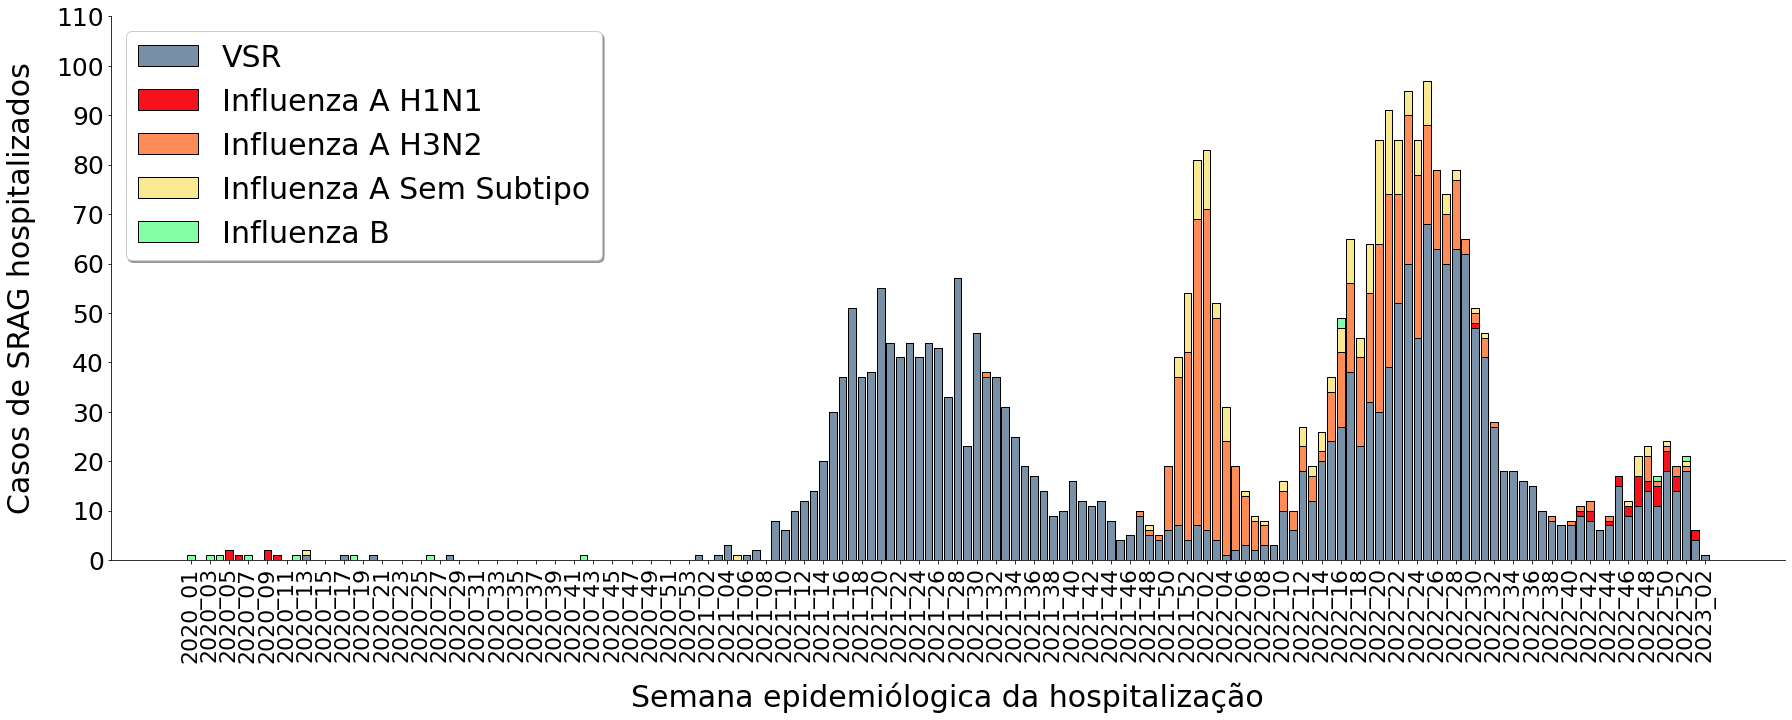

In [316]:
#Plotagem do grafico
plt.figure(figsize=(30,10))
plt.bar(semana_casosHosp_InfluVSR,vsr, color = '#7890a8',edgecolor='#000000')
plt.bar(semana_casosHosp_InfluVSR,influH1, bottom=np.array(vsr),color = '#f7111d',edgecolor='#000000')
plt.bar(semana_casosHosp_InfluVSR,influH3, bottom=np.array(vsr)+np.array(influH1), color = '#ff8c57',edgecolor='#000000')
plt.bar(semana_casosHosp_InfluVSR,influNaoSubtipado, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3), color = '#fae993',edgecolor='#000000')
plt.bar(semana_casosHosp_InfluVSR,influB, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3)+np.array(influNaoSubtipado),color = '#85ffa5',edgecolor='#000000')
sns.despine()
plt.legend(legenda_casosHospitalizados, fontsize=30,shadow=True,loc='upper left')
plt.xticks(eixo_x_casosHosp_InfluVSR,rotation=90,fontsize=22)
plt.yticks(np.arange(0,120,10),fontsize=25)
plt.xlabel('Semana epidemiólogica da hospitalização',labelpad=20,fontsize=30)
plt.ylabel('Casos de SRAG hospitalizados',labelpad=20,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosHosp_InfluVSR.png',dpi=720,bbox_inches='tight')

# Inicio Grafico numeroObitos_InfluVSR

In [512]:
filtro_obitos_influVSR = dados[['Sem Epi Evolucao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_obitos_influVSR = filtro_obitos_influVSR.loc[filtro_obitos_influVSR['Evolucao']=='Óbito']
filtro_obitos_influVSR

,Sem Epi Evolucao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
3,2020_03,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
7,2020_04,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
11,2020_04,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
13,2020_06,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
19,2020_13,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
187533,2022_52,COVID-19,Óbito,Nao,NaN,NaN,NaN
187535,2022_39,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
187536,2022_40,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
187540,2022_51,COVID-19,Óbito,Nao,NaN,NaN,NaN


In [513]:
base = filtro_obitos_influVSR.groupby('Sem Epi Evolucao').count()
base

,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Evolucao,,,,,,
2020_03,5,5,0,0,0,0
2020_04,6,6,0,0,0,0
2020_05,6,6,1,1,0,0
2020_06,4,4,0,0,0,0
2020_07,1,1,0,0,0,0
...,...,...,...,...,...,...
2022_51,89,89,34,3,3,0
2022_52,95,95,29,2,2,0
2023_01,91,91,32,1,1,0


In [1]:
lista = [10,9,8,7,6,5,4,3,2,1]
list(reversed(range(1,10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [514]:
influH1 = filtro_obitos_influVSR.loc[filtro_obitos_influVSR['pcr_fluasu']=='Influenza A(H1N1)pdm09']
influH1 = influH1.groupby('Sem Epi Evolucao').count()
influH1 = influH1.merge(base, how='outer',right_index=True, left_index=True)
influH1 = influH1.fillna(0)
influH1

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_51,3.0,3.0,3.0,3.0,3.0,0.0,89,89,34,3,3,0
2022_52,0.0,0.0,0.0,0.0,0.0,0.0,95,95,29,2,2,0
2023_01,1.0,1.0,1.0,1.0,1.0,0.0,91,91,32,1,1,0


In [515]:
influH1 = influH1['pcr_fluasu_x']

In [516]:
influH3 = filtro_obitos_influVSR.loc[filtro_obitos_influVSR['pcr_fluasu']=='Influenza A(H3N2)']
influH3 = influH3.groupby('Sem Epi Evolucao').count()
influH3 = influH3.merge(base, how='outer',right_index=True, left_index=True)
influH3 = influH3.fillna(0)
influH3

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_51,0.0,0.0,0.0,0.0,0.0,0.0,89,89,34,3,3,0
2022_52,2.0,2.0,2.0,2.0,2.0,0.0,95,95,29,2,2,0
2023_01,0.0,0.0,0.0,0.0,0.0,0.0,91,91,32,1,1,0


In [517]:
influH3 = influH3['pcr_fluasu_x']

In [518]:
influNaoSubtipado = filtro_obitos_influVSR.loc[filtro_obitos_influVSR['pcr_fluasu']=='Influenza nao subtipado']
influNaoSubtipado = influNaoSubtipado.groupby('Sem Epi Evolucao').count()
influNaoSubtipado = influNaoSubtipado.merge(base, how='outer',right_index=True, left_index=True)
influNaoSubtipado = influNaoSubtipado.fillna(0)
influNaoSubtipado

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_51,0.0,0.0,0.0,0.0,0.0,0.0,89,89,34,3,3,0
2022_52,0.0,0.0,0.0,0.0,0.0,0.0,95,95,29,2,2,0
2023_01,0.0,0.0,0.0,0.0,0.0,0.0,91,91,32,1,1,0


In [519]:
influNaoSubtipado = influNaoSubtipado['pcr_fluasu_x']

In [520]:
influB = filtro_obitos_influVSR.loc[filtro_obitos_influVSR['tp_flu_pcr']=='Influenza B'] #pega as linhas onde tem Influenza B
influB = influB.groupby('Sem Epi Evolucao').count() #Agrupa por semana de internação e faz uma contagem
influB = influB.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influB = influB.fillna(0) #Substitui NaN (vazio) por zero
influB

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,1.0,1.0,1.0,1.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_51,0.0,0.0,0.0,0.0,0.0,0.0,89,89,34,3,3,0
2022_52,0.0,0.0,0.0,0.0,0.0,0.0,95,95,29,2,2,0
2023_01,0.0,0.0,0.0,0.0,0.0,0.0,91,91,32,1,1,0


In [521]:
influB = influB['tp_flu_pcr_x'] #Pega os valores da coluna pcr_fluasu_x

In [522]:
vsr = filtro_obitos_influVSR.loc[filtro_obitos_influVSR['pcr_vsr']==1]
vsr = vsr.loc[vsr['Classificacao final']=='SRAG por outro vírus resp']
vsr = vsr.groupby('Sem Epi Evolucao').count()
vsr = vsr.reset_index()
vsr = vsr.merge(base, how='right', on='Sem Epi Evolucao')
vsr = vsr.fillna(0)
vsr

,Sem Epi Evolucao,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
1,2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2,2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
3,2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
4,2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2022_51,0.0,0.0,0.0,0.0,0.0,0.0,89,89,34,3,3,0
154,2022_52,0.0,0.0,0.0,0.0,0.0,0.0,95,95,29,2,2,0
155,2023_01,0.0,0.0,0.0,0.0,0.0,0.0,91,91,32,1,1,0
156,2023_02,0.0,0.0,0.0,0.0,0.0,0.0,54,54,21,0,0,0


In [523]:
vsr = vsr['pcr_vsr_x']
vsr

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
153    0.0
154    0.0
155    0.0
156    0.0
157    0.0
Name: pcr_vsr_x, Length: 158, dtype: float64

In [524]:
semana_numeroObitos_InfluVSR = base.reset_index()
semana_numeroObitos_InfluVSR = semana_numeroObitos_InfluVSR['Sem Epi Evolucao']
semana_numeroObitos_InfluVSR

0      2020_03
1      2020_04
2      2020_05
3      2020_06
4      2020_07
        ...   
153    2022_51
154    2022_52
155    2023_01
156    2023_02
157    2023_03
Name: Sem Epi Evolucao, Length: 158, dtype: object

In [525]:
legenda_obitos_influVSR = pd.DataFrame(columns=['VSR','Influenza A H1N1','Influenza A H3N2','Influenza A Sem Subtipo','Influenza B'])

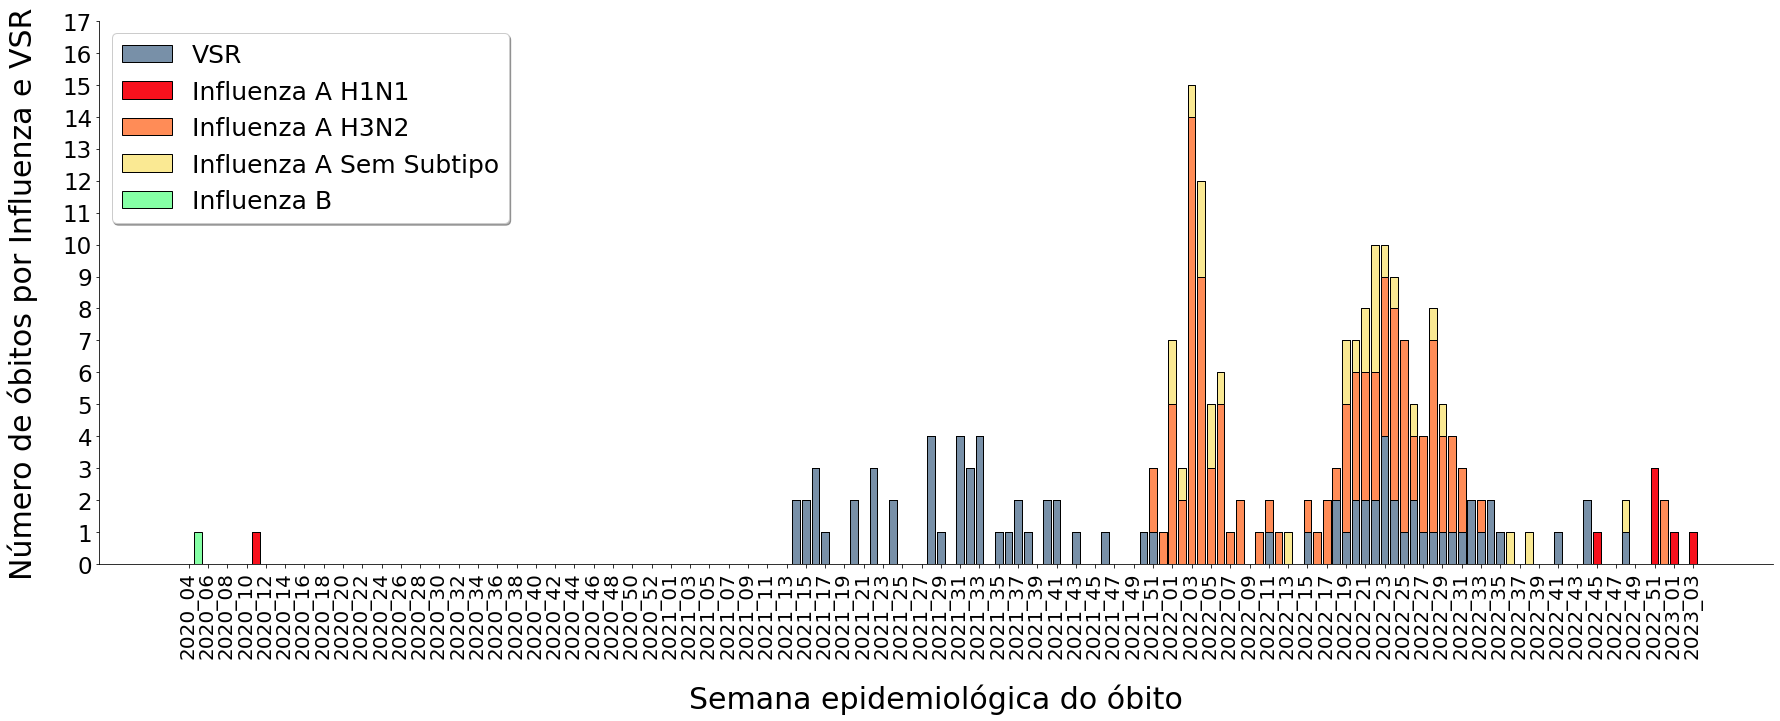

In [529]:
plt.figure(figsize=(30,10))
plt.bar(semana_numeroObitos_InfluVSR,vsr, color = '#7890a8',edgecolor='#000000')
plt.bar(semana_numeroObitos_InfluVSR,influH1, bottom=np.array(vsr),color = '#f7111d',edgecolor='#000000')
plt.bar(semana_numeroObitos_InfluVSR,influH3, bottom=np.array(vsr)+np.array(influH1), color = '#ff8c57',edgecolor='#000000')
plt.bar(semana_numeroObitos_InfluVSR,influNaoSubtipado, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3), color = '#fae993',edgecolor='#000000')
plt.bar(semana_numeroObitos_InfluVSR,influB, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3)+np.array(influNaoSubtipado),color = '#85ffa5',edgecolor='#000000')
sns.despine()
plt.xticks(np.arange(1,np.size(semana_numeroObitos_InfluVSR),2),rotation=90,fontsize=20)
plt.yticks(np.arange(0,18,1),fontsize=23)
plt.xlabel('Semana epidemiológica do óbito',labelpad=25,fontsize=30)
plt.ylabel('Número de óbitos por Influenza e VSR',labelpad=25,fontsize=30)
plt.legend(legenda_obitos_influVSR,fontsize=25,shadow=True,loc='upper left')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/numeroObito_InfluVSR.png',dpi=300,bbox_inches='tight')

# Inicio Grafico Comorbidades

In [321]:
filtro_comorbidades = dados[['Faixa Etaria','Tem Comorbidade','Houve internacao','Classificacao final','Evolucao','pos_pcrflu','pcr_vsr']]
filtro_comorbidades

,Faixa Etaria,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
0,0-9 anos,Não,Sim,SRAG não especificado,Cura,NaN,NaN
1,0-9 anos,Sim,Sim,SRAG não especificado,Cura,NaN,NaN
2,10-19 anos,Sim,Sim,SRAG não especificado,Cura,NaN,NaN
3,60 anos ou mais,Sim,Sim,SRAG não especificado,Óbito,NaN,NaN
4,0-9 anos,Sim,Sim,SRAG não especificado,Cura,NaN,NaN
...,...,...,...,...,...,...,...
187544,60 anos ou mais,Sim,Sim,SRAG não especificado,Segue Internado,NaN,NaN
187545,60 anos ou mais,Sim,Sim,COVID-19,Cura,NaN,NaN
187546,20-59 anos,Não,Sim,COVID-19,Cura,NaN,NaN
187547,60 anos ou mais,Sim,Sim,SRAG não especificado,Cura,NaN,NaN


In [322]:
total_InfluHosp = filtro_comorbidades.loc[filtro_comorbidades['Houve internacao']=='Sim']
total_InfluHosp = total_InfluHosp.loc[total_InfluHosp['pos_pcrflu']=='Sim']
total_InfluHosp = total_InfluHosp.groupby('Faixa Etaria').count()
total_InfluHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,126,126,126,126,126,8
10-19 anos,42,42,42,42,42,1
20-59 anos,242,242,242,242,242,3
60 anos ou mais,492,492,492,492,492,3


In [323]:
comorb_InfluHosp = filtro_comorbidades.loc[filtro_comorbidades['Houve internacao']=='Sim']
comorb_InfluHosp = comorb_InfluHosp.loc[comorb_InfluHosp['pos_pcrflu']=='Sim']
comorb_InfluHosp = comorb_InfluHosp.loc[comorb_InfluHosp['Tem Comorbidade']=='Sim']
comorb_InfluHosp = comorb_InfluHosp.groupby('Faixa Etaria').count()
comorb_InfluHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,49,49,49,49,49,4
10-19 anos,26,26,26,26,26,1
20-59 anos,177,177,177,177,177,3
60 anos ou mais,437,437,437,437,437,2


In [324]:
comorb_InfluHosp['Proporcao'] = (comorb_InfluHosp['pos_pcrflu']/total_InfluHosp['pos_pcrflu'])*100
comorb_InfluHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,49,49,49,49,49,4,38.888889
10-19 anos,26,26,26,26,26,1,61.904762
20-59 anos,177,177,177,177,177,3,73.140496
60 anos ou mais,437,437,437,437,437,2,88.821138


In [325]:
total_VSRHosp = filtro_comorbidades.loc[filtro_comorbidades['pcr_vsr']==1]
total_VSRHosp = total_VSRHosp.loc[total_VSRHosp['Houve internacao']=='Sim']
total_VSRHosp = total_VSRHosp.loc[total_VSRHosp['Classificacao final']=='SRAG por outro vírus resp']
total_VSRHosp = total_VSRHosp.groupby('Faixa Etaria').count()
total_VSRHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,1869,1869,1869,1869,1162,1869
10-19 anos,9,9,9,9,2,9
20-59 anos,104,104,104,104,55,104
60 anos ou mais,225,225,225,225,107,225


In [326]:
comorb_VSRHosp = filtro_comorbidades.loc[filtro_comorbidades['pcr_vsr']==1]
comorb_VSRHosp = comorb_VSRHosp.loc[comorb_VSRHosp['Houve internacao']=='Sim']
comorb_VSRHosp = comorb_VSRHosp.loc[comorb_VSRHosp['Tem Comorbidade']=='Sim']
comorb_VSRHosp = comorb_VSRHosp.loc[comorb_VSRHosp['Classificacao final']=='SRAG por outro vírus resp']
comorb_VSRHosp = comorb_VSRHosp.groupby('Faixa Etaria').count()
comorb_VSRHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,349,349,349,349,218,349
10-19 anos,8,8,8,8,1,8
20-59 anos,86,86,86,86,44,86
60 anos ou mais,210,210,210,210,101,210


In [327]:
comorb_VSRHosp['Proporcao'] = (comorb_VSRHosp['pcr_vsr']/total_VSRHosp['pcr_vsr'])*100
comorb_VSRHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,349,349,349,349,218,349,18.673087
10-19 anos,8,8,8,8,1,8,88.888889
20-59 anos,86,86,86,86,44,86,82.692308
60 anos ou mais,210,210,210,210,101,210,93.333333


In [328]:
total_CovidHosp = filtro_comorbidades.loc[filtro_comorbidades['Classificacao final']=='COVID-19']
total_CovidHosp = total_CovidHosp.loc[total_CovidHosp['Houve internacao']=='Sim']
total_CovidHosp = total_CovidHosp.groupby('Faixa Etaria').count()
total_CovidHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,1574,1574,1574,1574,616,91
10-19 anos,780,780,780,780,215,3
20-59 anos,59991,59991,59991,59991,16989,16
60 anos ou mais,68226,68226,68226,68226,21602,39


In [329]:
comorb_CovidHosp = filtro_comorbidades.loc[filtro_comorbidades['Classificacao final']=='COVID-19']
comorb_CovidHosp = comorb_CovidHosp.loc[comorb_CovidHosp['Houve internacao']=='Sim']
comorb_CovidHosp = comorb_CovidHosp.loc[comorb_CovidHosp['Tem Comorbidade']=='Sim']
comorb_CovidHosp = comorb_CovidHosp.groupby('Faixa Etaria').count()
comorb_CovidHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,559,559,559,559,247,16
10-19 anos,410,410,410,410,122,2
20-59 anos,34223,34223,34223,34223,10249,12
60 anos ou mais,57573,57573,57573,57573,18745,37


In [330]:
comorb_CovidHosp['Proporcao'] = (comorb_CovidHosp['Classificacao final']/total_CovidHosp['Classificacao final'])*100
comorb_CovidHosp

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,559,559,559,559,247,16,35.514612
10-19 anos,410,410,410,410,122,2,52.564103
20-59 anos,34223,34223,34223,34223,10249,12,57.046890
60 anos ou mais,57573,57573,57573,57573,18745,37,84.385718


In [331]:
faixaEtaria_comorbidades = comorb_VSRHosp.reset_index()
faixaEtaria_comorbidades = faixaEtaria_comorbidades['Faixa Etaria']
legenda_comorbidades = ['Influenza','VSR','COVID-19']

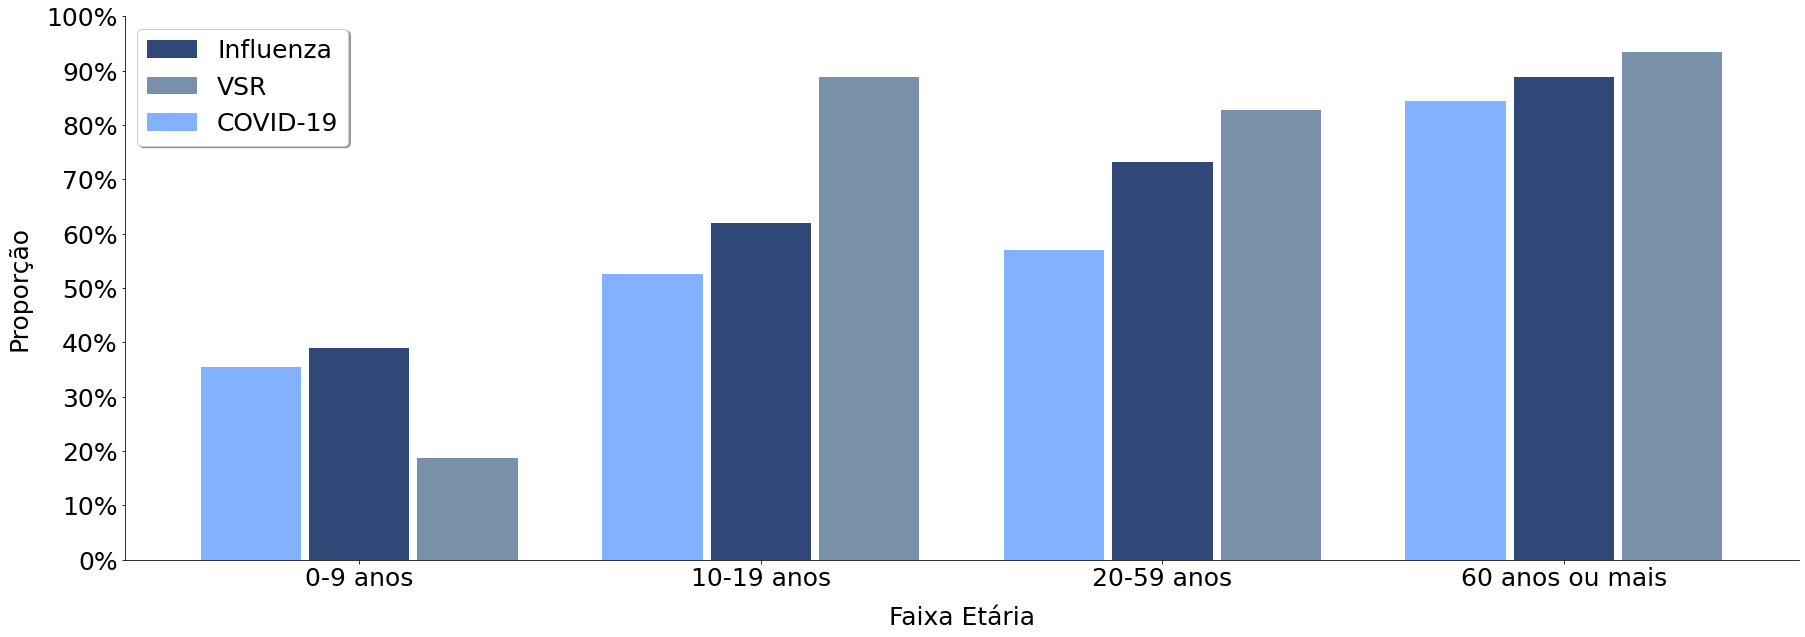

In [332]:
plt.figure(figsize=(30,10))
width = 0.25
plt.bar(faixaEtaria_comorbidades,comorb_InfluHosp['Proporcao'],width,color='#304878')
plt.bar(np.arange(0,4,1)+0.270,comorb_VSRHosp['Proporcao'],width,color='#7890a8')
plt.bar(np.arange(0,4,1)-0.270,comorb_CovidHosp['Proporcao'],width,color='#82b2ff')
plt.xlabel('Faixa Etária',fontsize=25,labelpad=15)
plt.ylabel('Proporção',fontsize=25,labelpad=15)
plt.xticks(np.arange(0,4,1),['0-9 anos','10-19 anos','20-59 anos','60 anos ou mais'],fontsize=25)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.legend(legenda_comorbidades,fontsize=25,shadow=True)
sns.despine()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Comorbidade_Influ_VSR_Hosp.png',dpi=720,bbox_inches='tight')

In [337]:
total_InfluObito = filtro_comorbidades.loc[filtro_comorbidades['pos_pcrflu']=='Sim']
total_InfluObito = total_InfluObito.loc[total_InfluObito['Evolucao']=='Óbito']
total_InfluObito = total_InfluObito.groupby('Faixa Etaria').count()
total_InfluObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,4,4,4,4,4,0
10-19 anos,1,1,1,1,1,0
20-59 anos,27,27,27,27,27,0
60 anos ou mais,112,112,112,112,112,1


In [338]:
comorb_InfluObito = filtro_comorbidades.loc[filtro_comorbidades['pos_pcrflu']=='Sim']
comorb_InfluObito = comorb_InfluObito.loc[comorb_InfluObito['Evolucao']=='Óbito']
comorb_InfluObito = comorb_InfluObito.loc[comorb_InfluObito['Tem Comorbidade']=='Sim']
comorb_InfluObito = comorb_InfluObito.groupby('Faixa Etaria').count()
comorb_InfluObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,2,2,2,2,2,0
10-19 anos,1,1,1,1,1,0
20-59 anos,21,21,21,21,21,0
60 anos ou mais,99,99,99,99,99,1


In [339]:
comorb_InfluObito['Proporcao'] = (comorb_InfluObito['pos_pcrflu']/total_InfluObito['pos_pcrflu'])*100
comorb_InfluObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,2,2,2,2,2,0,50.000000
10-19 anos,1,1,1,1,1,0,100.000000
20-59 anos,21,21,21,21,21,0,77.777778
60 anos ou mais,99,99,99,99,99,1,88.392857


In [340]:
total_VSRObito = filtro_comorbidades.loc[filtro_comorbidades['pcr_vsr']==1]
total_VSRObito = total_VSRObito.loc[total_VSRObito['Evolucao']=='Óbito']
total_VSRObito = total_VSRObito.loc[total_VSRObito['Classificacao final']=='SRAG por outro vírus resp']
total_VSRObito = total_VSRObito.groupby('Faixa Etaria').count()
total_VSRObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,13,13,13,13,10,13
10-19 anos,1,1,1,1,0,1
20-59 anos,14,14,14,14,9,14
60 anos ou mais,51,51,51,51,24,51


In [341]:
comorb_VSRObito = filtro_comorbidades.loc[filtro_comorbidades['pcr_vsr']==1]
comorb_VSRObito = comorb_VSRObito.loc[comorb_VSRObito['Evolucao']=='Óbito']
comorb_VSRObito = comorb_VSRObito.loc[comorb_VSRObito['Tem Comorbidade']=='Sim']
comorb_VSRObito = comorb_VSRObito.loc[comorb_VSRObito['Classificacao final']=='SRAG por outro vírus resp']
comorb_VSRObito = comorb_VSRObito.groupby('Faixa Etaria').count()
comorb_VSRObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,2,2,2,2,1,2
10-19 anos,1,1,1,1,0,1
20-59 anos,13,13,13,13,9,13
60 anos ou mais,47,47,47,47,22,47


In [342]:
comorb_VSRObito['Proporcao'] = (comorb_VSRObito['pcr_vsr']/total_VSRObito['pcr_vsr'])*100
comorb_VSRObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,2,2,2,2,1,2,15.384615
10-19 anos,1,1,1,1,0,1,100.000000
20-59 anos,13,13,13,13,9,13,92.857143
60 anos ou mais,47,47,47,47,22,47,92.156863


In [343]:
total_CovidObito = filtro_comorbidades.loc[filtro_comorbidades['Classificacao final']=='COVID-19']
total_CovidObito = total_CovidObito.loc[total_CovidObito['Evolucao']=='Óbito']
total_CovidObito = total_CovidObito.groupby('Faixa Etaria').count()
total_CovidObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,47,47,47,47,16,1
10-19 anos,70,70,70,70,22,0
20-59 anos,11115,11115,11115,11115,3615,4
60 anos ou mais,30484,30484,30484,30484,10089,16


In [344]:
comorb_CovidObito = filtro_comorbidades.loc[filtro_comorbidades['Classificacao final']=='COVID-19']
comorb_CovidObito = comorb_CovidObito.loc[comorb_CovidObito['Evolucao']=='Óbito']
comorb_CovidObito = comorb_CovidObito.loc[comorb_CovidObito['Tem Comorbidade']=='Sim']
comorb_CovidObito = comorb_CovidObito.groupby('Faixa Etaria').count()
comorb_CovidObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr
Faixa Etaria,,,,,,
0-9 anos,38,38,38,38,14,1
10-19 anos,64,64,64,64,21,0
20-59 anos,8876,8876,8876,8876,2921,4
60 anos ou mais,27600,27600,27600,27600,9249,16


In [345]:
comorb_CovidObito['Proporcao'] = (comorb_CovidObito['Classificacao final']/total_CovidObito['Classificacao final'])*100
comorb_CovidObito

,Tem Comorbidade,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,pcr_vsr,Proporcao
Faixa Etaria,,,,,,,
0-9 anos,38,38,38,38,14,1,80.851064
10-19 anos,64,64,64,64,21,0,91.428571
20-59 anos,8876,8876,8876,8876,2921,4,79.856050
60 anos ou mais,27600,27600,27600,27600,9249,16,90.539299


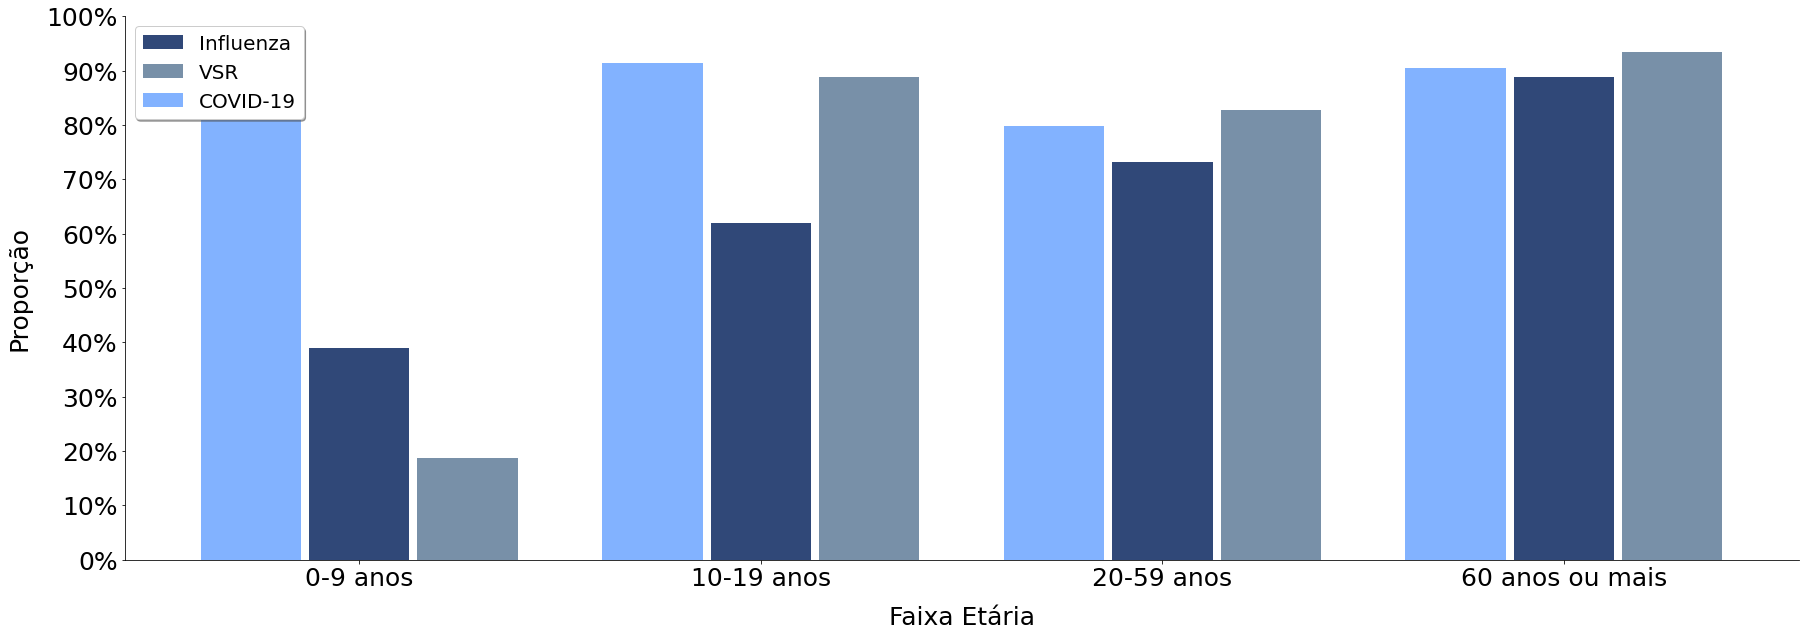

In [346]:
plt.figure(figsize=(30,10))
width = 0.25
plt.bar(faixaEtaria_comorbidades,comorb_InfluHosp['Proporcao'],width,color='#304878')
plt.bar(np.arange(0,4,1)+0.270,comorb_VSRHosp['Proporcao'],width,color='#7890a8')
plt.bar(np.arange(0,4,1)-0.270,comorb_CovidObito['Proporcao'],width,color='#82b2ff')
plt.xlabel('Faixa Etária',fontsize=25,labelpad=15)
plt.ylabel('Proporção',fontsize=25,labelpad=15)
plt.xticks(np.arange(0,4,1),['0-9 anos','10-19 anos','20-59 anos','60 anos ou mais'],fontsize=25)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.legend(legenda_comorbidades,fontsize=20,shadow=True)
sns.despine()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Comorbidade_Influ_VSR_Obito.png',dpi=720,bbox_inches='tight')

# Inicio Graficos obitosConfirmados_Covid

In [64]:
filtrado_obitosCovid = dados[['Competencia Evolucao','Classificacao final','Evolucao','Idade']]
filtrado_obitosCovid

,Competencia Evolucao,Classificacao final,Evolucao,Idade
0,2020_01,SRAG não especificado,Cura,0.0
1,2020_01,SRAG não especificado,Cura,0.0
2,2020_01,SRAG não especificado,Cura,11.0
3,2020_01,SRAG não especificado,Óbito,75.0
4,2020_01,SRAG não especificado,Cura,4.0
...,...,...,...,...
187544,NaN,SRAG não especificado,Segue Internado,68.0
187545,2022_12,COVID-19,Cura,71.0
187546,2022_12,COVID-19,Cura,42.0
187547,2020_07,SRAG não especificado,Cura,85.0


In [65]:
for index, idade in filtrado_obitosCovid.iterrows():
    if idade['Idade'] < 12:
        filtrado_obitosCovid.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado_obitosCovid.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado_obitosCovid.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado_obitosCovid.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado_obitosCovid.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado_obitosCovid.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\1026600822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado_obitosCovid.loc[index,'Idade'] = '0-11 anos'


In [66]:
filtrado_obitosCovid = filtrado_obitosCovid.loc[filtrado_obitosCovid['Classificacao final']=='COVID-19']
filtrado_obitosCovid = filtrado_obitosCovid.loc[filtrado_obitosCovid['Evolucao']=='Óbito']
filtrado_obitosCovid

,Competencia Evolucao,Classificacao final,Evolucao,Idade
130,2020_03,COVID-19,Óbito,80 e mais
131,2020_04,COVID-19,Óbito,40-59 anos
177,2020_04,COVID-19,Óbito,80 e mais
181,2020_04,COVID-19,Óbito,80 e mais
217,2020_03,COVID-19,Óbito,80 e mais
...,...,...,...,...
187526,2022_10,COVID-19,Óbito,60-79 anos
187530,2022_12,COVID-19,Óbito,80 e mais
187533,2022_12,COVID-19,Óbito,80 e mais
187540,2022_12,COVID-19,Óbito,40-59 anos


In [67]:
total_obitos = filtrado_obitosCovid.groupby('Competencia Evolucao').count()
total_obitos = total_obitos.drop('2020_03')
total_obitos.head()

,Classificacao final,Evolucao,Idade
Competencia Evolucao,,,
2020_04,60,60,60
2020_05,182,182,182
2020_06,440,440,440
2020_07,1391,1391,1391
2020_08,1606,1606,1606


In [68]:
separaIdade = filtrado_obitosCovid.groupby(['Idade','Competencia Evolucao']).count()
separaIdade.head()

Classificacao final  Evolucao
Idade     Competencia Evolucao                               
0-11 anos 2020_05                                 1         1
          2020_07                                 1         1
          2020_08                                 2         2
          2020_09                                 1         1
          2020_10                                 3         3

In [69]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Evolucao
2022_06    0.623701
2022_07    0.941176
2022_08    0.280899
2022_09    0.558659
2022_10    0.000000
2022_11    0.000000
2022_12    0.714286
2023_01    0.000000
Name: Proporcao, dtype: float64

In [70]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Evolucao
2022_06    0.207900
2022_07    0.000000
2022_08    0.000000
2022_09    0.000000
2022_10    0.000000
2022_11    0.000000
2022_12    0.357143
2023_01    0.704225
Name: Proporcao, dtype: float64

In [71]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Evolucao
2022_06    2.910603
2022_07    2.588235
2022_08    1.404494
2022_09    2.234637
2022_10    1.724138
2022_11    1.408451
2022_12    2.500000
2023_01    1.408451
Name: Proporcao, dtype: float64

In [72]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Evolucao
2022_06    10.810811
2022_07     8.470588
2022_08     9.550562
2022_09    11.731844
2022_10    15.517241
2022_11    11.267606
2022_12    11.428571
2023_01     7.042254
Name: Proporcao, dtype: float64

In [73]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79.drop(['2020_03'])
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Evolucao
2022_06    41.787942
2022_07    44.000000
2022_08    49.438202
2022_09    43.016760
2022_10    48.275862
2022_11    47.887324
2022_12    40.000000
2023_01    42.253521
Name: Proporcao, dtype: float64

In [74]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80.drop(['2020_03'])
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Evolucao
2022_06    43.659044
2022_07    44.000000
2022_08    39.325843
2022_09    42.458101
2022_10    34.482759
2022_11    39.436620
2022_12    45.000000
2023_01    48.591549
Name: Proporcao, dtype: float64

In [75]:
eixo_x_obitosConfirmados_Covid = idade80.to_frame()
eixo_x_obitosConfirmados_Covid = eixo_x_obitosConfirmados_Covid.reset_index()
eixo_x_obitosConfirmados_Covid = eixo_x_obitosConfirmados_Covid['Competencia Evolucao']
eixo_x_obitosConfirmados_Covid

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
23    2022_03
24    2022_04
25    2022_05
26    2022_06
27    2022_07
28    2022_08
29    2022_09
30    2022_10
31    2022_11
32    2022_12
33    2023_01
Name: Competencia Evolucao, dtype: object

In [76]:
legenda_obitosCovid = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

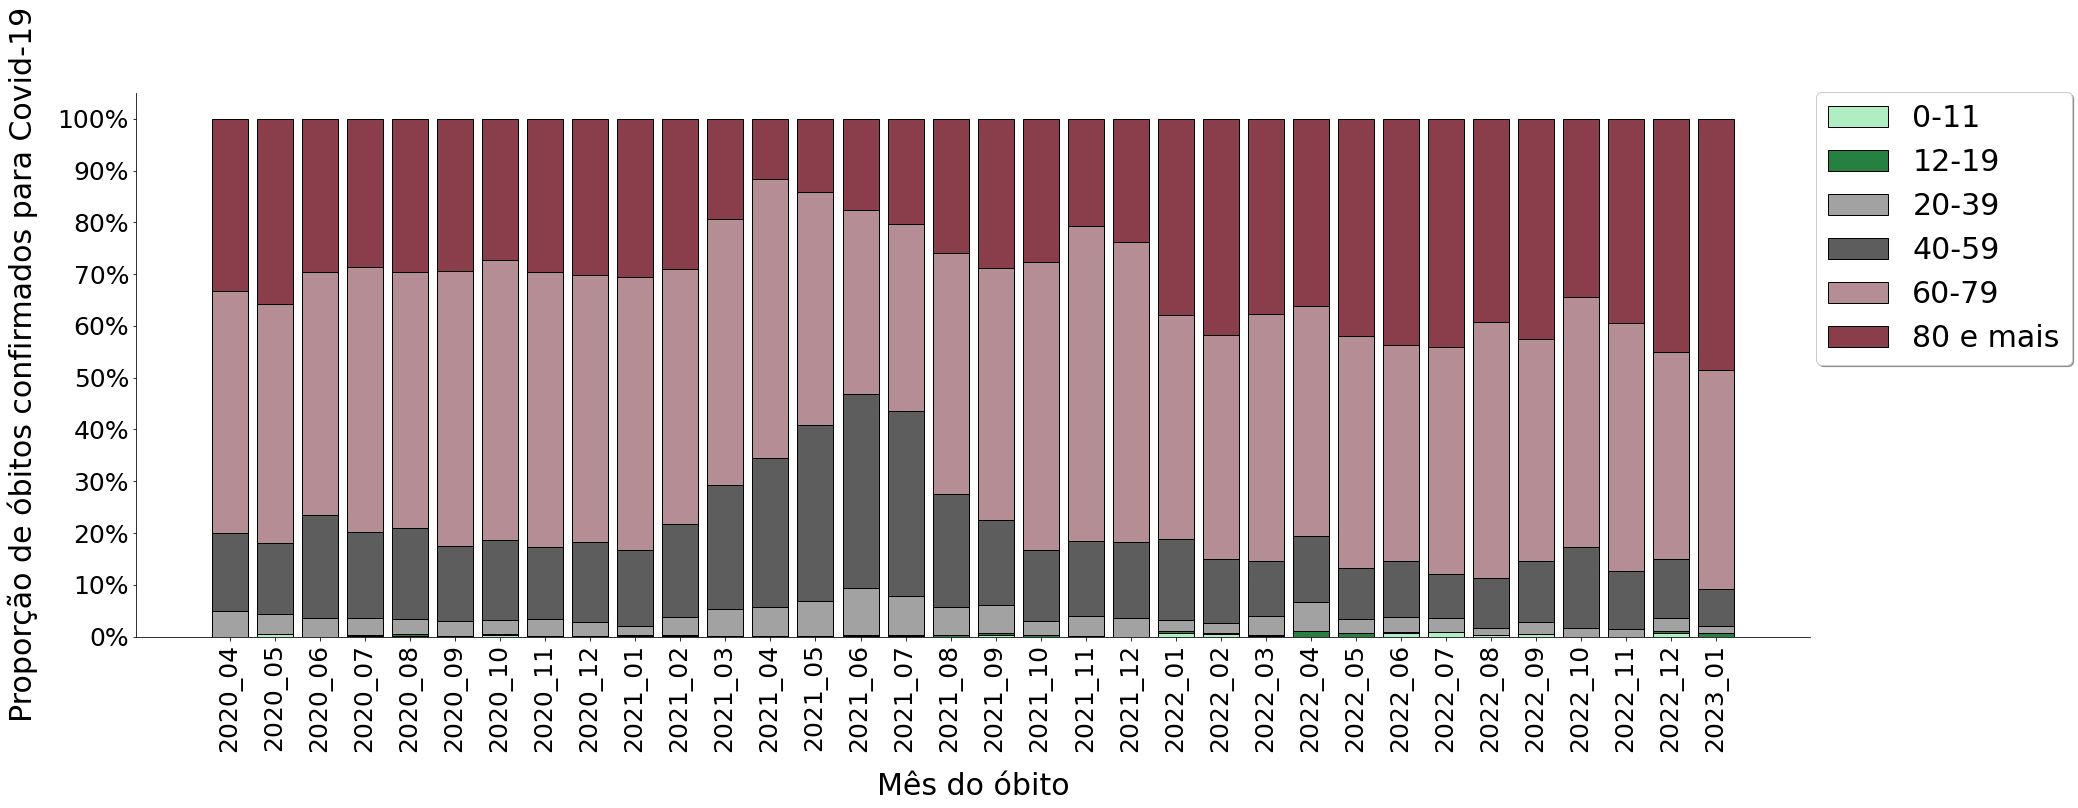

In [77]:
plt.figure(figsize=(30,10))
plt.bar(eixo_x_obitosConfirmados_Covid,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(eixo_x_obitosConfirmados_Covid,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(eixo_x_obitosConfirmados_Covid,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(eixo_x_obitosConfirmados_Covid,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(eixo_x_obitosConfirmados_Covid,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(eixo_x_obitosConfirmados_Covid,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_obitosCovid,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/obitosConfirmados-Covid.png',dpi=720,bbox_inches='tight')

# Inicio Grafico SRAG Confirmado Covid

In [78]:
filtrado_confirmadoCovid = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade']]
filtrado_confirmadoCovid = filtrado_confirmadoCovid.dropna()
filtrado_confirmadoCovid.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,0-9 anos,0.0
1,2020_01,Sim,SRAG não especificado,0-9 anos,0.0
2,2020_01,Sim,SRAG não especificado,10-19 anos,11.0
3,2020_01,Sim,SRAG não especificado,60 anos ou mais,75.0
4,2020_01,Sim,SRAG não especificado,0-9 anos,4.0


In [79]:
filtrado_confirmadoCovid['Idade'] = filtrado_confirmadoCovid['Idade'].astype(int)
filtrado_confirmadoCovid.head(20)

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,0-9 anos,0
1,2020_01,Sim,SRAG não especificado,0-9 anos,0
2,2020_01,Sim,SRAG não especificado,10-19 anos,11
3,2020_01,Sim,SRAG não especificado,60 anos ou mais,75
4,2020_01,Sim,SRAG não especificado,0-9 anos,4
5,2020_01,Sim,SRAG não especificado,60 anos ou mais,61
6,2020_01,Sim,SRAG não especificado,20-59 anos,48
7,2020_01,Sim,SRAG não especificado,20-59 anos,42
8,2020_01,Sim,SRAG não especificado,20-59 anos,31
9,2020_01,Sim,SRAG não especificado,10-19 anos,19


In [80]:
for index, idade in filtrado_confirmadoCovid.iterrows():
    if idade['Idade'] < 12:
        filtrado_confirmadoCovid.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado_confirmadoCovid.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado_confirmadoCovid.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado_confirmadoCovid.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado_confirmadoCovid.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado_confirmadoCovid.loc[index,'Idade'] = '80 e mais'

In [81]:
filtrado_confirmadoCovid = filtrado_confirmadoCovid.loc[filtrado_confirmadoCovid['Houve internacao']=='Sim']
filtrado_confirmadoCovid = filtrado_confirmadoCovid.loc[filtrado_confirmadoCovid['Classificacao final']=='COVID-19']
filtrado_confirmadoCovid.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
130,2020_03,Sim,COVID-19,60 anos ou mais,80 e mais
131,2020_03,Sim,COVID-19,20-59 anos,40-59 anos
149,2020_03,Sim,COVID-19,20-59 anos,20-39 anos
158,2020_03,Sim,COVID-19,20-59 anos,20-39 anos
177,2020_03,Sim,COVID-19,60 anos ou mais,80 e mais


In [82]:
totalHospitalizacoes = filtrado_confirmadoCovid.groupby('Competencia Internacao').count()
totalHospitalizacoes = totalHospitalizacoes.drop('2020_03')
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade
Competencia Internacao,,,,
2020_04,595,595,595,595
2020_05,1103,1103,1103,1103
2020_06,2440,2440,2440,2440
2020_07,4890,4890,4890,4890
2020_08,5227,5227,5227,5227


In [83]:
separaIdade = filtrado_confirmadoCovid.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head(20)

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_03                                4                    4   
          2020_04                                7                    7   
          2020_05                                7                    7   
          2020_06                               19                   19   
          2020_07                               42                   42   
          2020_08                               63                   63   
          2020_09                               20                   20   
          2020_10                               26                   26   
          2020_11                               37                   37   
          2020_12                               43                   43   
          2021_01                               33                   33   
          2021_02                               44                   44   
          2021_03                               79                   79   
          2021_04                               52                   52   
          2021_05                               52                   52   
          2021_06                               55                   55   
          2021_07                               50                   50   
          2021_08                               23                   23   
          2021_09                               19                   19   
          2021_10                               35                   35   

                                  Faixa Etaria  
Idade     Competencia Internacao                
0-11 anos 2020_03                            4  
          2020_04                            7  
          2020_05                            7  
          2020_06                           19  
          2020_07                           42  
          2020_08                           63  
          2020_09                           20  
          2020_10                           26  
          2020_11                           37  
          2020_12                           43  
          2021_01                           33  
          2021_02                           44  
          2021_03                           79  
          2021_04                           52  
          2021_05                           52  
          2021_06                           55  
          2021_07                           50  
          2021_08                           23  
          2021_09                           19  
          2021_10                           35

In [84]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.drop(['2020_03'])
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Internacao
2022_06     6.579849
2022_07     7.572541
2022_08     6.027987
2022_09     9.118541
2022_10    13.207547
2022_11     6.373626
2022_12     5.704225
2023_01     1.785714
Name: Proporcao, dtype: float64

In [85]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Internacao
2022_06    0.685401
2022_07    1.344657
2022_08    1.722282
2022_09    0.607903
2022_10    0.000000
2022_11    1.098901
2022_12    1.197183
2023_01    0.892857
Name: Proporcao, dtype: float64

In [86]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop(['2020_03'])
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Internacao
2022_06    5.140507
2022_07    6.864827
2022_08    5.597417
2022_09    3.647416
2022_10    8.176101
2022_11    6.373626
2022_12    7.112676
2023_01    4.464286
Name: Proporcao, dtype: float64

In [87]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.drop(['2020_03'])
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Internacao
2022_06    12.954078
2022_07    13.163482
2022_08    12.271259
2022_09    13.069909
2022_10    16.352201
2022_11    12.527473
2022_12    12.253521
2023_01    10.714286
Name: Proporcao, dtype: float64

In [88]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.drop(['2020_03'])
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Internacao
2022_06    40.986977
2022_07    39.773531
2022_08    41.872982
2022_09    39.209726
2022_10    35.849057
2022_11    44.615385
2022_12    41.901408
2023_01    47.321429
Name: Proporcao, dtype: float64

In [89]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.drop(['2020_03'])
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Internacao
2022_06    33.653187
2022_07    31.280962
2022_08    32.508073
2022_09    34.346505
2022_10    26.415094
2022_11    29.010989
2022_12    31.830986
2023_01    34.821429
Name: Proporcao, dtype: float64

In [90]:
competencia_SRAGConfirmado_Covid = idade80.to_frame()
competencia_SRAGConfirmado_Covid = competencia_SRAGConfirmado_Covid.reset_index()
competencia_SRAGConfirmado_Covid = competencia_SRAGConfirmado_Covid['Competencia Internacao']
competencia_SRAGConfirmado_Covid.tail()

29    2022_09
30    2022_10
31    2022_11
32    2022_12
33    2023_01
Name: Competencia Internacao, dtype: object

In [91]:
legenda_confirmadoCovid = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

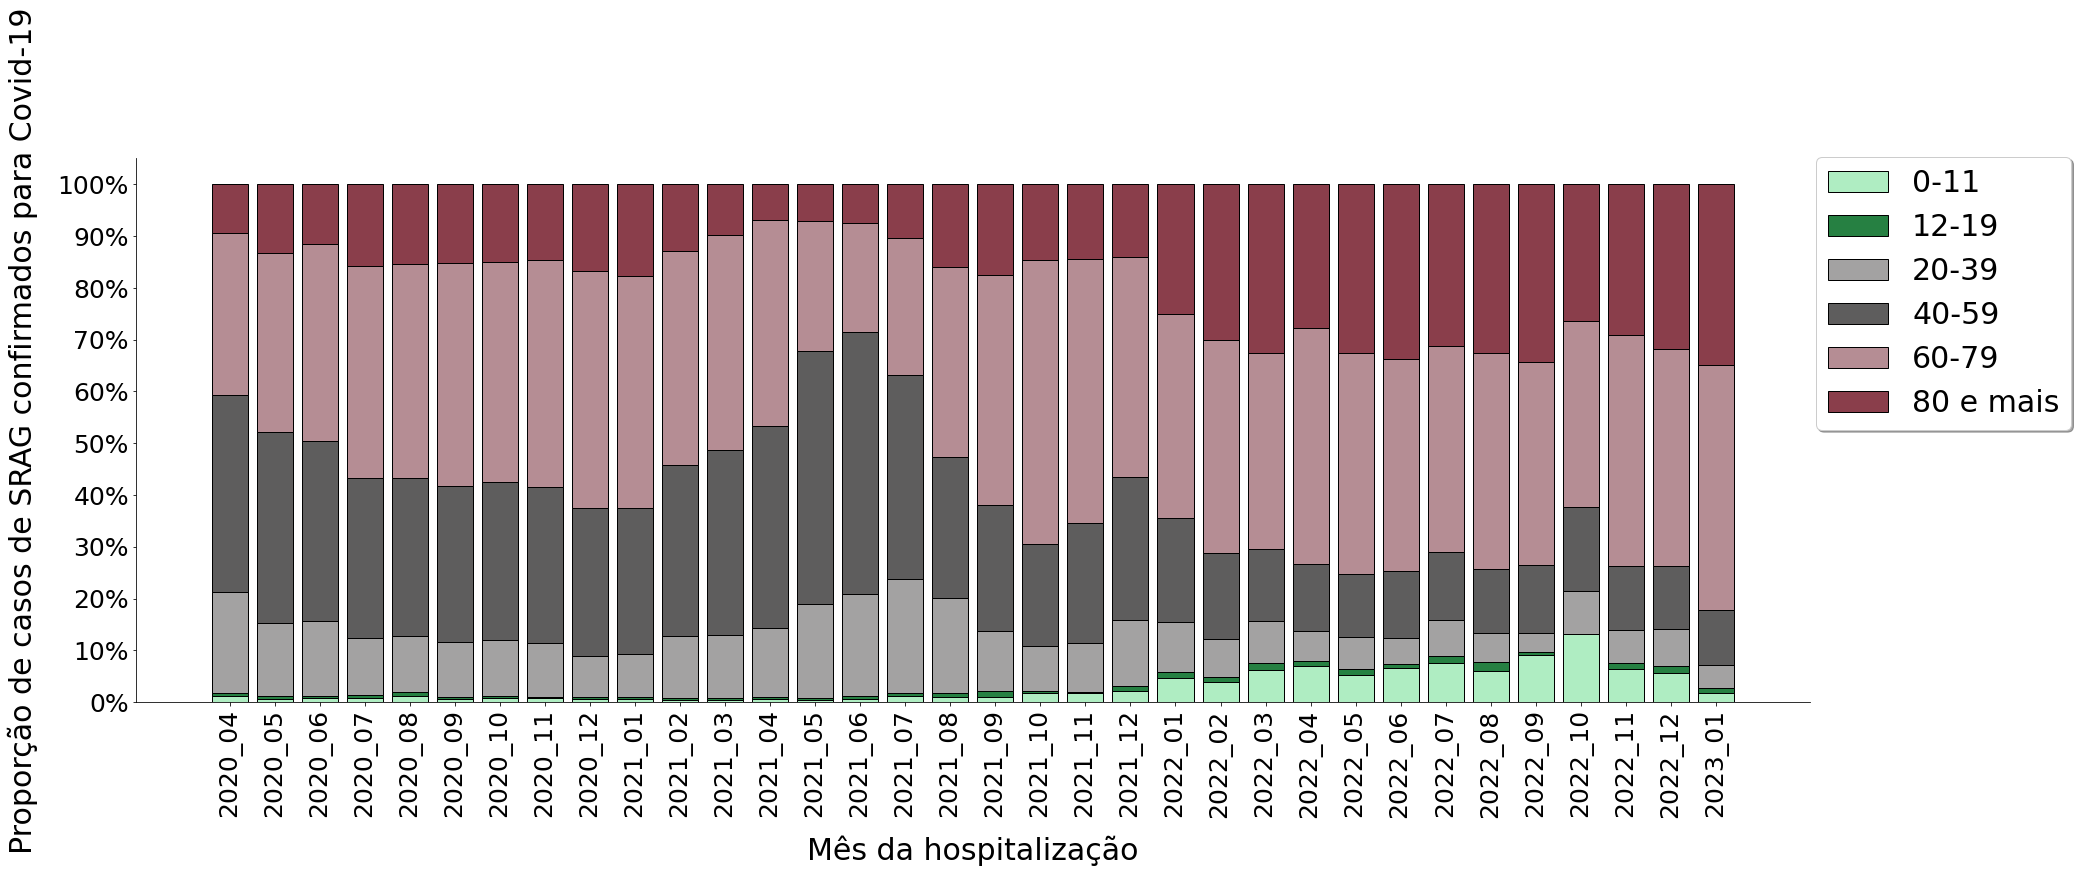

In [92]:
plt.figure(figsize=(30,10))
plt.bar(competencia_SRAGConfirmado_Covid,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(competencia_SRAGConfirmado_Covid,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(competencia_SRAGConfirmado_Covid,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(competencia_SRAGConfirmado_Covid,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(competencia_SRAGConfirmado_Covid,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(competencia_SRAGConfirmado_Covid,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_confirmadoCovid,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/SRAGConfirmado_Covid.jpeg',dpi=720,bbox_inches='tight')

# Inicio Grafico hospUTISuport_Covid

In [93]:
filtrado_hospUTISuport_Covid = dados[['Sem Epi Internacao','Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao']]
filtrado_hospUTISuport_Covid = filtrado_hospUTISuport_Covid.loc[filtrado_hospUTISuport_Covid['Classificacao final']=='COVID-19']
filtrado_hospUTISuport_Covid

,Sem Epi Internacao,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
130,2020_12,COVID-19,Sim,"Sim, invasivo",Sim
131,2020_12,COVID-19,Sim,"Sim, invasivo",Sim
149,2020_12,COVID-19,Sim,Não,Sim
158,2020_13,COVID-19,Sim,"Sim, invasivo",Sim
177,2020_12,COVID-19,Sim,"Sim, invasivo",Sim
...,...,...,...,...,...
187541,2022_50,COVID-19,Não,"Sim, não invasivo",Sim
187542,2022_50,COVID-19,Sim,"Sim, invasivo",Sim
187543,2022_52,COVID-19,Sim,"Sim, invasivo",Sim
187545,2022_48,COVID-19,Não,"Sim, não invasivo",Sim


In [94]:
internado = filtrado_hospUTISuport_Covid.loc[filtrado_hospUTISuport_Covid['Internado UTI']=='Sim']
internado = internado.groupby('Sem Epi Internacao').count()
internado

,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
Sem Epi Internacao,,,,
2020_11,1,1,1,1
2020_12,10,10,10,10
2020_13,33,33,33,33
2020_14,39,39,39,39
2020_15,26,26,26,26
...,...,...,...,...
2022_50,70,70,70,70
2022_51,72,72,72,72
2022_52,81,81,81,81


In [95]:
internado = internado['Classificacao final']
internado.tail(21)

Sem Epi Internacao
2022_34    48
2022_35    34
2022_36    32
2022_37    27
2022_38    24
2022_39    10
2022_40    12
2022_41    11
2022_42     8
2022_43     8
2022_44    12
2022_45    16
2022_46    26
2022_47    39
2022_48    49
2022_49    46
2022_50    70
2022_51    72
2022_52    81
2023_01    25
2023_02     3
Name: Classificacao final, dtype: int64

In [96]:
suporteVent = filtrado_hospUTISuport_Covid.loc[filtrado_hospUTISuport_Covid['Suporte ventilatorio']=='Sim, invasivo']
suporteVent = suporteVent.groupby('Sem Epi Internacao').count()
suporteVent

,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
Sem Epi Internacao,,,,
2020_11,1,1,1,1
2020_12,8,8,8,8
2020_13,26,26,26,26
2020_14,26,26,26,26
2020_15,12,12,12,12
...,...,...,...,...
2022_50,38,38,38,38
2022_51,36,36,36,36
2022_52,45,45,45,45


In [97]:
suporteVent = suporteVent['Classificacao final']
suporteVent.tail(21)

Sem Epi Internacao
2022_34    26
2022_35    23
2022_36    20
2022_37    14
2022_38    12
2022_39     3
2022_40     9
2022_41     7
2022_42     6
2022_43     3
2022_44     5
2022_45     8
2022_46    14
2022_47    22
2022_48    33
2022_49    27
2022_50    38
2022_51    36
2022_52    45
2023_01    11
2023_02     1
Name: Classificacao final, dtype: int64

In [98]:
houveIntern = filtrado_hospUTISuport_Covid.loc[filtrado_hospUTISuport_Covid['Houve internacao']=='Sim']
houveIntern = houveIntern.groupby('Sem Epi Internacao').count()
houveIntern

,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
Sem Epi Internacao,,,,
2020_11,1,1,1,1
2020_12,19,19,19,19
2020_13,101,101,101,101
2020_14,111,111,111,111
2020_15,66,66,66,66
...,...,...,...,...
2022_50,312,312,312,312
2022_51,338,338,338,338
2022_52,367,367,367,367


In [99]:
houveIntern = houveIntern['Classificacao final']
houveIntern

Sem Epi Internacao
2020_11      1
2020_12     19
2020_13    101
2020_14    111
2020_15     66
          ... 
2022_50    312
2022_51    338
2022_52    367
2023_01    103
2023_02      9
Name: Classificacao final, Length: 149, dtype: int64

In [100]:
semana_hospUTISuport_Covid = internado.reset_index()
semana_hospUTISuport_Covid = semana_hospUTISuport_Covid['Sem Epi Internacao']
semana_hospUTISuport_Covid

0      2020_11
1      2020_12
2      2020_13
3      2020_14
4      2020_15
        ...   
144    2022_50
145    2022_51
146    2022_52
147    2023_01
148    2023_02
Name: Sem Epi Internacao, Length: 149, dtype: object

In [101]:
legenda_hospUTISuport_Covid = ['Hospitalizados','UTI','Suporte Ventilatório Invasivo']

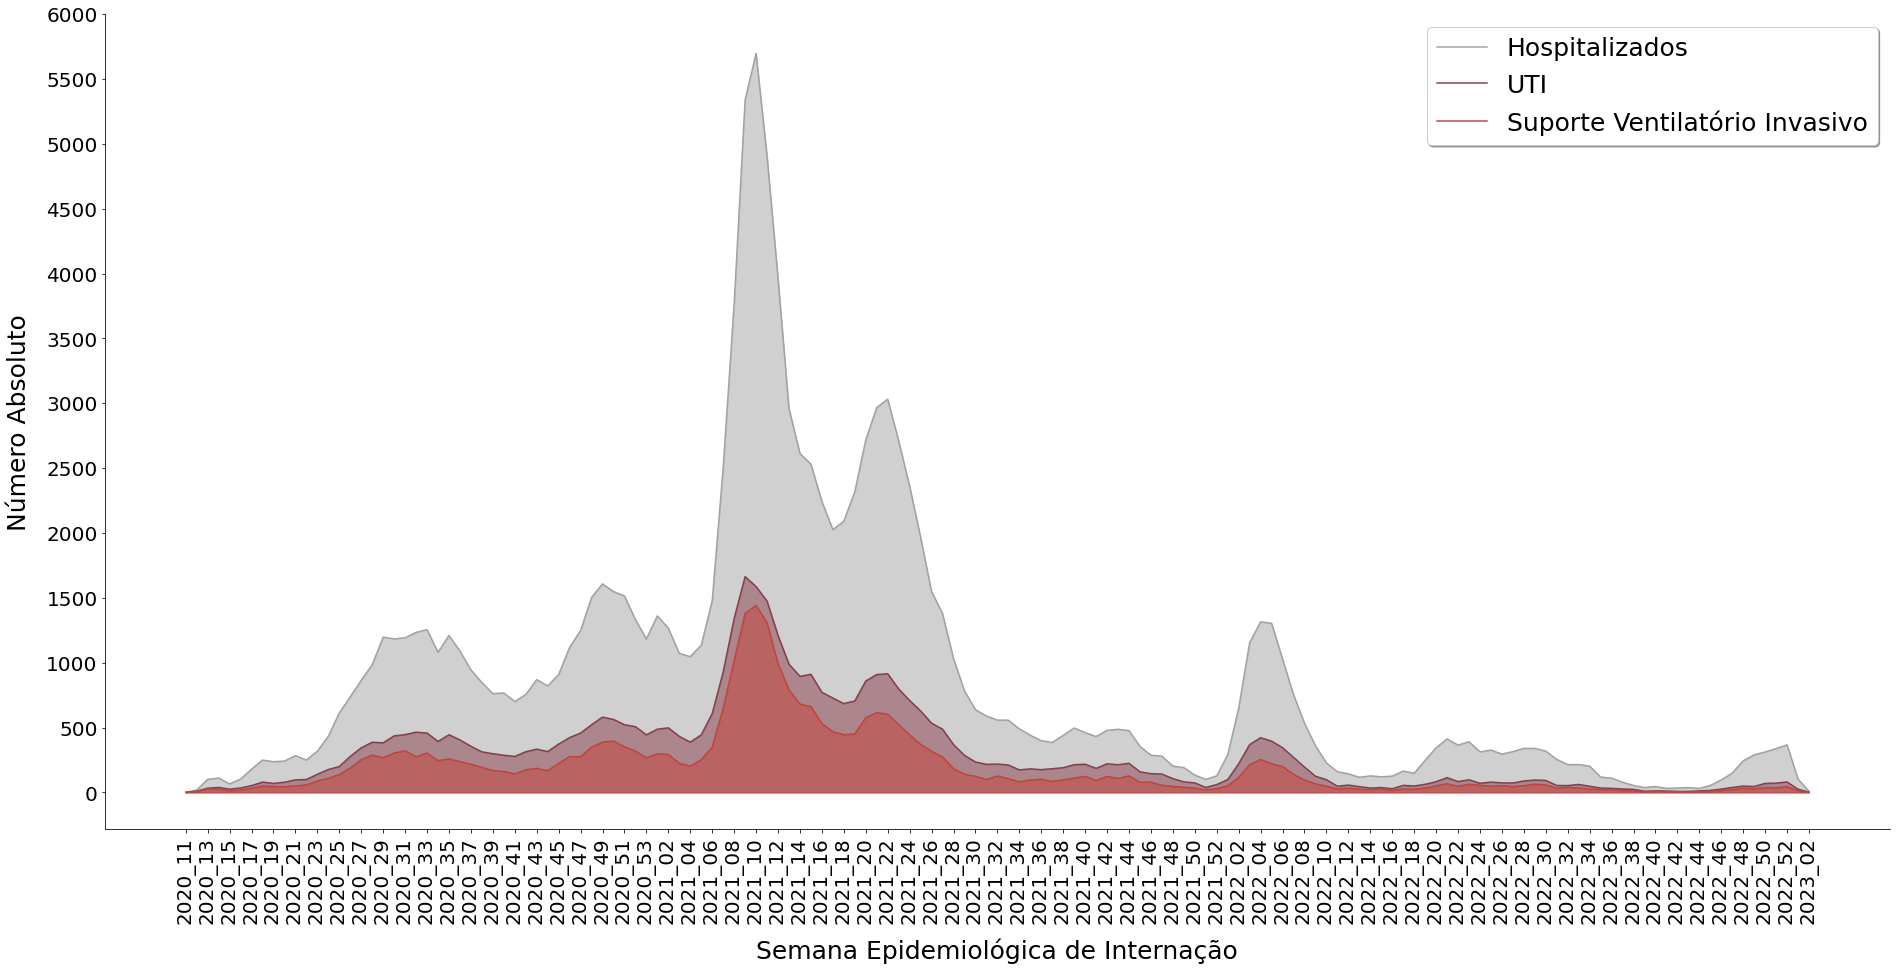

In [102]:
plt.figure(figsize=(32,15))
plt.plot(semana_hospUTISuport_Covid,houveIntern,color='#a3a2a2')
plt.plot(semana_hospUTISuport_Covid,internado,color='#8a3e4b')
plt.plot(semana_hospUTISuport_Covid,suporteVent,color='#c7433a')
plt.fill_between(semana_hospUTISuport_Covid,houveIntern,alpha=0.5,color='#a3a2a2')
plt.fill_between(semana_hospUTISuport_Covid,internado,alpha=0.5,color='#8a3e4b')
plt.fill_between(semana_hospUTISuport_Covid,suporteVent,alpha=0.5,color='#c7433a')
plt.xticks(np.arange(0,np.size(semana_hospUTISuport_Covid),2),fontsize=20, rotation=90)
plt.yticks(np.arange(0,6500,500),fontsize=20)
plt.xlabel('Semana Epidemiológica de Internação',fontsize=25,labelpad=15)
plt.ylabel('Número Absoluto', fontsize=25, labelpad=15)
plt.legend(legenda_hospUTISuport_Covid, fontsize=25, shadow = True)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/hospUTISuport_Covid.png',dpi=320,bbox_inches='tight')

In [103]:
zoomInternado = internado['2022_37':]
zoomInternado.tail()

Sem Epi Internacao
2022_50    70
2022_51    72
2022_52    81
2023_01    25
2023_02     3
Name: Classificacao final, dtype: int64

In [104]:
zoomSuporteVent = suporteVent['2022_37':]
zoomSuporteVent.tail()

Sem Epi Internacao
2022_50    38
2022_51    36
2022_52    45
2023_01    11
2023_02     1
Name: Classificacao final, dtype: int64

In [105]:
zoomHouveIntern = houveIntern['2022_37':]
zoomHouveIntern.tail()

Sem Epi Internacao
2022_50    312
2022_51    338
2022_52    367
2023_01    103
2023_02      9
Name: Classificacao final, dtype: int64

In [106]:
zoomSemana = zoomInternado
zoomSemana = zoomSemana.reset_index()
zoomSemana = zoomSemana['Sem Epi Internacao']
zoomSemana.tail()

13    2022_50
14    2022_51
15    2022_52
16    2023_01
17    2023_02
Name: Sem Epi Internacao, dtype: object

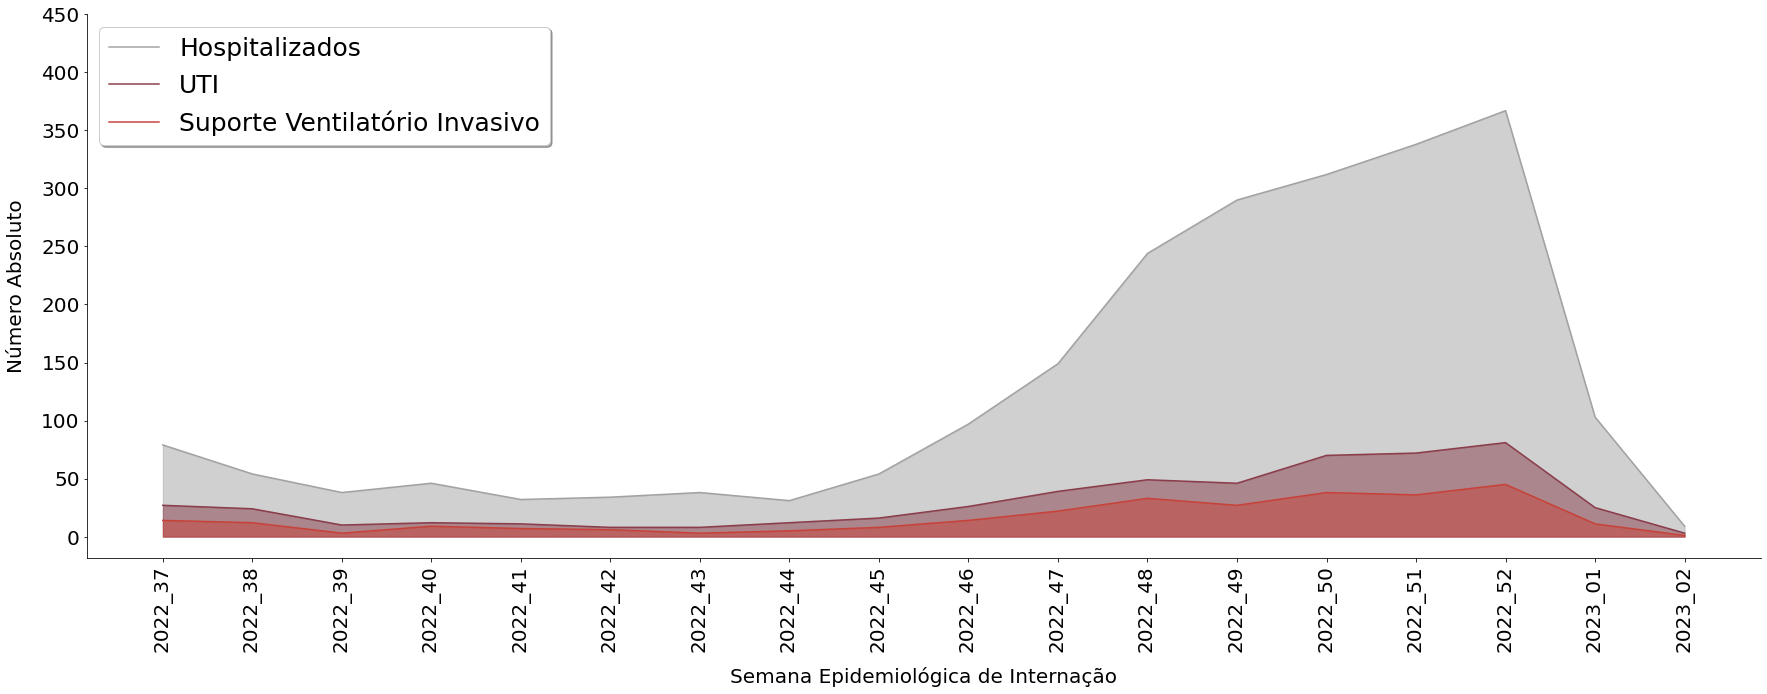

In [107]:
plt.figure(figsize=(30,10))
plt.plot(zoomSemana,zoomHouveIntern,color='#a3a2a2')
plt.plot(zoomSemana,zoomInternado,color='#8a3e4b')
plt.plot(zoomSemana,zoomSuporteVent,color='#c7433a')
plt.fill_between(zoomSemana,zoomHouveIntern,alpha=0.5,color='#a3a2a2')
plt.fill_between(zoomSemana,zoomInternado,alpha=0.5,color='#8a3e4b')
plt.fill_between(zoomSemana,zoomSuporteVent,alpha=0.5,color='#c7433a')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(np.arange(0,500,50),fontsize=20)
plt.xlabel('Semana Epidemiológica de Internação',fontsize=20,labelpad=15)
plt.ylabel('Número Absoluto', fontsize=20, labelpad=15)
plt.legend(legenda_hospUTISuport_Covid, fontsize=25, shadow = True)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/hospUTISuport_CovidZoom.png',dpi=720,bbox_inches='tight')

# Inicio Grafico hospUTISuport_InfluVSR

In [361]:
filtro_hospUTISuport_InfluVSR = dados[['Sem Epi Internacao','Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]

In [362]:
base = filtro_hospUTISuport_InfluVSR.groupby('Sem Epi Internacao').count()
base = base.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
base.head()

""
Sem Epi Internacao
2020_01
2020_02
2020_03
2020_04
2020_05


In [363]:
internadoInflu = filtro_hospUTISuport_InfluVSR.loc[filtro_hospUTISuport_InfluVSR['Internado UTI']=='Sim']
internadoInflu = internadoInflu.loc[internadoInflu['pos_pcrflu']=='Sim']
internadoInflu = internadoInflu.groupby('Sem Epi Internacao').count()
internadoInflu = internadoInflu.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
internadoInflu.tail()

,pos_pcrflu
Sem Epi Internacao,
2022_48,3
2022_49,2
2022_50,2
2022_51,1
2023_01,1


In [364]:
internadoVSR = filtro_hospUTISuport_InfluVSR.loc[filtro_hospUTISuport_InfluVSR['Internado UTI']=='Sim']
internadoVSR = internadoVSR.loc[internadoVSR['Classificacao final']=='SRAG por outro vírus resp']
internadoVSR = internadoVSR.loc[internadoVSR['pcr_vsr']==1]
internadoVSR = internadoVSR.groupby('Sem Epi Internacao').count()
internadoVSR = internadoVSR.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pos_pcrflu"])
internadoVSR.head()

,pcr_vsr
Sem Epi Internacao,
2020_20,1
2021_01,1
2021_10,3
2021_11,2
2021_12,2


In [365]:
internadoInfluVSR = pd.concat([internadoInflu,internadoVSR])
internadoInfluVSR = internadoInfluVSR.fillna(0)
internadoInfluVSR = internadoInfluVSR.reset_index()
internadoInfluVSR = internadoInfluVSR.sort_values(by='Sem Epi Internacao')
internadoInfluVSR = internadoInfluVSR.groupby('Sem Epi Internacao').sum()
internadoInfluVSR['Calculo'] = internadoInfluVSR['pos_pcrflu'] + internadoInfluVSR['pcr_vsr']
internadoInfluVSR = internadoInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
internadoInfluVSR = internadoInfluVSR.drop('2022_39')
internadoInfluVSR = internadoInfluVSR.fillna(0)
internadoInfluVSR.tail()

,pos_pcrflu,pcr_vsr,Calculo
Sem Epi Internacao,,,
2022_50,2.0,5.0,7.0
2022_51,1.0,4.0,5.0
2022_52,0.0,3.0,3.0
2023_01,1.0,0.0,1.0
2023_02,0.0,0.0,0.0


In [366]:
internadoInfluVSR = internadoInfluVSR['Calculo']

In [367]:
suportVentInflu = filtro_hospUTISuport_InfluVSR.loc[filtro_hospUTISuport_InfluVSR['Suporte ventilatorio']=='Sim, invasivo']
suportVentInflu = suportVentInflu.loc[suportVentInflu['pos_pcrflu']=='Sim']
suportVentInflu = suportVentInflu.groupby('Sem Epi Internacao').count()
suportVentInflu = suportVentInflu.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
suportVentInflu.tail()

,pos_pcrflu
Sem Epi Internacao,
2022_48,1
2022_49,2
2022_51,1
2022_52,1
2023_01,1


In [368]:
suportVentVSR = filtro_hospUTISuport_InfluVSR.loc[filtro_hospUTISuport_InfluVSR['Suporte ventilatorio']=='Sim, invasivo']
suportVentVSR = suportVentVSR.loc[suportVentVSR['Classificacao final']=='SRAG por outro vírus resp']
suportVentVSR = suportVentVSR.loc[suportVentVSR['pcr_vsr']==1]
suportVentVSR = suportVentVSR.groupby('Sem Epi Internacao').count()
suportVentVSR = suportVentVSR.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pos_pcrflu"])
suportVentVSR.tail(10)

,pcr_vsr
Sem Epi Internacao,
2022_42,1
2022_43,2
2022_44,4
2022_45,4
2022_46,5
2022_47,4
2022_48,2
2022_50,1
2022_51,1


In [369]:
suportVentInfluVSR = pd.concat([suportVentInflu,suportVentVSR])
suportVentInfluVSR = suportVentInfluVSR.fillna(0)
suportVentInfluVSR = suportVentInfluVSR.reset_index()
suportVentInfluVSR = suportVentInfluVSR.sort_values(by='Sem Epi Internacao')
suportVentInfluVSR = suportVentInfluVSR.groupby('Sem Epi Internacao').sum()
suportVentInfluVSR['Calculo'] = suportVentInfluVSR['pos_pcrflu'] + suportVentInfluVSR['pcr_vsr']
suportVentInfluVSR = suportVentInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
suportVentInfluVSR = suportVentInfluVSR.drop('2022_39')
suportVentInfluVSR = suportVentInfluVSR.fillna(0)
suportVentInfluVSR.tail(13)

,pos_pcrflu,pcr_vsr,Calculo
Sem Epi Internacao,,,
2022_42,0.0,1.0,1.0
2022_43,0.0,2.0,2.0
2022_44,0.0,4.0,4.0
2022_45,1.0,4.0,5.0
2022_46,1.0,5.0,6.0
2022_47,0.0,4.0,4.0
2022_48,1.0,2.0,3.0
2022_49,2.0,0.0,2.0
2022_50,0.0,1.0,1.0


In [370]:
suportVentInfluVSR = suportVentInfluVSR['Calculo']
suportVentInfluVSR.head()

Sem Epi Internacao
2020_01    0.0
2020_02    0.0
2020_03    0.0
2020_04    1.0
2020_05    0.0
Name: Calculo, dtype: float64

In [371]:
houveInternInflu = filtro_hospUTISuport_InfluVSR.loc[filtro_hospUTISuport_InfluVSR['Houve internacao']=='Sim']
houveInternInflu = houveInternInflu.loc[houveInternInflu['pos_pcrflu']=='Sim']
houveInternInflu = houveInternInflu.groupby('Sem Epi Internacao').count()
houveInternInflu = houveInternInflu.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pcr_vsr"])
houveInternInflu.tail(10)

,pos_pcrflu
Sem Epi Internacao,
2022_44,2
2022_45,2
2022_46,3
2022_47,10
2022_48,9
2022_49,6
2022_50,6
2022_51,5
2022_52,3


In [372]:
houveInternVSR = filtro_hospUTISuport_InfluVSR.loc[filtro_hospUTISuport_InfluVSR['Houve internacao']=='Sim']
houveInternVSR = houveInternVSR.loc[houveInternVSR['Classificacao final']=='SRAG por outro vírus resp']
houveInternVSR = houveInternVSR.loc[houveInternVSR['pcr_vsr']==1]
houveInternVSR = houveInternVSR.groupby('Sem Epi Internacao').count()
houveInternVSR = houveInternVSR.drop(columns=['Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao','tp_flu_pcr','pcr_fluasu',"pos_pcrflu"])
houveInternVSR.tail(10)

,pcr_vsr
Sem Epi Internacao,
2022_45,15
2022_46,9
2022_47,11
2022_48,14
2022_49,11
2022_50,18
2022_51,14
2022_52,18
2023_01,4


In [373]:
houveInternInfluVSR = pd.concat([houveInternInflu,houveInternVSR])
houveInternInfluVSR = houveInternInfluVSR.fillna(0)
houveInternInfluVSR = houveInternInfluVSR.reset_index()
houveInternInfluVSR = houveInternInfluVSR.sort_values(by='Sem Epi Internacao')
houveInternInfluVSR = houveInternInfluVSR.groupby('Sem Epi Internacao').sum()
houveInternInfluVSR['Calculo'] = houveInternInfluVSR['pos_pcrflu'] + houveInternInfluVSR['pcr_vsr']
houveInternInfluVSR = houveInternInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
houveInternInfluVSR = houveInternInfluVSR.drop('2022_39')
houveInternInfluVSR = houveInternInfluVSR.fillna(0)
houveInternInfluVSR.tail(10)

,pos_pcrflu,pcr_vsr,Calculo
Sem Epi Internacao,,,
2022_45,2.0,15.0,17.0
2022_46,3.0,9.0,12.0
2022_47,10.0,11.0,21.0
2022_48,9.0,14.0,23.0
2022_49,6.0,11.0,17.0
2022_50,6.0,18.0,24.0
2022_51,5.0,14.0,19.0
2022_52,3.0,18.0,21.0
2023_01,2.0,4.0,6.0


In [374]:
houveInternInfluVSR = houveInternInfluVSR['Calculo']

In [375]:
semana_hospUTISuport_InfluVSR = internadoInfluVSR.reset_index()
semana_hospUTISuport_InfluVSR = semana_hospUTISuport_InfluVSR['Sem Epi Internacao']

In [376]:
legenda_hospUTISuport_InfluVSR = ['Hospitalizados','UTI','Suporte Ventilatório Invasivo']

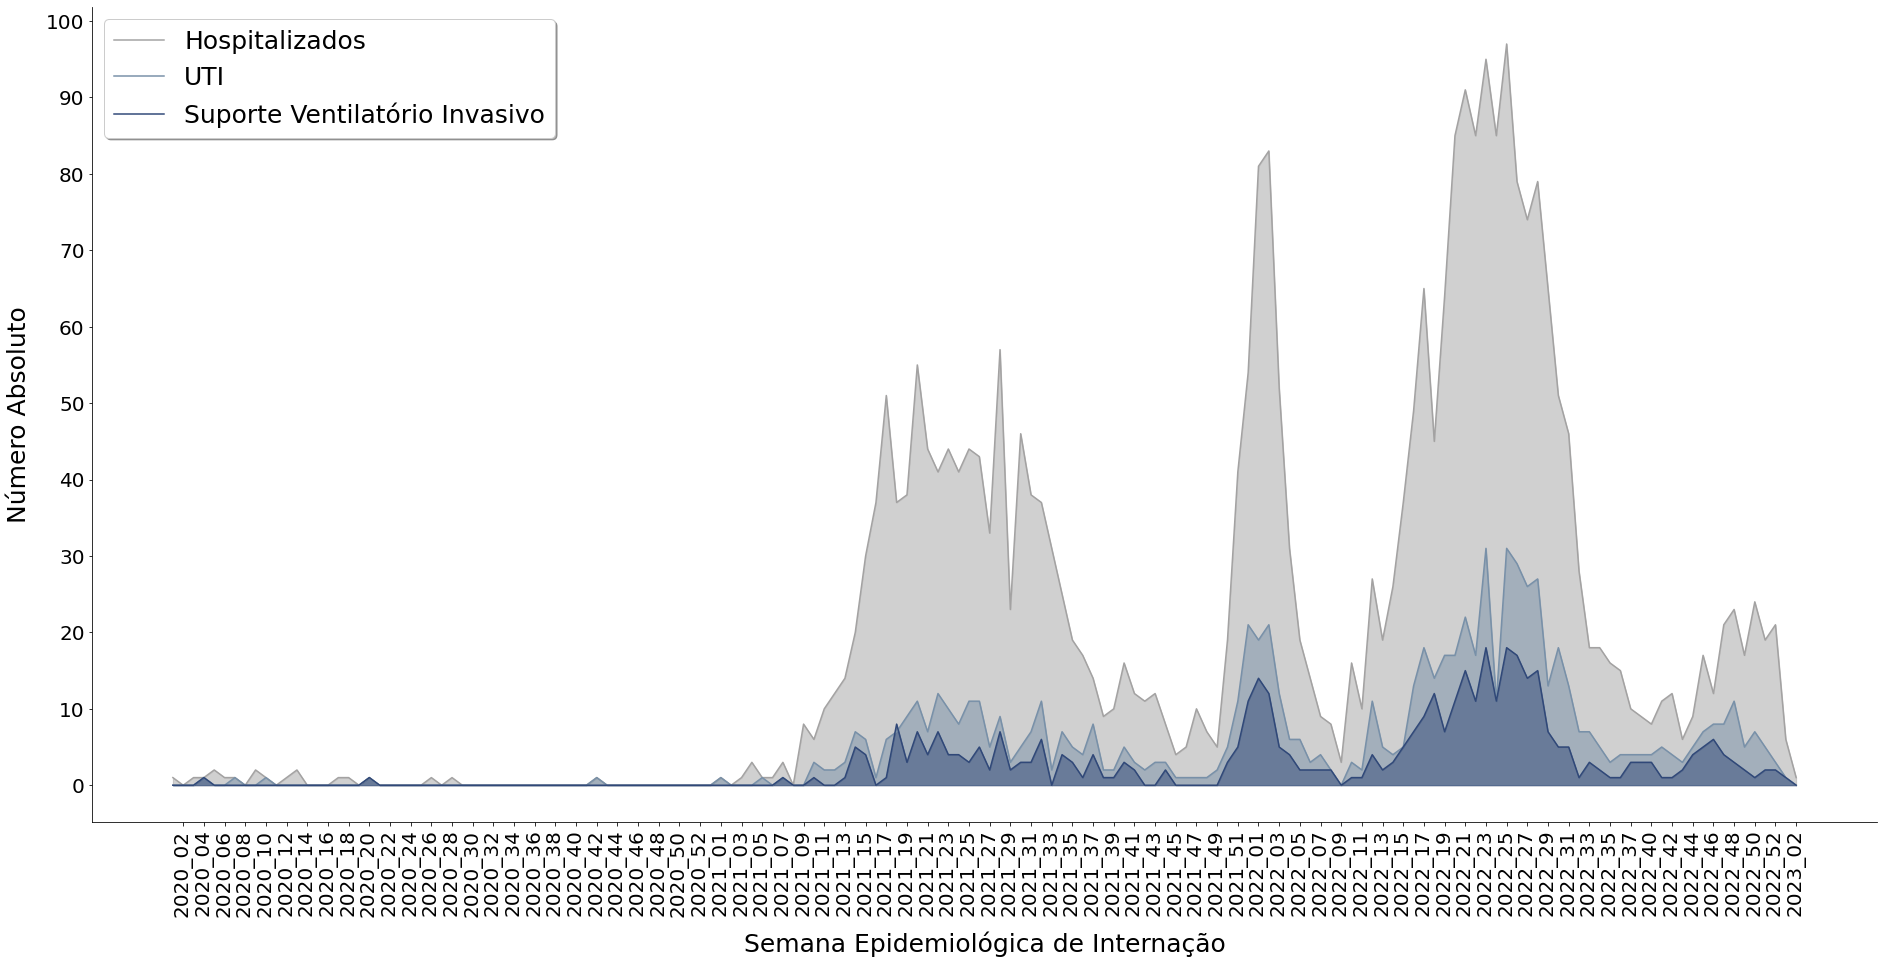

In [377]:
plt.figure(figsize=(32,15))
plt.plot(semana_hospUTISuport_InfluVSR,houveInternInfluVSR,color='#a3a2a2')
plt.plot(semana_hospUTISuport_InfluVSR,internadoInfluVSR,color='#7890a8')
plt.plot(semana_hospUTISuport_InfluVSR,suportVentInfluVSR,color='#304878')
plt.fill_between(semana_hospUTISuport_InfluVSR,houveInternInfluVSR,alpha=0.5,color='#a3a2a2')
plt.fill_between(semana_hospUTISuport_InfluVSR,internadoInfluVSR,alpha=0.5,color='#7890a8')
plt.fill_between(semana_hospUTISuport_InfluVSR,suportVentInfluVSR,alpha=0.5,color='#304878')
plt.xticks(np.arange(1,np.size(semana_hospUTISuport_InfluVSR),2),fontsize=20, rotation=90)
plt.yticks(np.arange(0,110,10),fontsize=20)
plt.xlabel('Semana Epidemiológica de Internação',fontsize=25,labelpad=15)
plt.ylabel('Número Absoluto', fontsize=25, labelpad=15)
plt.legend(legenda_hospUTISuport_InfluVSR, fontsize=25, shadow = True)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/hospUTISuport_InfluVSR.png',dpi=320,bbox_inches='tight')

# Inicio Grafico letalidadeHosp_Covid_InfluVSR

In [125]:
filtro_letalidadeHosp = dados[['Competencia Evolucao','Houve internacao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]

In [126]:
base = filtro_letalidadeHosp.groupby('Competencia Evolucao').count()
base = base.drop(columns=['Houve internacao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
base.tail()

""
Competencia Evolucao
2022_09
2022_10
2022_11
2022_12
2023_01


In [127]:
numeradorCovid = filtro_letalidadeHosp.loc[filtro_letalidadeHosp['Evolucao']=='Óbito']
numeradorCovid = numeradorCovid.loc[numeradorCovid['Classificacao final']=='COVID-19']
numeradorCovid = numeradorCovid.loc[numeradorCovid['Houve internacao']=='Sim']
numeradorCovid = numeradorCovid.groupby('Competencia Evolucao').count()
numeradorCovid.head()

,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Evolucao,,,,,,,
2020_03,4,4,4,3,0,0,0
2020_04,58,58,58,20,0,0,0
2020_05,174,174,174,56,0,0,0
2020_06,420,420,420,182,0,0,0
2020_07,1321,1321,1321,549,0,0,0


In [128]:
denominadorCovid = filtro_letalidadeHosp.copy()
denominadorCovid['Evolucao'] = denominadorCovid['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'}) #Vai substituir onde esta Óbito ou Cura por Óbito/Cura, para dps podermos pegar so as linhas que interessam
denominadorCovid = denominadorCovid.loc[denominadorCovid['Evolucao']=='Óbito/Cura']
denominadorCovid = denominadorCovid.loc[denominadorCovid['Houve internacao']=='Sim']
denominadorCovid = denominadorCovid.loc[denominadorCovid['Classificacao final']=='COVID-19']
denominadorCovid = denominadorCovid.groupby('Competencia Evolucao').count()
denominadorCovid.head()

,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Evolucao,,,,,,,
2020_03,37,37,37,25,0,0,0
2020_04,418,418,418,149,0,0,0
2020_05,975,975,975,316,0,0,0
2020_06,1683,1683,1683,743,0,0,0
2020_07,4023,4023,4023,1632,0,0,0


In [129]:
calculoCovid = numeradorCovid['Evolucao']/denominadorCovid['Evolucao']*100
calculoCovid = calculoCovid.to_frame()
calculoCovid = calculoCovid.reset_index()
calculoCovid.head()

,Competencia Evolucao,Evolucao
0,2020_03,10.810811
1,2020_04,13.875598
2,2020_05,17.846154
3,2020_06,24.955437
4,2020_07,32.836192


In [130]:
semana_letalidadeHosp = calculoCovid['Competencia Evolucao']
semana_letalidadeHosp.tail()

30    2022_09
31    2022_10
32    2022_11
33    2022_12
34    2023_01
Name: Competencia Evolucao, dtype: object

In [131]:
eixo_y_Covid = calculoCovid['Evolucao']

In [132]:
numeradorInflu = filtro_letalidadeHosp.loc[filtro_letalidadeHosp['Evolucao']=='Óbito']
numeradorInflu = numeradorInflu.loc[numeradorInflu['Houve internacao']=='Sim']
numeradorInflu = numeradorInflu.loc[numeradorInflu['pos_pcrflu']=='Sim']
numeradorInflu = numeradorInflu.groupby('Competencia Evolucao').count()
numeradorInflu = numeradorInflu.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
numeradorInflu.tail()

,Evolucao,pos_pcrflu
Competencia Evolucao,,
2022_08,3,3
2022_09,2,2
2022_11,2,2
2022_12,4,4
2023_01,2,2


In [133]:
numeradorVSR = filtro_letalidadeHosp.loc[filtro_letalidadeHosp['Evolucao']=='Óbito']
numeradorVSR = numeradorVSR.loc[numeradorVSR['Houve internacao']=='Sim']
numeradorVSR = numeradorVSR.loc[numeradorVSR['pcr_vsr']==1]
numeradorVSR = numeradorVSR.groupby('Competencia Evolucao').count()
numeradorVSR = numeradorVSR.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pos_pcrflu'])
numeradorVSR.tail()

,Evolucao,pcr_vsr
Competencia Evolucao,,
2022_08,6,6
2022_09,2,2
2022_10,2,2
2022_11,3,3
2022_12,1,1


In [134]:
numeradorInfluVSR = pd.concat([numeradorInflu,numeradorVSR])
numeradorInfluVSR = numeradorInfluVSR.fillna(0)
numeradorInfluVSR = numeradorInfluVSR.reset_index()
numeradorInfluVSR = numeradorInfluVSR.sort_values(by='Competencia Evolucao')
numeradorInfluVSR = numeradorInfluVSR.groupby('Competencia Evolucao').sum()
numeradorInfluVSR['Calculo'] = numeradorInfluVSR['pos_pcrflu'] + numeradorInfluVSR['pcr_vsr']
numeradorInfluVSR.tail()

,Evolucao,pos_pcrflu,pcr_vsr,Calculo
Competencia Evolucao,,,,
2022_09,4,2.0,2.0,4.0
2022_10,2,0.0,2.0,2.0
2022_11,5,2.0,3.0,5.0
2022_12,5,4.0,1.0,5.0
2023_01,2,2.0,0.0,2.0


In [135]:
denominadorInflu = filtro_letalidadeHosp.copy()
denominadorInflu['Evolucao'] = denominadorInflu['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominadorInflu = denominadorInflu.loc[denominadorInflu['Evolucao']=='Óbito/Cura']
denominadorInflu = denominadorInflu.loc[denominadorInflu['Houve internacao']=='Sim']
denominadorInflu = denominadorInflu.loc[denominadorInflu['pos_pcrflu']=='Sim']
denominadorInflu = denominadorInflu.groupby('Competencia Evolucao').count()
denominadorInflu = denominadorInflu.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
denominadorInflu.tail()

,Evolucao,pos_pcrflu
Competencia Evolucao,,
2022_09,3,3
2022_10,8,8
2022_11,9,9
2022_12,29,29
2023_01,4,4


In [136]:
denominadorVSR = filtro_letalidadeHosp.copy()
denominadorVSR['Evolucao'] = denominadorVSR['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominadorVSR = denominadorVSR.loc[denominadorVSR['Evolucao']=='Óbito/Cura']
denominadorVSR = denominadorVSR.loc[denominadorVSR['Houve internacao']=='Sim']
denominadorVSR = denominadorVSR.loc[denominadorVSR['pcr_vsr']==1]
denominadorVSR = denominadorVSR.groupby('Competencia Evolucao').count()
denominadorVSR = denominadorVSR.drop(columns=['Houve internacao','Classificacao final','tp_flu_pcr','pcr_fluasu','pos_pcrflu'])
denominadorVSR.tail()

,Evolucao,pcr_vsr
Competencia Evolucao,,
2022_09,64,64
2022_10,33,33
2022_11,40,40
2022_12,75,75
2023_01,15,15


In [137]:
denominadorInfluVSR = pd.concat([denominadorInflu,denominadorVSR])
denominadorInfluVSR = denominadorInfluVSR.fillna(0)
denominadorInfluVSR = denominadorInfluVSR.reset_index()
denominadorInfluVSR = denominadorInfluVSR.sort_values(by='Competencia Evolucao')
denominadorInfluVSR = denominadorInfluVSR.groupby('Competencia Evolucao').sum()
denominadorInfluVSR['Calculo'] = denominadorInfluVSR['pos_pcrflu'] + denominadorInfluVSR['pcr_vsr']
denominadorInfluVSR.tail()

,Evolucao,pos_pcrflu,pcr_vsr,Calculo
Competencia Evolucao,,,,
2022_09,67,3.0,64.0,67.0
2022_10,41,8.0,33.0,41.0
2022_11,49,9.0,40.0,49.0
2022_12,104,29.0,75.0,104.0
2023_01,19,4.0,15.0,19.0


In [138]:
calculoInfluVSR = numeradorInfluVSR['Calculo']/denominadorInfluVSR['Calculo']*100
calculoInfluVSR = calculoInfluVSR.to_frame()
calculoInfluVSR = calculoInfluVSR.merge(base,how='outer',right_index=True,left_index=True)
calculoInfluVSR = calculoInfluVSR.drop(['2020_01','2020_02'])
calculoInfluVSR = calculoInfluVSR.reset_index()
calculoInfluVSR = calculoInfluVSR.fillna(0)
calculoInfluVSR.tail()

,Competencia Evolucao,Calculo
30,2022_09,5.970149
31,2022_10,4.878049
32,2022_11,10.204082
33,2022_12,4.807692
34,2023_01,10.526316


In [139]:
eixo_y_InfluVSR = calculoInfluVSR['Calculo']

In [140]:
legenda_letalidadeHosp = pd.DataFrame(columns=['COVID-19','Influenza e VSR'])

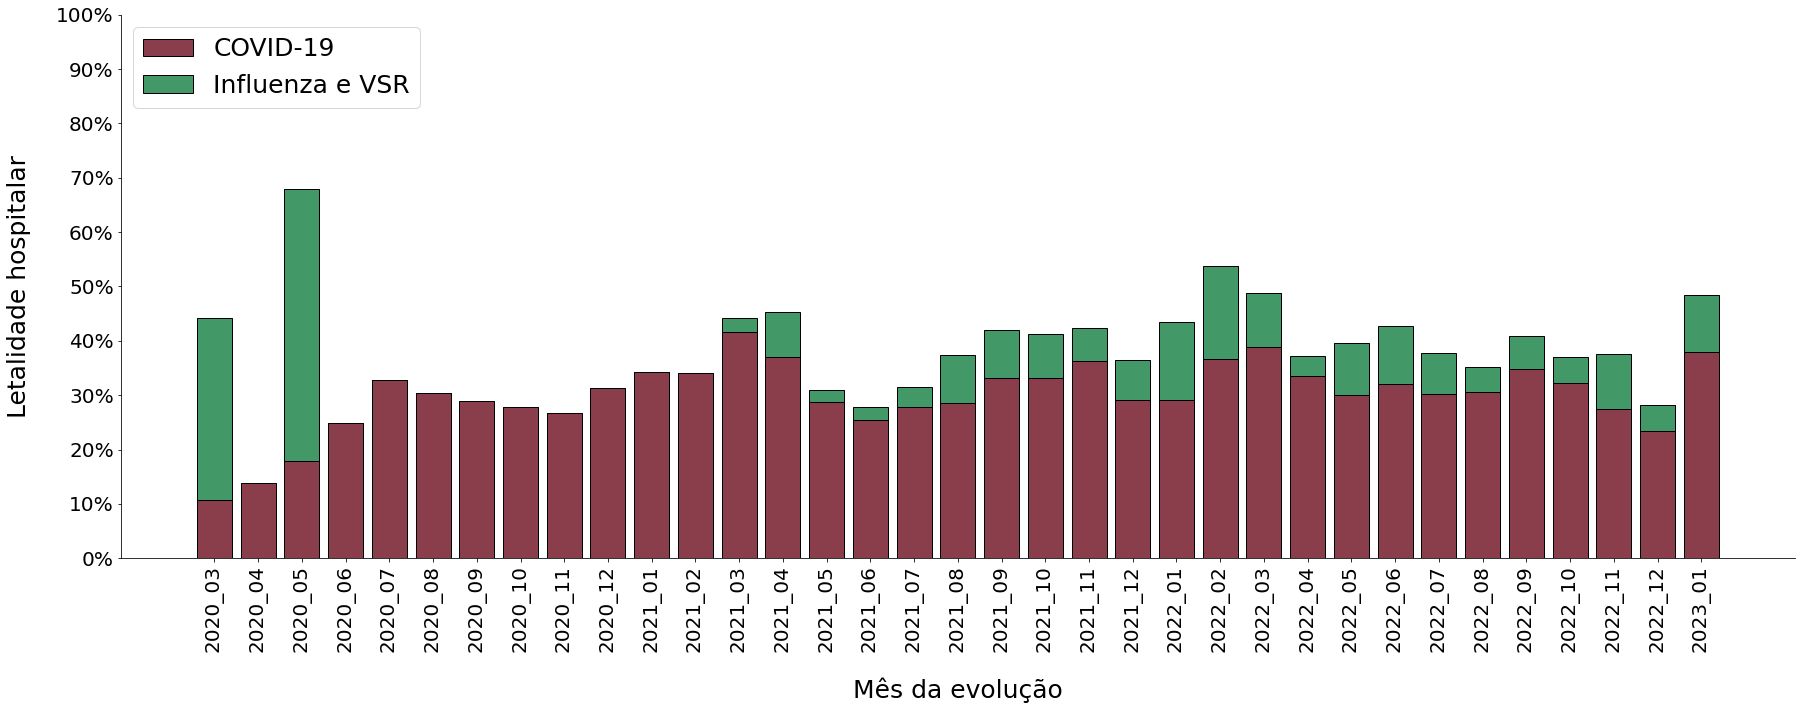

In [141]:
plt.figure(figsize=(30,10))
plt.bar(semana_letalidadeHosp,eixo_y_Covid,color='#8a3e4b',edgecolor='#000000')
plt.bar(semana_letalidadeHosp,eixo_y_InfluVSR,bottom=eixo_y_Covid,color='#429867',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=20)
plt.yticks(np.arange(0,110,10),fontsize=20)
plt.xlabel('Mês da evolução',fontsize=25,labelpad=25)
plt.ylabel('Letalidade hospitalar',fontsize=25,labelpad=25)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_letalidadeHosp,fontsize=25,loc='upper left')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/letalidadeHosp_CovidInfluVSR.png',dpi=720,bbox_inches='tight')

# Inicio Grafico medianaObitoCura_Covid_InfluVSR

In [492]:
filtroInfluVSR = dados[['Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtroInfluVSR

,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,SRAG não especificado,Cura,8.0,NaN,NaN,NaN,NaN
1,2020_01,SRAG não especificado,Cura,5.0,NaN,NaN,NaN,NaN
2,2020_01,SRAG não especificado,Cura,10.0,NaN,NaN,NaN,NaN
3,2020_01,SRAG não especificado,Óbito,9.0,NaN,NaN,NaN,NaN
4,2020_01,SRAG não especificado,Cura,6.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
187544,NaN,SRAG não especificado,Segue Internado,0.0,NaN,NaN,NaN,NaN
187545,2022_12,COVID-19,Cura,9.0,NaN,NaN,NaN,NaN
187546,2022_12,COVID-19,Cura,6.0,NaN,NaN,NaN,NaN
187547,2020_07,SRAG não especificado,Cura,3.0,NaN,NaN,NaN,NaN


In [493]:
base = filtroInfluVSR.groupby('Competencia Evolucao').count()
base = base.drop(columns=['Classificacao final','Evolucao','Dias Perm Hospital','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
base.tail()

""
Competencia Evolucao
2022_09
2022_10
2022_11
2022_12
2023_01


In [494]:
filtroCovid = dados[['Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital']]
filtroCovid = filtroCovid.loc[filtroCovid['Classificacao final']=='COVID-19']
filtroCovid

,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital
130,2020_03,COVID-19,Óbito,6.0
131,2020_04,COVID-19,Óbito,12.0
149,2020_04,COVID-19,Cura,12.0
158,2020_05,COVID-19,Cura,44.0
177,2020_04,COVID-19,Óbito,19.0
...,...,...,...,...
187541,2022_12,COVID-19,Óbito,3.0
187542,NaN,COVID-19,Segue Internado,0.0
187543,NaN,COVID-19,Segue Internado,0.0
187545,2022_12,COVID-19,Cura,9.0


In [495]:
curaInflu = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Cura']
curaInflu = curaInflu.loc[curaInflu['pos_pcrflu']=='Sim']
curaInflu = curaInflu.sort_values(by='Competencia Evolucao')
curaInflu = curaInflu.set_index('Competencia Evolucao')
curaInflu = curaInflu.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
curaInflu = curaInflu.rename(columns={'Dias Perm Hospital':'Dias Perm Hospital Influ'})
curaInflu = curaInflu.drop(['2020_01','2020_02','2020_03'])
curaInflu

,Dias Perm Hospital Influ
Competencia Evolucao,
2020_04,16.0
2020_05,3.0
2020_07,13.0
2020_10,12.0
2021_02,26.0
...,...
NaN,0.0
NaN,0.0
NaN,0.0


In [496]:
curaVSR = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Cura']
curaVSR = curaVSR.loc[curaVSR['pcr_vsr']==1]
curaVSR = curaVSR.loc[curaVSR['Classificacao final']=='SRAG por outro vírus resp']
curaVSR = curaVSR.sort_values(by='Competencia Evolucao')
curaVSR = curaVSR.set_index('Competencia Evolucao')
curaVSR = curaVSR.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
curaVSR

,Dias Perm Hospital
Competencia Evolucao,
2020_04,7.0
2020_04,5.0
2020_06,16.0
2020_07,11.0
2021_01,4.0
...,...
NaN,0.0
NaN,0.0
NaN,0.0


In [497]:
curaInfluVSR = pd.concat([curaInflu,curaVSR])
curaInfluVSR = curaInfluVSR.reset_index()
curaInfluVSR = curaInfluVSR.sort_values(by='Competencia Evolucao')
curaInfluVSR = curaInfluVSR.groupby('Competencia Evolucao').median()
curaInfluVSR = curaInfluVSR.merge(base,how='outer',right_index=True, left_index=True)
curaInfluVSR = curaInfluVSR.drop(['2020_01','2020_02','2020_03'])
curaInfluVSR = curaInfluVSR.fillna(0)
curaInfluVSR.head()

,Dias Perm Hospital Influ,Dias Perm Hospital
Competencia Evolucao,,
2020_04,16.0,6.0
2020_05,3.0,0.0
2020_06,0.0,16.0
2020_07,13.0,11.0
2020_08,0.0,0.0


In [498]:
curaInfluVSR =  curaInfluVSR['Dias Perm Hospital']
curaInfluVSR.tail()

Competencia Evolucao
2022_09    7.0
2022_10    6.5
2022_11    9.0
2022_12    5.0
2023_01    4.5
Name: Dias Perm Hospital, dtype: float64

In [499]:
curaCovid = filtroCovid.loc[filtroCovid['Evolucao']=='Cura']
curaCovid = curaCovid.groupby(['Competencia Evolucao']).median()
curaCovid = curaCovid.drop(['2020_03'])
curaCovid = curaCovid.reset_index()
curaCovid.tail()

,Competencia Evolucao,Dias Perm Hospital
29,2022_09,10.0
30,2022_10,10.0
31,2022_11,7.0
32,2022_12,5.0
33,2023_01,9.0


In [500]:
curaCovid = curaCovid['Dias Perm Hospital']
curaCovid.tail()

29    10.0
30    10.0
31     7.0
32     5.0
33     9.0
Name: Dias Perm Hospital, dtype: float64

In [501]:
obitoInflu = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Óbito']
obitoInflu = obitoInflu.loc[obitoInflu['pos_pcrflu']=='Sim']
obitoInflu = obitoInflu.sort_values(by='Competencia Evolucao')
obitoInflu = obitoInflu.set_index('Competencia Evolucao')
obitoInflu = obitoInflu.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
obitoInflu = obitoInflu.drop(['2020_01','2020_03'])
obitoInflu

,Dias Perm Hospital
Competencia Evolucao,
2021_03,14.0
2021_12,7.0
2021_12,8.0
2021_12,0.0
2022_01,9.0
...,...
2022_12,3.0
2022_12,3.0
2022_12,9.0


In [502]:
obitoVSR = filtroInfluVSR.loc[filtroInfluVSR['Evolucao']=='Óbito']
obitoVSR = obitoVSR.loc[obitoVSR['pcr_vsr']==1]
obitoVSR = obitoVSR.loc[obitoVSR['Classificacao final']=='SRAG por outro vírus resp']
obitoVSR = obitoVSR.sort_values(by='Competencia Evolucao')
obitoVSR = obitoVSR.set_index('Competencia Evolucao')
obitoVSR = obitoVSR.drop(columns=['Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu','pcr_vsr'])
obitoVSR

,Dias Perm Hospital
Competencia Evolucao,
2021_04,4.0
2021_04,1.0
2021_04,1.0
2021_04,3.0
2021_04,0.0
...,...
2022_08,0.0
2022_10,85.0
2022_11,53.0


In [503]:
obitoInfluVSR = pd.concat([obitoInflu,obitoVSR])
obitoInfluVSR = obitoInfluVSR.reset_index()
obitoInfluVSR = obitoInfluVSR.sort_values(by='Competencia Evolucao')
obitoInfluVSR = obitoInfluVSR.groupby('Competencia Evolucao').median()
obitoInfluVSR = obitoInfluVSR.merge(base,how='outer',right_index=True, left_index=True)
obitoInfluVSR = obitoInfluVSR.drop(['2020_01','2020_02','2020_03'])
obitoInfluVSR.tail()

,Dias Perm Hospital
Competencia Evolucao,
2022_09,59.0
2022_10,85.0
2022_11,5.0
2022_12,3.0
2023_01,6.0


In [504]:
obitoInfluVSR = obitoInfluVSR['Dias Perm Hospital']

In [505]:
obitoCovid = filtroCovid.loc[filtroCovid['Evolucao']=='Óbito']
obitoCovid = obitoCovid.groupby(['Competencia Evolucao']).median()
obitoCovid = obitoCovid.drop(['2020_03'])
obitoCovid = obitoCovid.reset_index()
obitoCovid.tail()

,Competencia Evolucao,Dias Perm Hospital
29,2022_09,12.0
30,2022_10,22.5
31,2022_11,10.0
32,2022_12,5.0
33,2023_01,12.0


In [506]:
semana_medianaObitoCura = obitoCovid['Competencia Evolucao']

In [507]:
obitoCovid = obitoCovid['Dias Perm Hospital']
obitoCovid.tail()

29    12.0
30    22.5
31    10.0
32     5.0
33    12.0
Name: Dias Perm Hospital, dtype: float64

In [508]:
legenda_medianaObitoCura_Covid_InfluVSR = pd.DataFrame(columns=['Óbito por COVID-19','Cura por COVID-19','Óbito por Influenza/VSR','Cura por Influenza/VSR'])

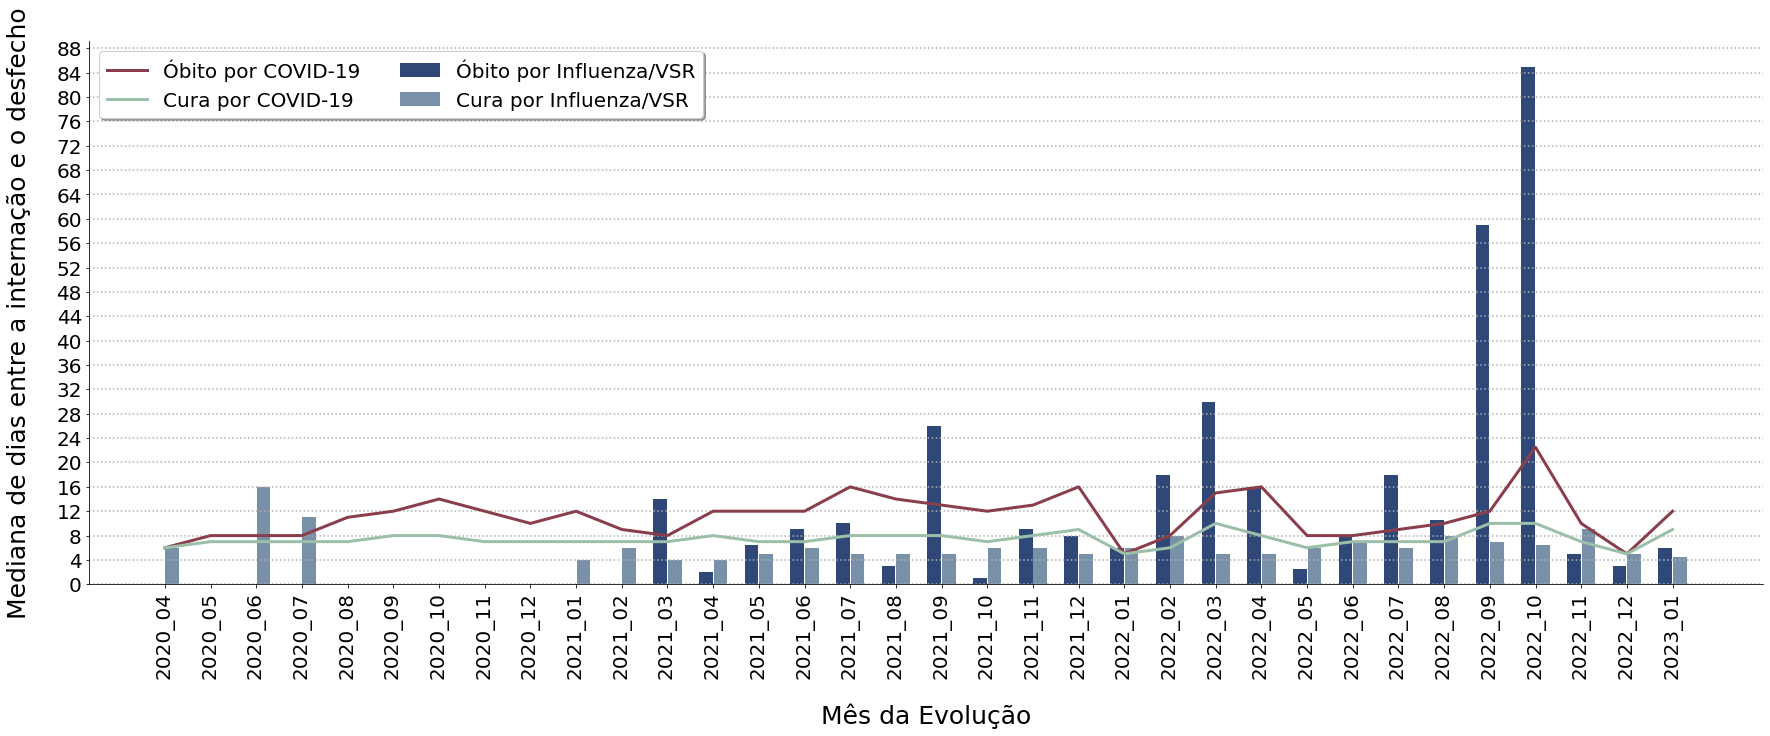

In [510]:
plt.figure(figsize=(30,10))
plt.plot(semana_medianaObitoCura,obitoCovid,color='#8a3e4b',linewidth=3)
plt.plot(semana_medianaObitoCura,curaCovid,color='#9bbfa8',linewidth=3)
plt.bar(np.arange(0,np.size(semana_medianaObitoCura),1)-0.16,obitoInfluVSR,width=0.3,color='#304878')
plt.bar(np.arange(0,np.size(semana_medianaObitoCura),1)+0.16,curaInfluVSR,width=0.3,color='#7890a8')
sns.despine()
plt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)
plt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)
plt.xticks(np.arange(0,np.size(semana_medianaObitoCura),1),rotation=90,fontsize=20)
plt.yticks(np.arange(0,90,4),fontsize=20)
#plt.legend(legenda,fontsize=25,shadow=True,loc='upper left')
plt.grid(axis='y',linestyle='dotted',linewidth=1.5)
plt.legend(legenda_medianaObitoCura_Covid_InfluVSR,fontsize=20,shadow=True,ncol=2,loc='upper left')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/medianaObitoCura_CovidInfluVSR.png',dpi=720,bbox_inches='tight')

# Inicio Grafico proporcaoHosp_Influ

In [160]:
filtro_proporcaoHosp_influ = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_proporcaoHosp_influ['Idade'] = filtro_proporcaoHosp_influ['Idade'].fillna(0)
filtro_proporcaoHosp_influ

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\1098093552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoHosp_influ['Idade'] = filtro_proporcaoHosp_influ['Idade'].fillna(0)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,Sim,SRAG não especificado,0-9 anos,0.0,NaN,NaN,NaN,NaN
1,2020_01,Sim,SRAG não especificado,0-9 anos,0.0,NaN,NaN,NaN,NaN
2,2020_01,Sim,SRAG não especificado,10-19 anos,11.0,NaN,NaN,NaN,NaN
3,2020_01,Sim,SRAG não especificado,60 anos ou mais,75.0,NaN,NaN,NaN,NaN
4,2020_01,Sim,SRAG não especificado,0-9 anos,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
187544,2023_01,Sim,SRAG não especificado,60 anos ou mais,68.0,NaN,NaN,NaN,NaN
187545,2022_12,Sim,COVID-19,60 anos ou mais,71.0,NaN,NaN,NaN,NaN
187546,2022_12,Sim,COVID-19,20-59 anos,42.0,NaN,NaN,NaN,NaN
187547,2020_07,Sim,SRAG não especificado,60 anos ou mais,85.0,NaN,NaN,NaN,NaN


In [161]:
filtro_proporcaoHosp_influ['Idade'] = filtro_proporcaoHosp_influ['Idade'].astype(int)
filtro_proporcaoHosp_influ.head()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\1492441772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoHosp_influ['Idade'] = filtro_proporcaoHosp_influ['Idade'].astype(int)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,Sim,SRAG não especificado,0-9 anos,0,NaN,NaN,NaN,NaN
1,2020_01,Sim,SRAG não especificado,0-9 anos,0,NaN,NaN,NaN,NaN
2,2020_01,Sim,SRAG não especificado,10-19 anos,11,NaN,NaN,NaN,NaN
3,2020_01,Sim,SRAG não especificado,60 anos ou mais,75,NaN,NaN,NaN,NaN
4,2020_01,Sim,SRAG não especificado,0-9 anos,4,NaN,NaN,NaN,NaN


In [162]:
for index, idade in filtro_proporcaoHosp_influ.iterrows():
    if idade['Idade'] < 12:
        filtro_proporcaoHosp_influ.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro_proporcaoHosp_influ.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro_proporcaoHosp_influ.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro_proporcaoHosp_influ.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro_proporcaoHosp_influ.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro_proporcaoHosp_influ.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\1629695738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoHosp_influ.loc[index,'Idade'] = '0-11 anos'


In [163]:
filtro_proporcaoHosp_influ = filtro_proporcaoHosp_influ.loc[filtro_proporcaoHosp_influ['Houve internacao']=='Sim']
filtro_proporcaoHosp_influ = filtro_proporcaoHosp_influ.loc[filtro_proporcaoHosp_influ['pos_pcrflu']=='Sim']
filtro_proporcaoHosp_influ.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
715,2020_03,Sim,SRAG por influenza,20-59 anos,40-59 anos,Sim,Influenza A,Influenza nao subtipado,NaN
1113,2020_05,Sim,SRAG por influenza,20-59 anos,40-59 anos,Sim,Influenza B,NaN,NaN
1189,2020_01,Sim,SRAG por influenza,0-9 anos,0-11 anos,Sim,Influenza B,NaN,NaN
1198,2020_01,Sim,SRAG por influenza,10-19 anos,0-11 anos,Sim,Influenza B,NaN,NaN
1702,2020_02,Sim,SRAG por influenza,20-59 anos,40-59 anos,Sim,Influenza A,Influenza A(H1N1)pdm09,NaN


In [164]:
totalHospitalizacoes = filtro_proporcaoHosp_influ.groupby('Competencia Internacao').count()
totalHospitalizacoes = totalHospitalizacoes.drop('2020_03')
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Internacao,,,,,,,,
2020_01,4,4,4,4,4,4,1,0
2020_02,5,5,5,5,5,5,4,0
2020_05,1,1,1,1,1,1,0,0
2020_06,1,1,1,1,1,1,0,0
2020_10,1,1,1,1,1,1,0,0


In [165]:
separaIdade = filtro_proporcaoHosp_influ.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_01                                3                    3   
          2020_02                                1                    1   
          2021_11                                1                    1   
          2021_12                                8                    8   
          2022_01                               31                   31   

                                  Faixa Etaria  pos_pcrflu  tp_flu_pcr  \
Idade     Competencia Internacao                                         
0-11 anos 2020_01                            3           3           3   
          2020_02                            1           1           1   
          2021_11                            1           1           1   
          2021_12                            8           8           8   
          2022_01                           31          31          31   

                                  pcr_fluasu  pcr_vsr  
Idade     Competencia Internacao                       
0-11 anos 2020_01                          0        0  
          2020_02                          0        0  
          2021_11                          1        1  
          2021_12                          8        1  
          2022_01                         31        0

In [166]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade11= idade11.fillna(0)
idade11 = idade11['2021_12':]
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Internacao
2022_06    13.740458
2022_07    17.777778
2022_08    25.000000
2022_09     0.000000
2022_10    42.857143
2022_11    33.333333
2022_12    44.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [167]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['2021_12':]
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Internacao
2022_06    3.816794
2022_07    0.000000
2022_08    0.000000
2022_09    0.000000
2022_10    0.000000
2022_11    9.523810
2022_12    4.000000
2023_01    0.000000
Name: Proporcao, dtype: float64

In [168]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop(['2020_03'])
idade39= idade39.fillna(0)
idade39 = idade39['2021_12':]
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Internacao
2022_06     8.396947
2022_07     8.888889
2022_08    25.000000
2022_09     0.000000
2022_10     0.000000
2022_11     0.000000
2022_12     8.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [169]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(['2020_03'])
idade59= idade59.fillna(0)
idade59 = idade59['2021_12':]
idade59 = idade59['Proporcao']
idade59.head(8)

Competencia Internacao
2021_12    18.085106
2022_01    14.462810
2022_02    12.121212
2022_03    16.666667
2022_04    14.285714
2022_05    15.819209
2022_06    10.687023
2022_07    15.555556
Name: Proporcao, dtype: float64

In [170]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade79= idade79.fillna(0)
idade79 = idade79['2021_12':]
idade79 = idade79['Proporcao']
idade79.head(8)

Competencia Internacao
2021_12    37.234043
2022_01    43.388430
2022_02    33.333333
2022_03    29.166667
2022_04    35.714286
2022_05    36.158192
2022_06    41.221374
2022_07    40.000000
Name: Proporcao, dtype: float64

In [171]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade80= idade80.fillna(0)
idade80 = idade80['2021_12':]
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Internacao
2022_06    22.137405
2022_07    17.777778
2022_08     0.000000
2022_09     0.000000
2022_10    14.285714
2022_11    23.809524
2022_12    12.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [172]:
competencia_proporcaoHosp_influ = idade80.to_frame()
competencia_proporcaoHosp_influ = competencia_proporcaoHosp_influ.reset_index()
competencia_proporcaoHosp_influ = competencia_proporcaoHosp_influ['Competencia Internacao']
competencia_proporcaoHosp_influ.tail()

9     2022_09
10    2022_10
11    2022_11
12    2022_12
13    2023_01
Name: Competencia Internacao, dtype: object

In [173]:
legenda_proporcaoHosp_influ = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

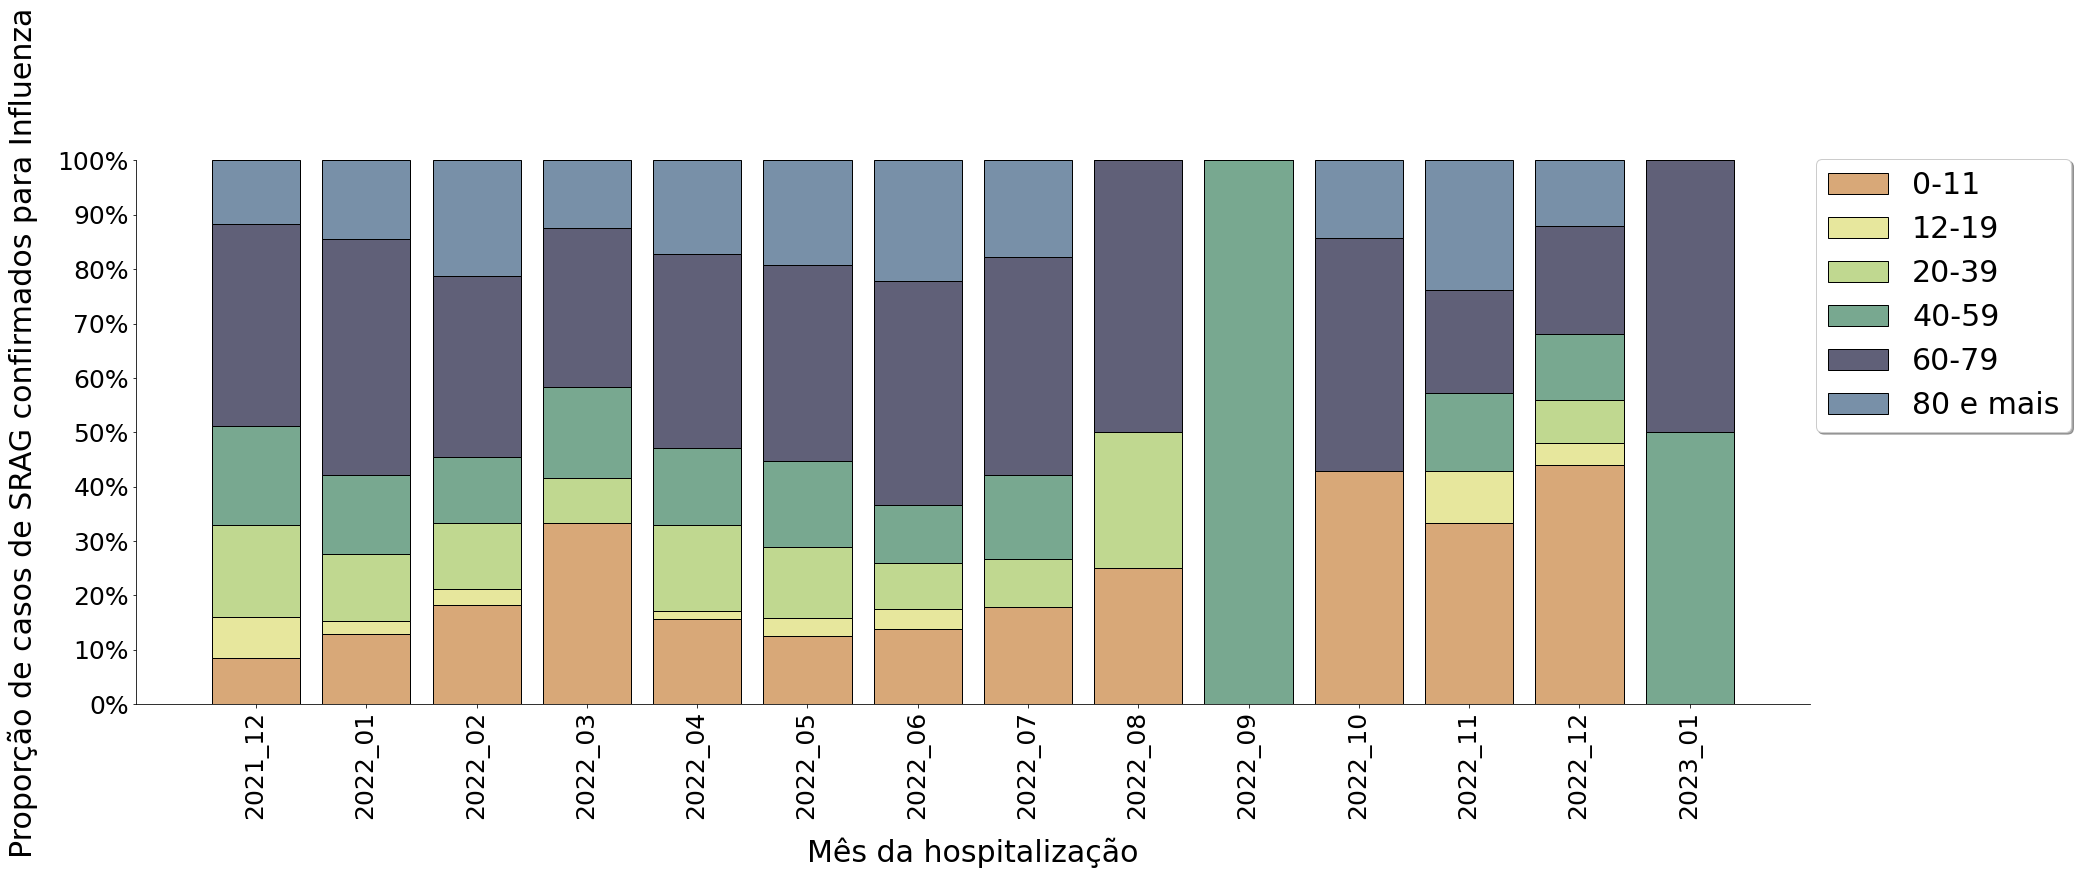

In [174]:
plt.figure(figsize=(30,10))
plt.bar(competencia_proporcaoHosp_influ,idade11, color='#d8a878',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_influ,idade19, bottom=idade11, color="#e7e79d",edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_influ,idade39, bottom=idade11 + idade19, color='#c0d890',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_influ,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#78a890',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_influ,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#606078',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_influ,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#7890a8',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para Influenza',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_proporcaoHosp_influ,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/prporcaoHosp_Influ.jpeg',dpi=720,bbox_inches='tight')

# Inicio Grafico proporcaoHosp_VSR

In [254]:
filtro_proporcaoHosp_VSR = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_proporcaoHosp_VSR['Idade'] = filtro_proporcaoHosp_VSR['Idade'].fillna(0)
filtro_proporcaoHosp_VSR

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\1043853248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoHosp_VSR['Idade'] = filtro_proporcaoHosp_VSR['Idade'].fillna(0)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,Sim,SRAG não especificado,0-9 anos,0.0,NaN,NaN,NaN,NaN
1,2020_01,Sim,SRAG não especificado,0-9 anos,0.0,NaN,NaN,NaN,NaN
2,2020_01,Sim,SRAG não especificado,10-19 anos,11.0,NaN,NaN,NaN,NaN
3,2020_01,Sim,SRAG não especificado,60 anos ou mais,75.0,NaN,NaN,NaN,NaN
4,2020_01,Sim,SRAG não especificado,0-9 anos,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
187544,2023_01,Sim,SRAG não especificado,60 anos ou mais,68.0,NaN,NaN,NaN,NaN
187545,2022_12,Sim,COVID-19,60 anos ou mais,71.0,NaN,NaN,NaN,NaN
187546,2022_12,Sim,COVID-19,20-59 anos,42.0,NaN,NaN,NaN,NaN
187547,2020_07,Sim,SRAG não especificado,60 anos ou mais,85.0,NaN,NaN,NaN,NaN


In [255]:
filtro_proporcaoHosp_VSR['Idade'] = filtro_proporcaoHosp_VSR['Idade'].astype(int)
filtro_proporcaoHosp_VSR.head()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\2697746298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoHosp_VSR['Idade'] = filtro_proporcaoHosp_VSR['Idade'].astype(int)


,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,Sim,SRAG não especificado,0-9 anos,0,NaN,NaN,NaN,NaN
1,2020_01,Sim,SRAG não especificado,0-9 anos,0,NaN,NaN,NaN,NaN
2,2020_01,Sim,SRAG não especificado,10-19 anos,11,NaN,NaN,NaN,NaN
3,2020_01,Sim,SRAG não especificado,60 anos ou mais,75,NaN,NaN,NaN,NaN
4,2020_01,Sim,SRAG não especificado,0-9 anos,4,NaN,NaN,NaN,NaN


In [256]:
for index, idade in filtro_proporcaoHosp_VSR.iterrows():
    if idade['Idade'] < 12:
        filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\3620962399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoHosp_VSR.loc[index,'Idade'] = '0-11 anos'


In [257]:
filtro_proporcaoHosp_VSR = filtro_proporcaoHosp_VSR.loc[filtro_proporcaoHosp_VSR['pcr_vsr']==1]
filtro_proporcaoHosp_VSR = filtro_proporcaoHosp_VSR.loc[filtro_proporcaoHosp_VSR['Houve internacao']=='Sim']
filtro_proporcaoHosp_VSR = filtro_proporcaoHosp_VSR.loc[filtro_proporcaoHosp_VSR['Classificacao final']=='SRAG por outro vírus resp']
filtro_proporcaoHosp_VSR

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
370,2020_03,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,NaN,NaN,NaN,1.0
972,2020_04,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,NaN,NaN,NaN,1.0
1309,2020_05,Sim,SRAG por outro vírus resp,60 anos ou mais,60-79 anos,NaN,NaN,NaN,1.0
14795,2021_01,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
14848,2021_01,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
187475,2022_07,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
187481,2022_06,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
187482,2022_06,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,Nao,NaN,NaN,1.0
187485,2022_06,Sim,SRAG por outro vírus resp,0-9 anos,0-11 anos,NaN,NaN,NaN,1.0


In [258]:
totalHospitalizacoes = filtro_proporcaoHosp_VSR.groupby('Competencia Internacao').count()
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Internacao,,,,,,,,
2020_03,1,1,1,1,0,0,0,1
2020_04,1,1,1,1,0,0,0,1
2020_05,1,1,1,1,0,0,0,1
2020_07,1,1,1,1,0,0,0,1
2021_01,5,5,5,5,5,0,0,5


In [259]:
separaIdade = filtro_proporcaoHosp_VSR.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_03                                1                    1   
          2020_04                                1                    1   
          2021_01                                4                    4   
          2021_02                                3                    3   
          2021_03                               37                   37   

                                  Faixa Etaria  pos_pcrflu  tp_flu_pcr  \
Idade     Competencia Internacao                                         
0-11 anos 2020_03                            1           0           0   
          2020_04                            1           0           0   
          2021_01                            4           4           0   
          2021_02                            3           2           0   
          2021_03                           37          36           0   

                                  pcr_fluasu  pcr_vsr  
Idade     Competencia Internacao                       
0-11 anos 2020_03                          0        1  
          2020_04                          0        1  
          2021_01                          0        4  
          2021_02                          0        3  
          2021_03                          0       37

In [261]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade11= idade11.fillna(0)
idade11 = idade11.drop('2020_03')
idade11 = idade11['2021_01':]
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Internacao
2022_06    85.306122
2022_07    91.566265
2022_08    90.434783
2022_09    97.560976
2022_10    88.235294
2022_11    96.000000
2022_12    98.484848
2023_01    80.000000
Name: Proporcao, dtype: float64

In [262]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19= idade19.fillna(0)
idade19 = idade19.drop('2020_03')
idade19 = idade19['2021_01':]
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Internacao
2022_06    0.0
2022_07    0.0
2022_08    0.0
2022_09    0.0
2022_10    0.0
2022_11    0.0
2022_12    0.0
2023_01    0.0
Name: Proporcao, dtype: float64

In [263]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop(['2020_03'])
idade39= idade39.fillna(0)
idade39 = idade39['2021_01':]
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Internacao
2022_06    0.816327
2022_07    0.803213
2022_08    2.608696
2022_09    0.000000
2022_10    0.000000
2022_11    0.000000
2022_12    0.000000
2023_01    0.000000
Name: Proporcao, dtype: float64

In [264]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(['2020_03'])
idade59= idade59.fillna(0)
idade59 = idade59['2021_01':]
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Internacao
2022_06    3.673469
2022_07    2.409639
2022_08    1.739130
2022_09    0.000000
2022_10    2.941176
2022_11    0.000000
2022_12    0.000000
2023_01    0.000000
Name: Proporcao, dtype: float64

In [265]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade79= idade79.fillna(0)
idade79 = idade79.drop('2020_03')
idade79 = idade79['2021_01':]
idade79 = idade79['Proporcao']
idade79.head(8)

Competencia Internacao
2021_01    20.000000
2021_02    25.000000
2021_03     2.439024
2021_04     7.042254
2021_05     5.759162
2021_06     4.494382
2021_07    11.602210
2021_08    10.294118
Name: Proporcao, dtype: float64

In [266]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade80= idade80.fillna(0)
idade80 = idade80.drop('2020_03')
idade80 = idade80['2021_01':]
idade80 = idade80['Proporcao']
idade80.head(8)

Competencia Internacao
2021_01    0.000000
2021_02    0.000000
2021_03    4.878049
2021_04    4.225352
2021_05    3.141361
2021_06    1.685393
2021_07    3.867403
2021_08    8.088235
Name: Proporcao, dtype: float64

In [267]:
competencia_proporcaoHosp_VSR = idade80.to_frame()
competencia_proporcaoHosp_VSR = competencia_proporcaoHosp_VSR.reset_index()
competencia_proporcaoHosp_VSR = competencia_proporcaoHosp_VSR['Competencia Internacao']
competencia_proporcaoHosp_VSR.tail()

20    2022_09
21    2022_10
22    2022_11
23    2022_12
24    2023_01
Name: Competencia Internacao, dtype: object

In [268]:
legenda_proporcaoHosp_VSR = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

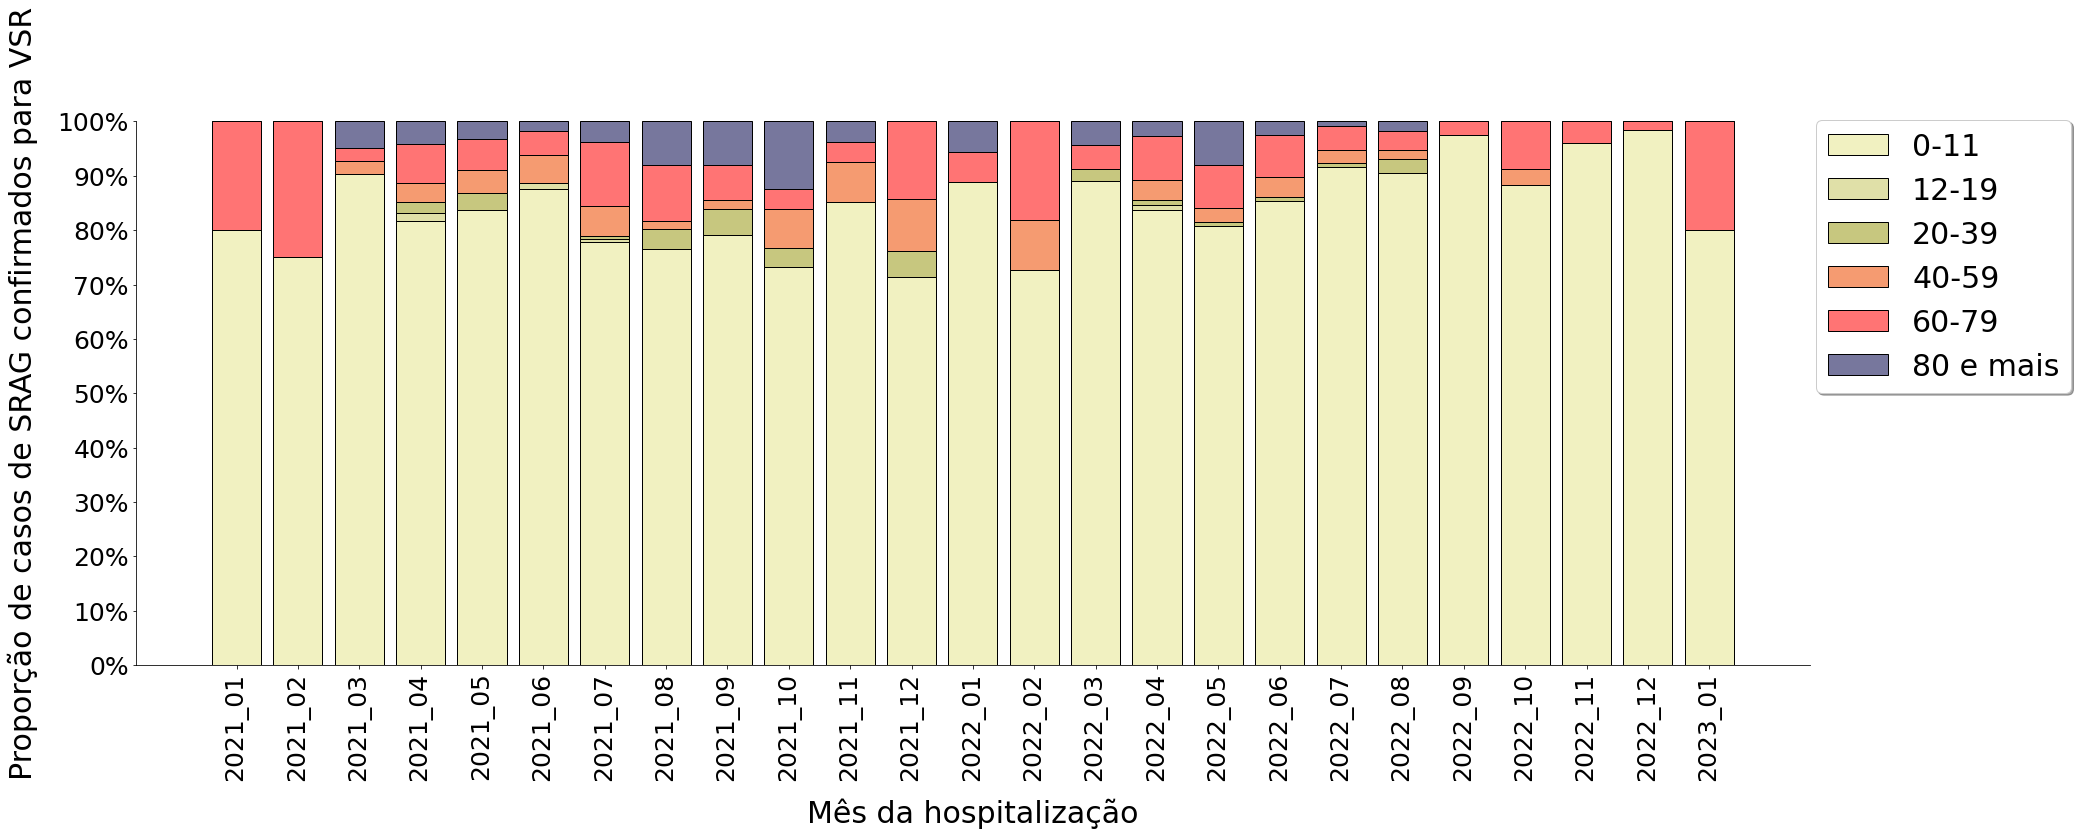

In [269]:
plt.figure(figsize=(30,10))
plt.bar(competencia_proporcaoHosp_VSR,idade11, color='#f1f1c1',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_VSR,idade19, bottom=idade11, color="#e0e0a8",edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_VSR,idade39, bottom=idade11 + idade19, color='#c7c77f',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_VSR,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#f59b71',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_VSR,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#ff7474',edgecolor='#000000')
plt.bar(competencia_proporcaoHosp_VSR,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#77779d',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para VSR',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_proporcaoHosp_VSR,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/proporcaoHosp_VSR.jpeg',dpi=720,bbox_inches='tight')

# Inicio Grafico proporcaoObito_Influ

In [190]:
filtro_proporcaoObito_Influ = dados[['Competencia Evolucao','Classificacao final','Evolucao','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_proporcaoObito_Influ

,Competencia Evolucao,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,SRAG não especificado,Cura,0.0,NaN,NaN,NaN,NaN
1,2020_01,SRAG não especificado,Cura,0.0,NaN,NaN,NaN,NaN
2,2020_01,SRAG não especificado,Cura,11.0,NaN,NaN,NaN,NaN
3,2020_01,SRAG não especificado,Óbito,75.0,NaN,NaN,NaN,NaN
4,2020_01,SRAG não especificado,Cura,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
187544,NaN,SRAG não especificado,Segue Internado,68.0,NaN,NaN,NaN,NaN
187545,2022_12,COVID-19,Cura,71.0,NaN,NaN,NaN,NaN
187546,2022_12,COVID-19,Cura,42.0,NaN,NaN,NaN,NaN
187547,2020_07,SRAG não especificado,Cura,85.0,NaN,NaN,NaN,NaN


In [191]:
base_proporcaoObito_influ = filtro_proporcaoObito_Influ.groupby('Competencia Evolucao').count()
base.tail()

""
Competencia Evolucao
2022_09
2022_10
2022_11
2022_12
2023_01


In [192]:
for index, idade in filtro_proporcaoObito_Influ.iterrows():
    if idade['Idade'] < 12:
        filtro_proporcaoObito_Influ.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro_proporcaoObito_Influ.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro_proporcaoObito_Influ.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro_proporcaoObito_Influ.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro_proporcaoObito_Influ.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro_proporcaoObito_Influ.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\3544489397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoObito_Influ.loc[index,'Idade'] = '0-11 anos'


In [193]:
filtro_proporcaoObito_Influ = filtro_proporcaoObito_Influ.loc[filtro_proporcaoObito_Influ['pos_pcrflu']=='Sim']
filtro_proporcaoObito_Influ = filtro_proporcaoObito_Influ.loc[filtro_proporcaoObito_Influ['Evolucao']=='Óbito']
filtro_proporcaoObito_Influ

,Competencia Evolucao,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
16005,2021_03,COVID-19,Óbito,60-79 anos,Sim,NaN,NaN,NaN
32452,2022_01,SRAG por influenza,Óbito,80 e mais,Sim,Influenza A,Influenza A(H3N2),NaN
32720,2022_01,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza A,Influenza nao subtipado,NaN
32727,2022_01,SRAG por influenza,Óbito,80 e mais,Sim,Influenza A,Influenza A(H3N2),NaN
32745,2022_01,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza A,Influenza nao subtipado,NaN
...,...,...,...,...,...,...,...,...
175224,2023_01,COVID-19,Óbito,60-79 anos,Sim,Influenza A,Influenza A(H1N1)pdm09,NaN
179154,2022_08,SRAG por influenza,Óbito,80 e mais,Sim,Influenza A,Influenza A(H3N2),NaN
184921,2022_06,COVID-19,Óbito,60-79 anos,Sim,Influenza A,Influenza A(H3N2),NaN
187395,2022_03,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza A,Influenza A(H3N2),NaN


In [194]:
total_obitos = filtro_proporcaoObito_Influ.groupby('Competencia Evolucao').count()
total_obitos.head()

,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Evolucao,,,,,,,
2020_01,1,1,1,1,1,0,0
2020_03,1,1,1,1,1,1,0
2021_03,1,1,1,1,0,0,0
2021_12,3,3,3,3,3,3,0
2022_01,38,38,38,38,38,38,0


In [195]:
separaIdade = filtro_proporcaoObito_Influ.groupby(['Idade','Competencia Evolucao']).count()
separaIdade.head()

Classificacao final  Evolucao  pos_pcrflu  \
Idade      Competencia Evolucao                                              
0-11 anos  2020_01                                 1         1           1   
           2022_05                                 2         2           2   
           2022_06                                 1         1           1   
           2022_12                                 1         1           1   
20-39 anos 2022_01                                 2         2           2   

                                 tp_flu_pcr  pcr_fluasu  pcr_vsr  
Idade      Competencia Evolucao                                   
0-11 anos  2020_01                        1           0        0  
           2022_05                        2           2        0  
           2022_06                        1           1        0  
           2022_12                        1           1        0  
20-39 anos 2022_01                        2           2        0

In [196]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(base_proporcaoObito_influ,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['2021_12':]
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Evolucao
2022_06     3.571429
2022_07     0.000000
2022_08     0.000000
2022_09     0.000000
2022_10     0.000000
2022_11     0.000000
2022_12    20.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [197]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(base_proporcaoObito_influ,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['2021_12':]
idade19.loc['2022_10'] = 0 
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Evolucao
2022_06    0.0
2022_07    0.0
2022_08    0.0
2022_09    0.0
2022_10    0.0
2022_11    0.0
2022_12    0.0
2023_01    0.0
Name: Proporcao, dtype: float64

In [198]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(base_proporcaoObito_influ,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['2021_12':]
idade39.loc['2022_10'] = 0 
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Evolucao
2022_06    3.571429
2022_07    5.555556
2022_08    0.000000
2022_09    0.000000
2022_10    0.000000
2022_11    0.000000
2022_12    0.000000
2023_01    0.000000
Name: Proporcao, dtype: float64

In [199]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(base_proporcaoObito_influ,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['2021_12':]
idade59.loc['2022_10'] = 0 
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Evolucao
2022_06    10.714286
2022_07    11.111111
2022_08     0.000000
2022_09     0.000000
2022_10     0.000000
2022_11    50.000000
2022_12    20.000000
2023_01    50.000000
Name: Proporcao, dtype: float64

In [200]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(base_proporcaoObito_influ,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79['2021_12':]
idade79.loc['2022_10'] = 0 
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Evolucao
2022_06     39.285714
2022_07     44.444444
2022_08     66.666667
2022_09    100.000000
2022_10      0.000000
2022_11     50.000000
2022_12     20.000000
2023_01     50.000000
Name: Proporcao, dtype: float64

In [201]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(base_proporcaoObito_influ,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80['2021_12':]
idade80.loc['2022_10'] = 0 
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Evolucao
2022_06    42.857143
2022_07    38.888889
2022_08    33.333333
2022_09     0.000000
2022_10     0.000000
2022_11     0.000000
2022_12    40.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [202]:
eixo_x_proporcaoObito_Influ = idade80.to_frame()
eixo_x_proporcaoObito_Influ = eixo_x_proporcaoObito_Influ.reset_index()
eixo_x_proporcaoObito_Influ = eixo_x_proporcaoObito_Influ['Competencia Evolucao']
eixo_x_proporcaoObito_Influ

0     2021_12
1     2022_01
2     2022_02
3     2022_03
4     2022_04
5     2022_05
6     2022_06
7     2022_07
8     2022_08
9     2022_09
10    2022_10
11    2022_11
12    2022_12
13    2023_01
Name: Competencia Evolucao, dtype: object

In [203]:
legenda_proporcaoObito_Influ = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

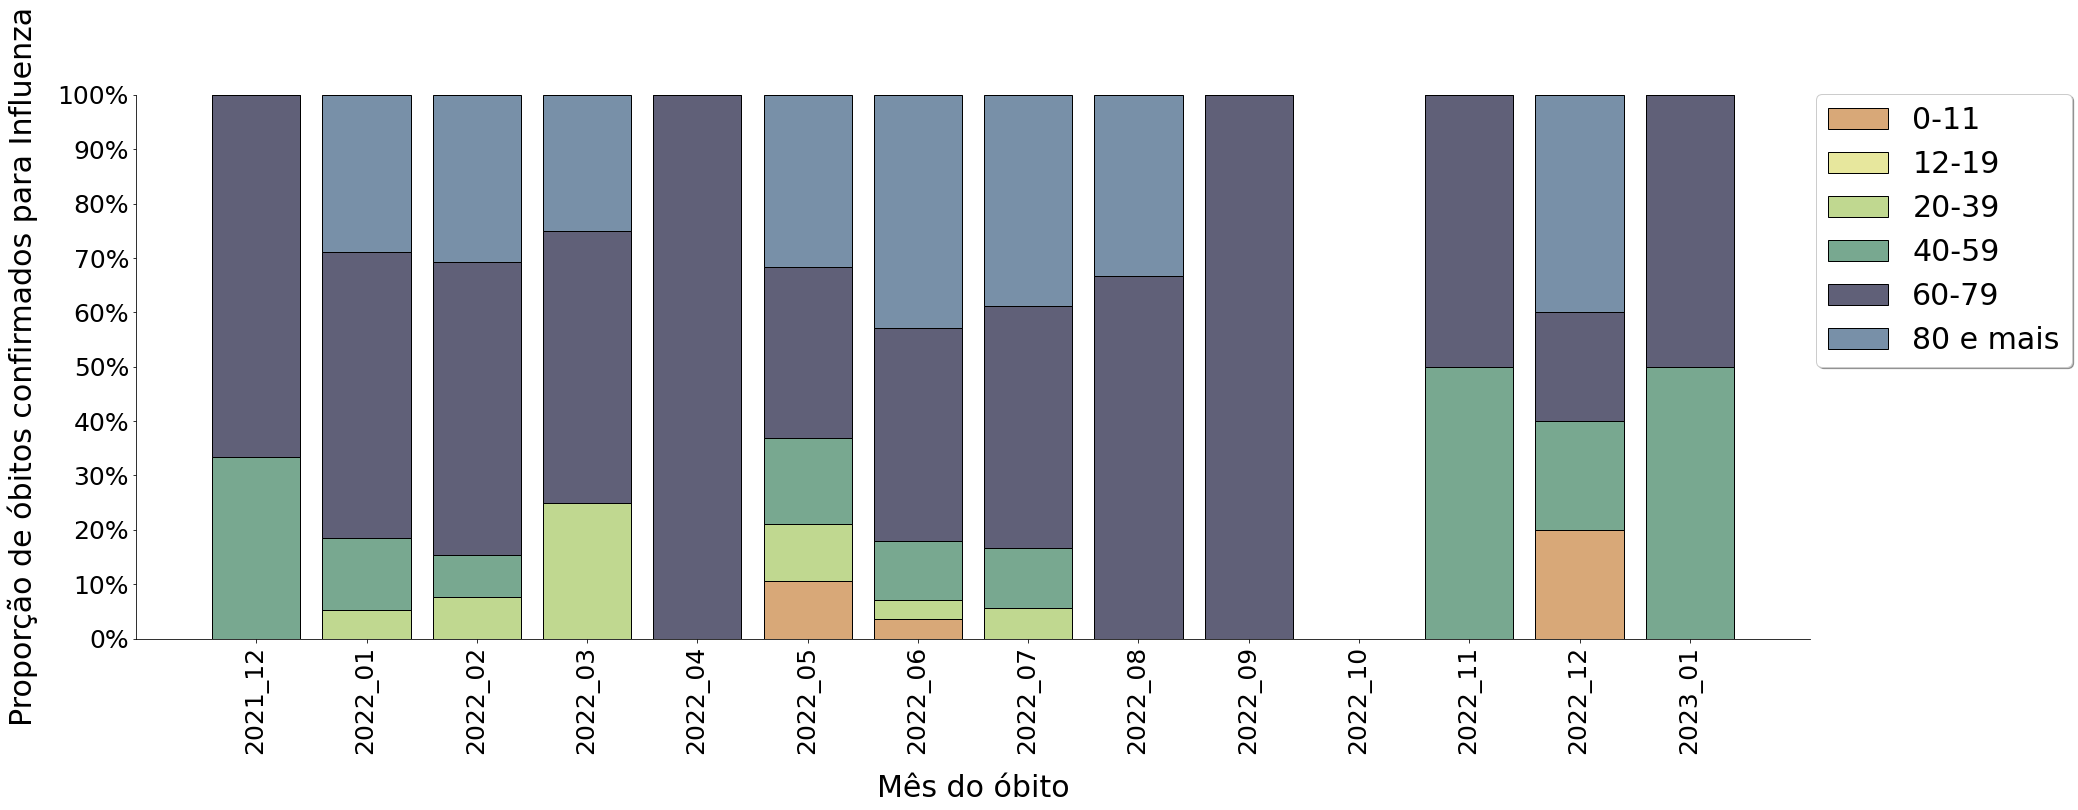

In [204]:
plt.figure(figsize=(30,10))
plt.bar(eixo_x_proporcaoObito_Influ,idade11, color='#d8a878',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_Influ,idade19, bottom=idade11, color="#e7e79d",edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_Influ,idade39, bottom=idade11 + idade19, color='#c0d890',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_Influ,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#78a890',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_Influ,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#606078',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_Influ,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#7890a8',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Influenza',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_proporcaoObito_Influ,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/proporcaoObito_Influ.png',dpi=720,bbox_inches='tight')

# Inicio Grafico proporcaoObito_VSR

In [278]:
filtro_proporcaoObito_VSR = dados[['Competencia Evolucao','Classificacao final','Evolucao','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro_proporcaoObito_VSR

,Competencia Evolucao,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_01,SRAG não especificado,Cura,0.0,NaN,NaN,NaN,NaN
1,2020_01,SRAG não especificado,Cura,0.0,NaN,NaN,NaN,NaN
2,2020_01,SRAG não especificado,Cura,11.0,NaN,NaN,NaN,NaN
3,2020_01,SRAG não especificado,Óbito,75.0,NaN,NaN,NaN,NaN
4,2020_01,SRAG não especificado,Cura,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
187544,NaN,SRAG não especificado,Segue Internado,68.0,NaN,NaN,NaN,NaN
187545,2022_12,COVID-19,Cura,71.0,NaN,NaN,NaN,NaN
187546,2022_12,COVID-19,Cura,42.0,NaN,NaN,NaN,NaN
187547,2020_07,SRAG não especificado,Cura,85.0,NaN,NaN,NaN,NaN


In [279]:
base_proporcaoObito_VSR = filtro_proporcaoObito_VSR.groupby('Competencia Evolucao').count()
base_proporcaoObito_VSR.tail()

,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Evolucao,,,,,,,
2022_09,1304,1304,1304,296,3,3,65
2022_10,877,877,877,134,8,8,33
2022_11,884,884,884,178,9,9,41
2022_12,1780,1780,1780,534,32,31,75
2023_01,503,503,503,165,4,3,15


In [280]:
for index, idade in filtro_proporcaoObito_VSR.iterrows():
    if idade['Idade'] < 12:
        filtro_proporcaoObito_VSR.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro_proporcaoObito_VSR.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro_proporcaoObito_VSR.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro_proporcaoObito_VSR.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro_proporcaoObito_VSR.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro_proporcaoObito_VSR.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\897869789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_proporcaoObito_VSR.loc[index,'Idade'] = '0-11 anos'


In [281]:
filtro_proporcaoObito_VSR = filtro_proporcaoObito_VSR.loc[filtro_proporcaoObito_VSR['pcr_vsr']==1]
filtro_proporcaoObito_VSR = filtro_proporcaoObito_VSR.loc[filtro_proporcaoObito_VSR['Evolucao']=='Óbito']
filtro_proporcaoObito_VSR = filtro_proporcaoObito_VSR.loc[filtro_proporcaoObito_VSR['Classificacao final']=='SRAG por outro vírus resp']
filtro_proporcaoObito_VSR

,Competencia Evolucao,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
22432,2021_04,SRAG por outro vírus resp,Óbito,80 e mais,NaN,NaN,NaN,1.0
23667,2021_04,SRAG por outro vírus resp,Óbito,40-59 anos,NaN,NaN,NaN,1.0
24261,2021_05,SRAG por outro vírus resp,Óbito,80 e mais,Nao,NaN,NaN,1.0
25408,2021_06,SRAG por outro vírus resp,Óbito,80 e mais,NaN,NaN,NaN,1.0
25887,2021_05,SRAG por outro vírus resp,Óbito,40-59 anos,Nao,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
177213,2021_04,SRAG por outro vírus resp,Óbito,80 e mais,Nao,NaN,NaN,1.0
179112,2022_07,SRAG por outro vírus resp,Óbito,60-79 anos,Nao,NaN,NaN,1.0
182553,2021_04,SRAG por outro vírus resp,Óbito,80 e mais,Nao,NaN,NaN,1.0
185105,2022_07,SRAG por outro vírus resp,Óbito,60-79 anos,NaN,NaN,NaN,1.0


In [282]:
total_obitos = filtro_proporcaoObito_VSR.groupby('Competencia Evolucao').count()
total_obitos.head()

,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Evolucao,,,,,,,
2021_04,8,8,8,5,0,0,8
2021_05,4,4,4,3,0,0,4
2021_06,3,3,3,0,0,0,3
2021_07,5,5,5,0,0,0,5
2021_08,11,11,11,4,0,0,11


In [283]:
separaIdade_proporcaoObito_VSR = filtro_proporcaoObito_VSR.groupby(['Idade','Competencia Evolucao']).count()
separaIdade_proporcaoObito_VSR.head()

Classificacao final  Evolucao  pos_pcrflu  \
Idade     Competencia Evolucao                                              
0-11 anos 2021_06                                 1         1           0   
          2021_08                                 2         2           2   
          2021_10                                 1         1           1   
          2021_11                                 1         1           0   
          2022_04                                 1         1           1   

                                tp_flu_pcr  pcr_fluasu  pcr_vsr  
Idade     Competencia Evolucao                                   
0-11 anos 2021_06                        0           0        1  
          2021_08                        0           0        2  
          2021_10                        0           0        1  
          2021_11                        0           0        1  
          2022_04                        0           0        1

In [284]:
idade11 = separaIdade_proporcaoObito_VSR.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(base_proporcaoObito_VSR,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['2021_04':]
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Evolucao
2022_06    20.000000
2022_07     0.000000
2022_08    28.571429
2022_09     0.000000
2022_10     0.000000
2022_11     0.000000
2022_12     0.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [285]:
idade19 = separaIdade_proporcaoObito_VSR.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(base_proporcaoObito_VSR,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['2021_04':]
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Evolucao
2022_06    0.0
2022_07    0.0
2022_08    0.0
2022_09    0.0
2022_10    0.0
2022_11    0.0
2022_12    0.0
2023_01    0.0
Name: Proporcao, dtype: float64

In [286]:
idade39 = separaIdade_proporcaoObito_VSR.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(base_proporcaoObito_VSR,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['2021_04':]
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Evolucao
2022_06     0.000000
2022_07     0.000000
2022_08    28.571429
2022_09     0.000000
2022_10     0.000000
2022_11     0.000000
2022_12     0.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [287]:
idade59 = separaIdade_proporcaoObito_VSR.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(base_proporcaoObito_VSR,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['2021_04':]
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Evolucao
2022_06     10.0
2022_07     20.0
2022_08      0.0
2022_09      0.0
2022_10    100.0
2022_11      0.0
2022_12      0.0
2023_01      0.0
Name: Proporcao, dtype: float64

In [288]:
idade79 = separaIdade_proporcaoObito_VSR.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(base_proporcaoObito_VSR,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79['2021_04':]
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Evolucao
2022_06     60.000000
2022_07     80.000000
2022_08     14.285714
2022_09      0.000000
2022_10      0.000000
2022_11    100.000000
2022_12      0.000000
2023_01      0.000000
Name: Proporcao, dtype: float64

In [289]:
idade80 = separaIdade_proporcaoObito_VSR.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(base_proporcaoObito_VSR,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80['2021_04':]
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Evolucao
2022_06    10.000000
2022_07     0.000000
2022_08    28.571429
2022_09     0.000000
2022_10     0.000000
2022_11     0.000000
2022_12     0.000000
2023_01     0.000000
Name: Proporcao, dtype: float64

In [290]:
eixo_x_proporcaoObito_VSR = idade80.to_frame()
eixo_x_proporcaoObito_VSR = eixo_x_proporcaoObito_VSR.reset_index()
eixo_x_proporcaoObito_VSR = eixo_x_proporcaoObito_VSR['Competencia Evolucao']
eixo_x_proporcaoObito_VSR.tail()

17    2022_09
18    2022_10
19    2022_11
20    2022_12
21    2023_01
Name: Competencia Evolucao, dtype: object

In [291]:
legenda_proporcaoObito_VSR = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

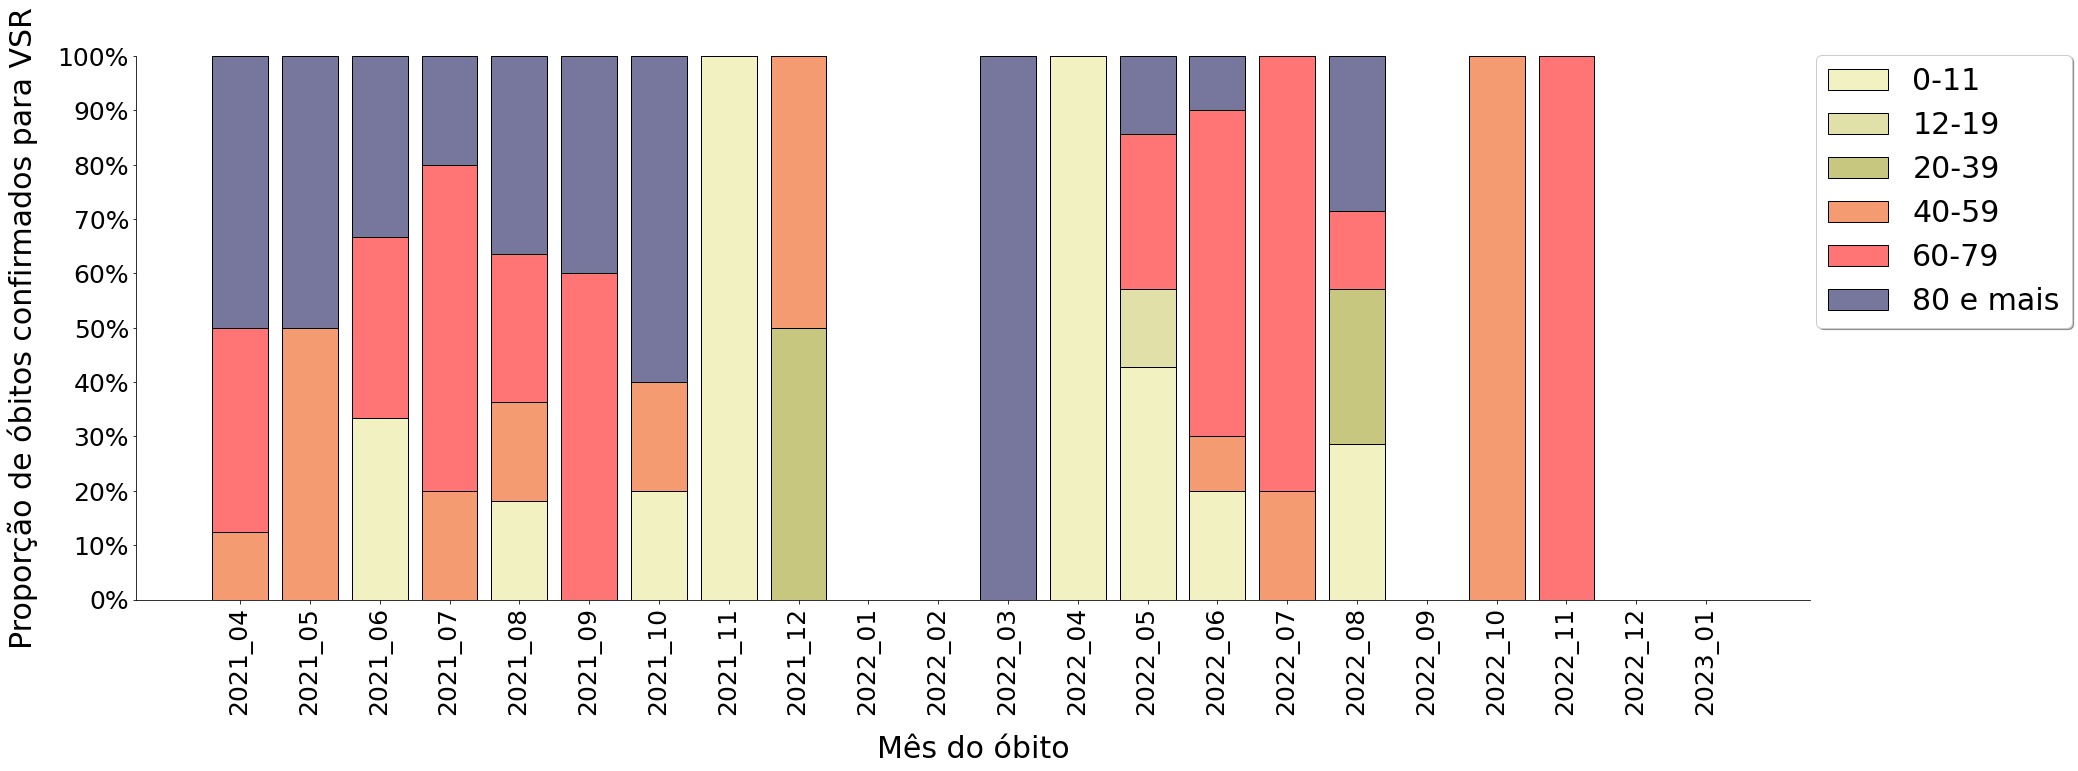

In [292]:
plt.figure(figsize=(30,10))
plt.bar(eixo_x_proporcaoObito_VSR,idade11, color='#f1f1c1',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_VSR,idade19, bottom=idade11, color="#e0e0a8",edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_VSR,idade39, bottom=idade11 + idade19, color='#c7c77f',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_VSR,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#f59b71',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_VSR,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#ff7474',edgecolor='#000000')
plt.bar(eixo_x_proporcaoObito_VSR,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#77779d',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para VSR',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda_proporcaoObito_VSR,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/proporcaoObito_VSR.png',dpi=720,bbox_inches='tight')

# Inicio Grafico mediaMovel_Covid

In [220]:
#dados_mediaMovel_Covid = pd.read_csv(f'{caminho}/{ultimo_arquivo}',sep=";")
dados_mediaMovel_Covid = pd.read_csv(r'C:/Users/ryan-rosa/Desktop/Ryan/Python/Codes19.09.2022/Banco_Painel/20230123.csv',sep=';')

In [221]:
filtrado_mediaMovel_Covid = dados_mediaMovel_Covid[['DATA_SINTOMAS','COD_IBGE']]
filtrado_mediaMovel_Covid['DATA_SINTOMAS'] = pd.to_datetime(filtrado_mediaMovel_Covid['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')
filtrado_mediaMovel_Covid = filtrado_mediaMovel_Covid.groupby('DATA_SINTOMAS').count()
filtrado_mediaMovel_Covid = filtrado_mediaMovel_Covid.sort_values(by=['DATA_SINTOMAS'])
filtrado_mediaMovel_Covid = filtrado_mediaMovel_Covid.reset_index()
filtrado_mediaMovel_Covid.tail()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_7412\3738156011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado_mediaMovel_Covid['DATA_SINTOMAS'] = pd.to_datetime(filtrado_mediaMovel_Covid['DATA_SINTOMAS'],infer_datetime_format=True,format='%d/%m/%Y')


,DATA_SINTOMAS,COD_IBGE
1057,2023-01-17,427
1058,2023-01-18,218
1059,2023-01-19,99
1060,2023-01-20,42
1061,2023-01-21,10


In [222]:
media_movel = filtrado_mediaMovel_Covid.set_index('DATA_SINTOMAS')
media_movel = media_movel.rolling(7).mean()
media_movel = media_movel.reset_index()
media_movel.head(20)

,DATA_SINTOMAS,COD_IBGE
0,2020-02-25,NaN
1,2020-02-26,NaN
2,2020-02-27,NaN
3,2020-02-28,NaN
4,2020-02-29,NaN
5,2020-03-01,NaN
6,2020-03-02,12.142857
7,2020-03-03,12.428571
8,2020-03-04,12.571429
9,2020-03-05,14.428571


In [223]:
semana_mediaMovel_Covi = filtrado_mediaMovel_Covid.iloc[6:]
semana_mediaMovel_Covi = semana_mediaMovel_Covi['DATA_SINTOMAS']
semana_mediaMovel_Covi = semana_mediaMovel_Covi.map(lambda x: str(x)[2:10])
semana_mediaMovel_Covi

6       20-03-02
7       20-03-03
8       20-03-04
9       20-03-05
10      20-03-06
          ...   
1057    23-01-17
1058    23-01-18
1059    23-01-19
1060    23-01-20
1061    23-01-21
Name: DATA_SINTOMAS, Length: 1056, dtype: object

In [224]:
casos_sintomas = media_movel.iloc[6:]
casos_sintomas = casos_sintomas['COD_IBGE']
casos_sintomas

6        12.142857
7        12.428571
8        12.571429
9        14.428571
10       15.000000
           ...    
1057    548.142857
1058    492.142857
1059    428.857143
1060    342.857143
1061    266.714286
Name: COD_IBGE, Length: 1056, dtype: float64

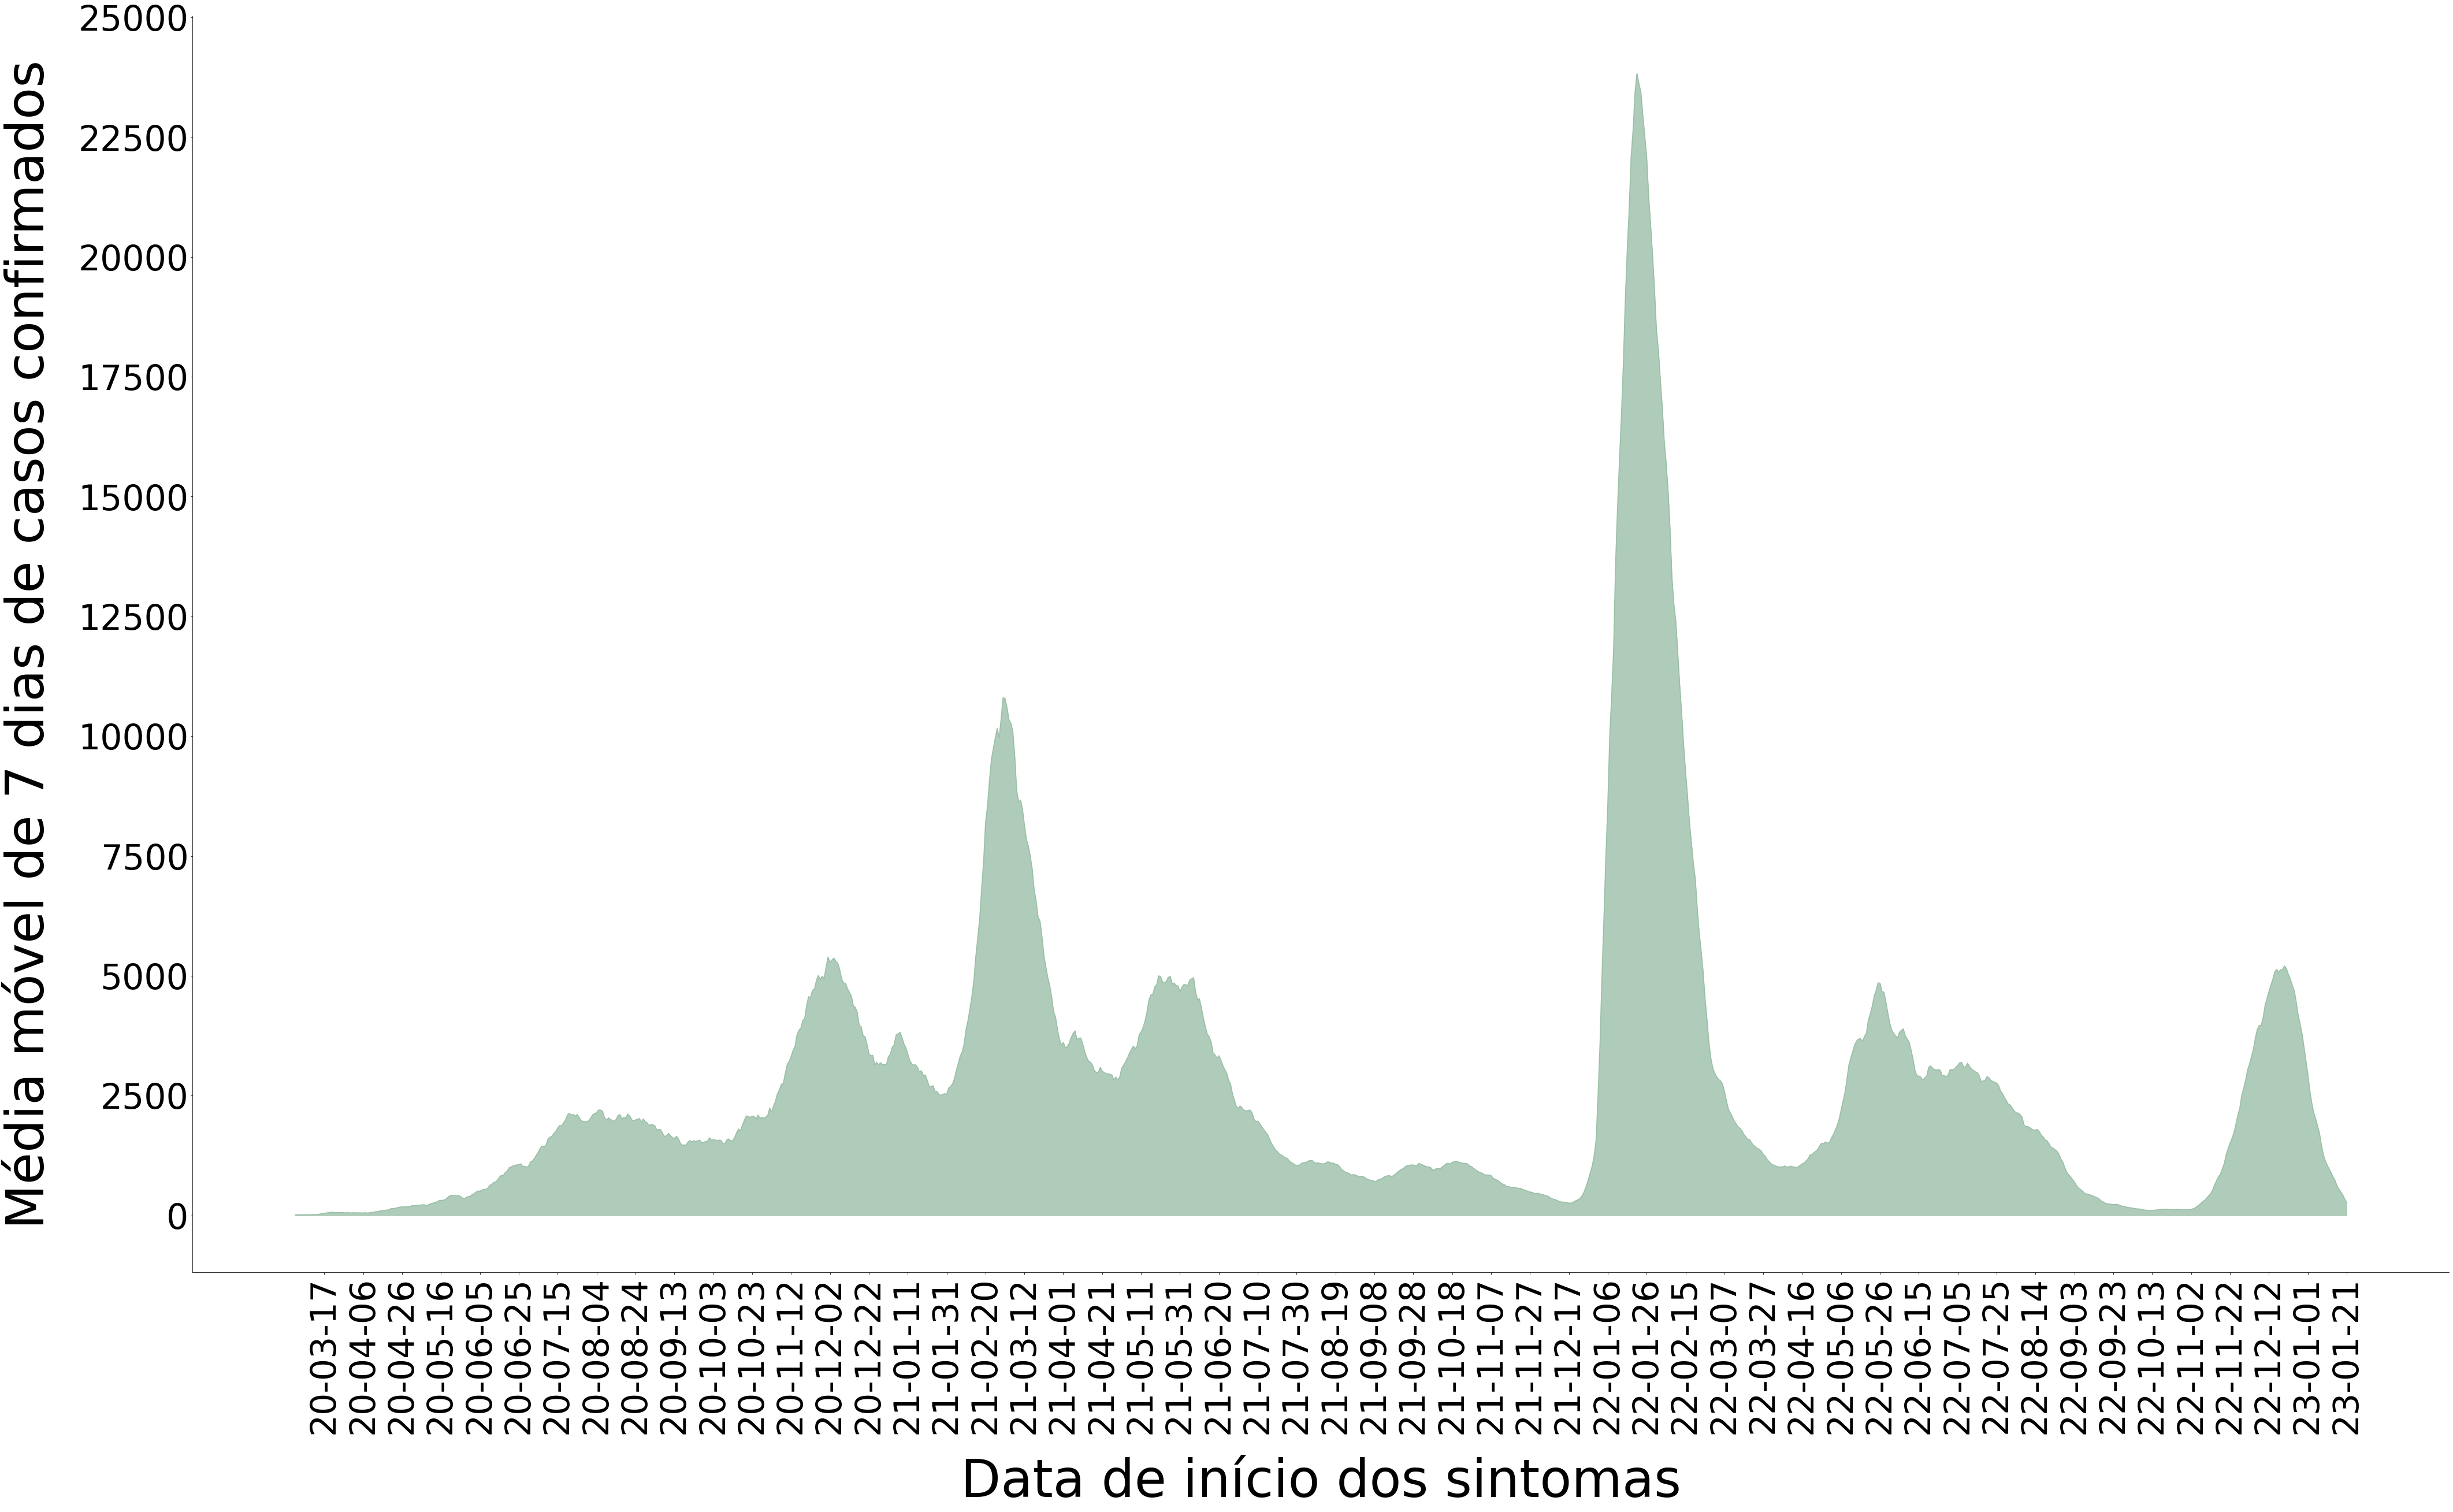

In [225]:
plt.figure(figsize=(70,40))
plt.plot(semana_mediaMovel_Covi,casos_sintomas,color='#9bbfa8')
plt.fill_between(semana_mediaMovel_Covi,casos_sintomas,alpha=0.8,where=(casos_sintomas>=0),color='#9bbfa8')
sns.despine()
plt.xlabel("Data de início dos sintomas",labelpad=40,fontsize=90)
plt.ylabel('Média móvel de 7 dias de casos confirmados',labelpad=40,fontsize=90)
plt.xticks(np.arange(15,np.size(semana_mediaMovel_Covi),20),fontsize=60,rotation=90)
plt.yticks(np.arange(0,27500,2500),fontsize=60)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/mediaMovel_Covid.png',dpi=300,bbox_inches='tight')

# Inicio Grafico casosSRAG_Hosp

In [226]:
#Filtrando a tabela apenas com as colunas de interece
filtrado_casosSRAG_Hosp = dados[['Sem Epi Internacao','Classificacao final','Evolucao']]

In [227]:
#Filtrando a coluna Classificacao final apenas com valores de COVID-19
covid19 = filtrado_casosSRAG_Hosp.loc[filtrado_casosSRAG_Hosp['Classificacao final']=='COVID-19']
covid19 = covid19.dropna()

In [228]:
#utilizando covid19 e agrupando pela semana de internacao
contacasos = covid19.groupby('Sem Epi Internacao').count()
contacasos.tail()

,Classificacao final,Evolucao
Sem Epi Internacao,,
2022_50,312,312
2022_51,338,338
2022_52,367,367
2023_01,103,103
2023_02,9,9


In [229]:
#Guardado em confirmado os valores da coluna 
confirmado = contacasos
confirmado = confirmado['Classificacao final']
confirmado

Sem Epi Internacao
2020_11      1
2020_12     19
2020_13    101
2020_14    111
2020_15     66
          ... 
2022_50    312
2022_51    338
2022_52    367
2023_01    103
2023_02      9
Name: Classificacao final, Length: 149, dtype: int64

In [230]:
#Filtrando os casos não informados
nao_informado = filtrado_casosSRAG_Hosp.loc[filtrado_casosSRAG_Hosp['Classificacao final']=='Não Informado'] #Valores da coluna Classificacao final apenas com valor Não Informado
nao_informado = nao_informado.dropna()
nao_informado = nao_informado.groupby('Sem Epi Internacao').count() #Agrupando pela semana de internacao
nao_informado = nao_informado.merge(contacasos, how =  'outer', left_index = True, right_index = True) #Juntando os dataframes nao_informado com o contacasos para ter o mesmo numero de linha com base na semana de internacao
nao_informado = nao_informado.fillna(0) #O que está com valor NaN recebe o valor 0
nao_informado = nao_informado['Classificacao final_x'] 
nao_informado

Sem Epi Internacao
2020_11     0.0
2020_12     0.0
2020_13     0.0
2020_14     0.0
2020_15     0.0
           ... 
2022_50    13.0
2022_51    20.0
2022_52    29.0
2023_01     5.0
2023_02     3.0
Name: Classificacao final_x, Length: 149, dtype: float64

In [231]:
#Filtrando os casos de SRAG
srag = filtrado_casosSRAG_Hosp.copy()
srag['Classificacao final'] = srag['Classificacao final'].map(lambda x: str(x)[0:4]) #Como tem SRAG... utilizamos isso para pegar apenas os 4 primeiros caracteres, no caso SRAG
srag = srag.loc[srag['Classificacao final']=='SRAG'] #Valores da coluna Classificacao final apenas com valores SRAG
srag = srag.groupby('Sem Epi Internacao').count() #Agrupa pela semana de internacao
srag = srag.drop(['2020_01','2020_02','2020_03','2020_04','2020_05','2020_06','2020_07',
        '2020_08','2020_09','2020_10']) #Dropando as semanas de internacao que nao sao de interesse
srag = srag.merge(contacasos,how='outer',left_index=True,right_index=True)
srag = srag.fillna(0)
srag = srag['Classificacao final_x']
srag

Sem Epi Internacao
2020_11     46
2020_12    134
2020_13    496
2020_14    493
2020_15    422
          ... 
2022_50    136
2022_51    102
2022_52    118
2023_01     39
2023_02      3
Name: Classificacao final_x, Length: 149, dtype: int64

In [232]:
#Criando o eixo x com os valores da semana_casosSRAG_Hosp de internacao
semana_casosSRAG_Hosp = covid19.sort_values('Sem Epi Internacao',ascending=True) #Coloca a coluna semana_casosSRAG_Hosp de internacao em ordem crescente de valores
semana_casosSRAG_Hosp = semana_casosSRAG_Hosp.groupby('Sem Epi Internacao').count()
semana_casosSRAG_Hosp = semana_casosSRAG_Hosp.reset_index() #Reseta o index
semana_casosSRAG_Hosp = semana_casosSRAG_Hosp['Sem Epi Internacao']
semana_casosSRAG_Hosp

0      2020_11
1      2020_12
2      2020_13
3      2020_14
4      2020_15
        ...   
144    2022_50
145    2022_51
146    2022_52
147    2023_01
148    2023_02
Name: Sem Epi Internacao, Length: 149, dtype: object

In [233]:
#Cria o eixo y de 0 a 6600 em intervalos de 700
eixoy_casosSRAG_Hosp = np.arange(0,7300,700)

In [234]:
#Pega o tamanho da variavel tamanho e faz com que o eixo x pule os valores de 2 em 2
tamanho_semana_casosSRAG_Hosp = np.size(semana_casosSRAG_Hosp)
eixo_x_casosSRAG_Hosp = np.arange(0,tamanho_semana_casosSRAG_Hosp,2)

In [235]:
#Cria a legenda para o grafico
legenda_casosSRAG_Hosp = pd.DataFrame(columns = ['Covid-19 confirmado','Covid-19 descartado','Em investigação'])

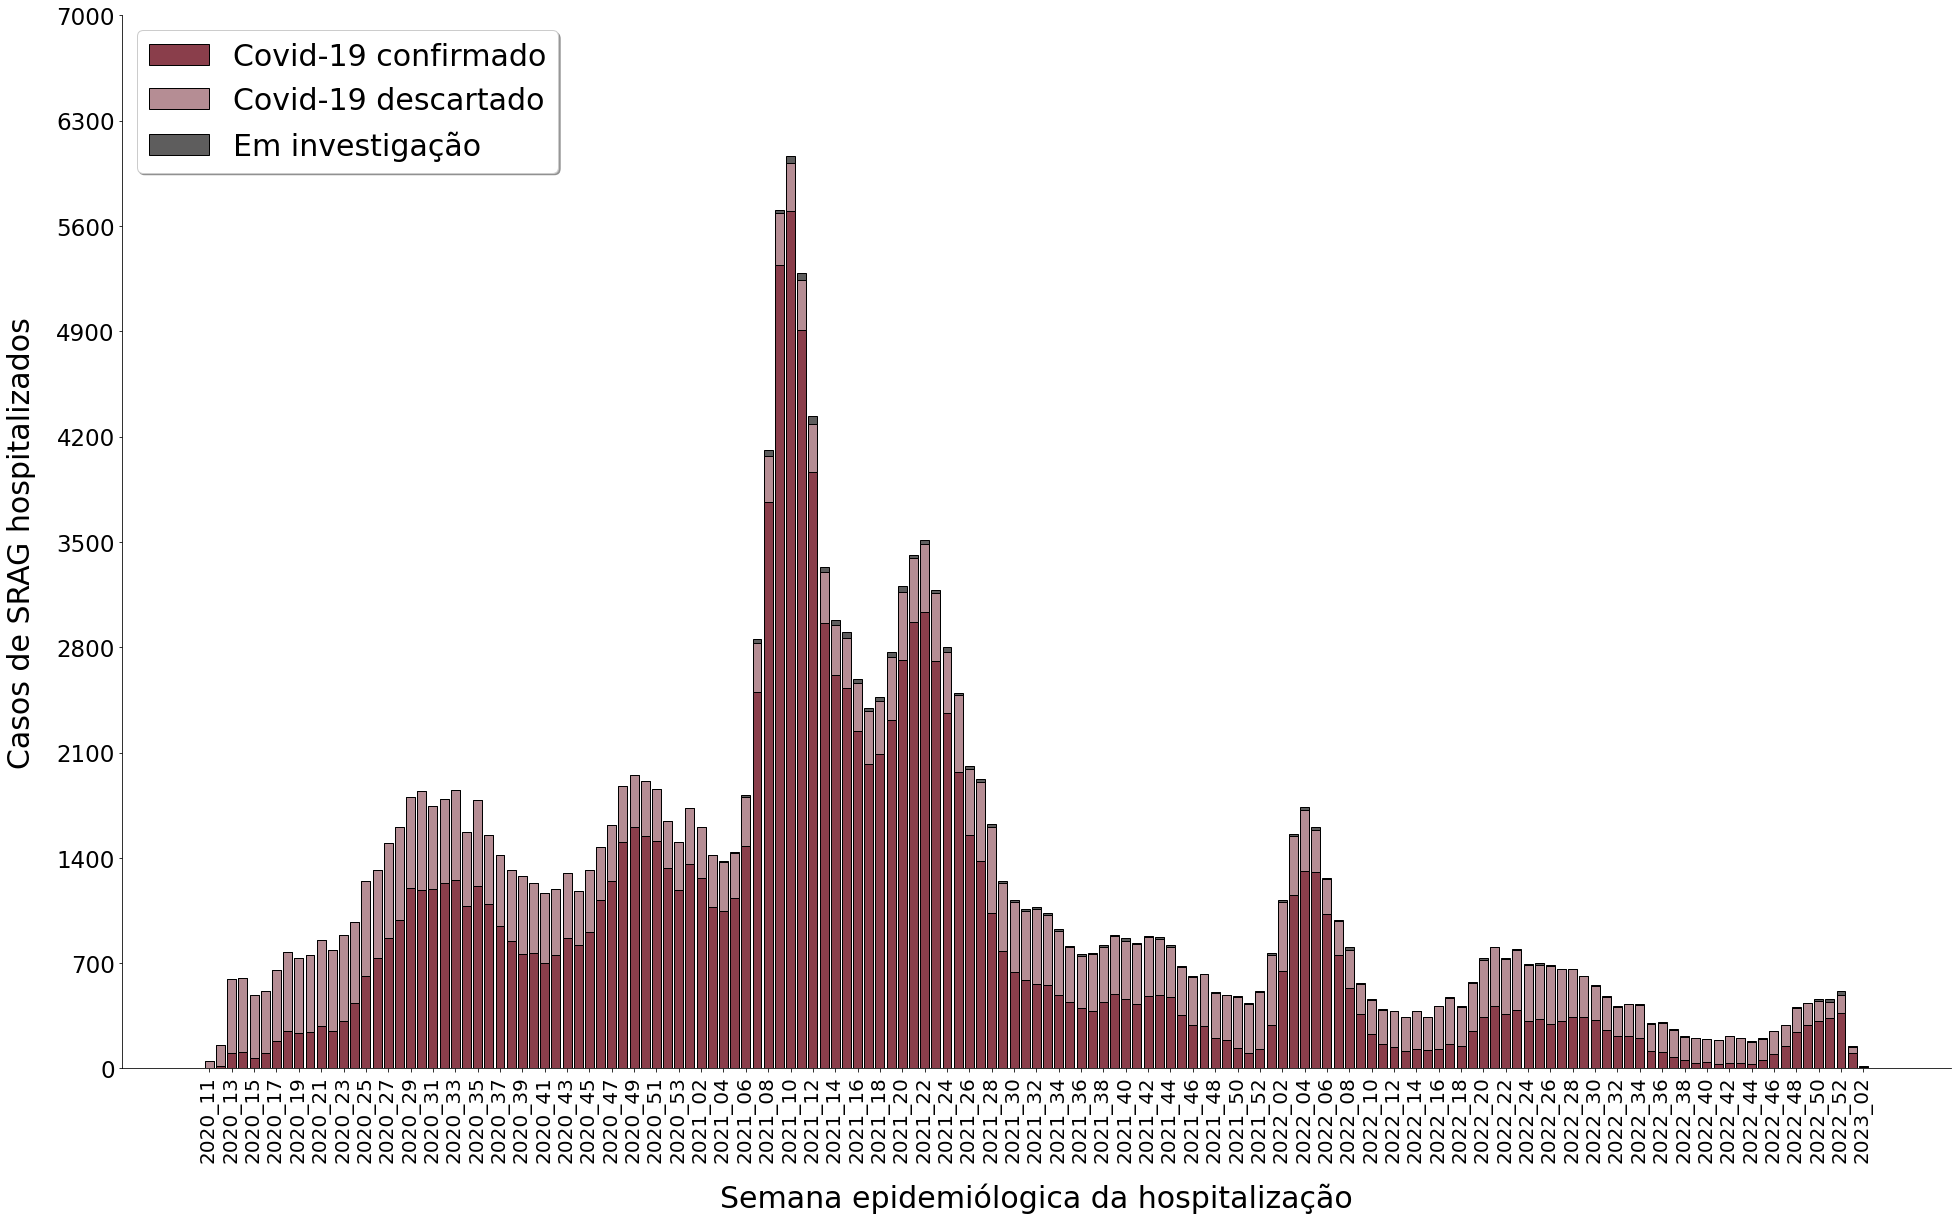

In [236]:
#Plotagem do grafico
plt.figure(figsize=(tamanho_semana_casosSRAG_Hosp*0.22,tamanho_semana_casosSRAG_Hosp*0.13))
plt.bar(semana_casosSRAG_Hosp,confirmado, color='#8a3e4b',edgecolor='#000000')
plt.bar(semana_casosSRAG_Hosp,srag, bottom=confirmado, color = '#b58d94',edgecolor='#000000')
plt.bar(semana_casosSRAG_Hosp,nao_informado, bottom = np.array(confirmado)+np.array(srag), color = '#5e5d5d',edgecolor='#000000')
sns.despine()
plt.legend(legenda_casosSRAG_Hosp, fontsize=30,shadow=True,loc='upper left')
#plt.annotate('Primeiro caso\nhospitalizado por\nCOVID-19 no RS',xy=(3,620),xytext=(2,1500),arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15,
#                bbox=dict(fc="white", ec="#000000", lw=1,pad=10))
plt.xticks(eixo_x_casosSRAG_Hosp)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(eixoy_casosSRAG_Hosp,fontsize=23)
plt.xlabel('Semana epidemiólogica da hospitalização',labelpad=20,fontsize=30)
plt.ylabel('Casos de SRAG hospitalizados',labelpad=20,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosSRAG_Hosp.png',dpi=720,bbox_inches='tight')

In [237]:
zoomConfirmado = confirmado.to_frame()
zoomConfirmado = zoomConfirmado['2022_01':]
zoomConfirmado = zoomConfirmado['Classificacao final']
zoomConfirmado

Sem Epi Internacao
2022_01     290
2022_02     649
2022_03    1154
2022_04    1315
2022_05    1304
2022_06    1028
2022_07     754
2022_08     534
2022_09     360
2022_10     227
2022_11     160
2022_12     144
2022_13     117
2022_14     128
2022_15     121
2022_16     126
2022_17     165
2022_18     148
2022_19     248
2022_20     344
2022_21     413
2022_22     365
2022_23     391
2022_24     313
2022_25     327
2022_26     296
2022_27     315
2022_28     340
2022_29     340
2022_30     319
2022_31     255
2022_32     215
2022_33     215
2022_34     203
2022_35     119
2022_36     110
2022_37      79
2022_38      54
2022_39      38
2022_40      46
2022_41      32
2022_42      34
2022_43      38
2022_44      31
2022_45      54
2022_46      97
2022_47     149
2022_48     244
2022_49     290
2022_50     312
2022_51     338
2022_52     367
2023_01     103
2023_02       9
Name: Classificacao final, dtype: int64

In [238]:
zoomSrag = srag.to_frame()
zoomSrag = zoomSrag['2022_01':]
zoomSrag = zoomSrag.reset_index()
zoomSrag = zoomSrag.set_index('Sem Epi Internacao')
zoomSrag = zoomSrag['Classificacao final_x']
zoomSrag.tail()

Sem Epi Internacao
2022_50    136
2022_51    102
2022_52    118
2023_01     39
2023_02      3
Name: Classificacao final_x, dtype: int64

In [239]:
zoomNaoInformado = nao_informado.to_frame()
zoomNaoInformado = zoomNaoInformado['2022_01':]
zoomNaoInformado = zoomNaoInformado.reset_index()

In [240]:
semana_casosSRAG_Hosp = zoomNaoInformado['Sem Epi Internacao']
semana_casosSRAG_Hosp.tail()

49    2022_50
50    2022_51
51    2022_52
52    2023_01
53    2023_02
Name: Sem Epi Internacao, dtype: object

In [241]:
zoomNaoInformado = zoomNaoInformado['Classificacao final_x']
zoomNaoInformado

0     16.0
1     11.0
2     12.0
3     18.0
4     16.0
5      8.0
6      9.0
7     17.0
8      6.0
9      7.0
10     7.0
11     2.0
12     2.0
13     1.0
14     3.0
15     0.0
16     4.0
17     3.0
18    10.0
19    11.0
20     4.0
21     7.0
22     4.0
23     6.0
24     9.0
25     6.0
26     3.0
27     1.0
28     3.0
29     3.0
30     5.0
31     5.0
32     3.0
33     6.0
34     6.0
35     1.0
36     3.0
37     6.0
38     5.0
39     5.0
40     3.0
41     3.0
42     2.0
43     3.0
44     3.0
45     0.0
46     2.0
47     7.0
48     2.0
49    13.0
50    20.0
51    29.0
52     5.0
53     3.0
Name: Classificacao final_x, dtype: float64

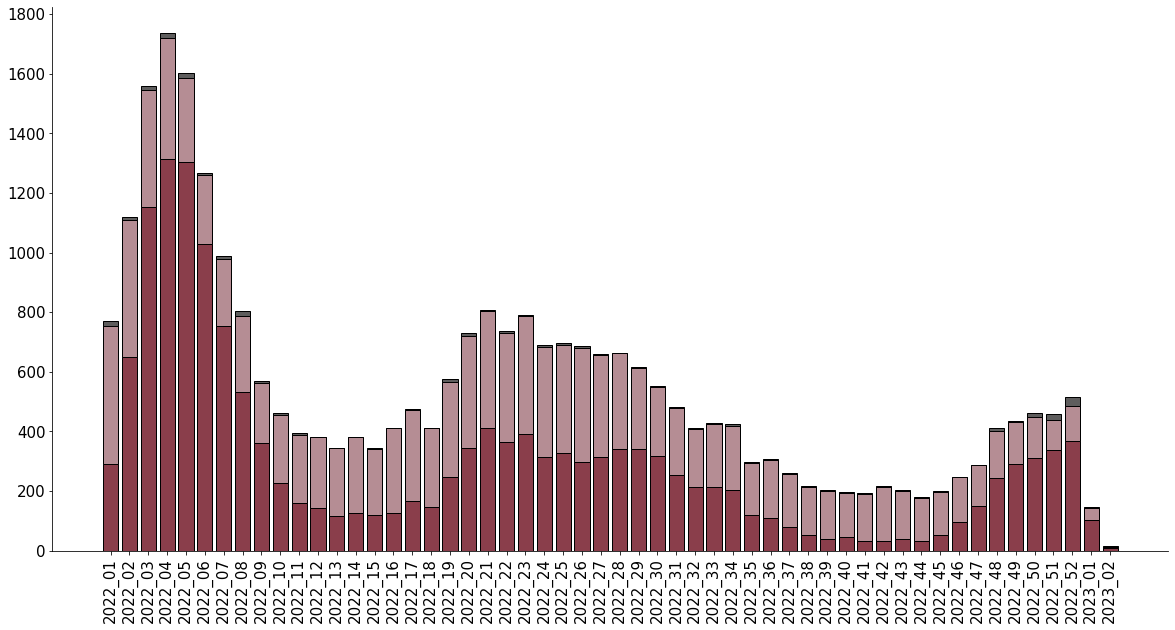

In [242]:
plt.figure(figsize=(20,10))
width=0.8
plt.bar(semana_casosSRAG_Hosp,zoomConfirmado,width,color='#8a3e4b',edgecolor='#000000')
plt.bar(semana_casosSRAG_Hosp,zoomSrag,width,bottom=zoomConfirmado,color = '#b58d94',edgecolor='#000000')
plt.bar(semana_casosSRAG_Hosp,zoomNaoInformado,width,bottom=zoomConfirmado+zoomSrag,color = '#5e5d5d',edgecolor='#000000')
sns.despine()
plt.xticks(fontsize=15,rotation=90)
plt.yticks(np.arange(0,2000,200),fontsize=15)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/casosSRAG_HospZoom.png',dpi=720,bbox_inches='tight')

# Inicio Grafico obitos_Covid

In [243]:
filtrado_obitos_Covid = dados[['Sem Epi Evolucao','Classificacao final','Evolucao']]
filtrado_obitos_Covid = filtrado_obitos_Covid.loc[filtrado_obitos_Covid['Classificacao final']=='COVID-19']
filtrado_obitos_Covid = filtrado_obitos_Covid.loc[filtrado_obitos_Covid['Evolucao']=='Óbito']
filtrado_obitos_Covid = filtrado_obitos_Covid.groupby('Sem Epi Evolucao').count()
filtrado_obitos_Covid = filtrado_obitos_Covid.reset_index()
filtrado_obitos_Covid

,Sem Epi Evolucao,Classificacao final,Evolucao
0,2020_13,3,3
1,2020_14,4,4
2,2020_15,10,10
3,2020_16,8,8
4,2020_17,12,12
...,...,...,...
143,2022_51,68,68
144,2022_52,80,80
145,2023_01,76,76
146,2023_02,47,47


In [244]:
semana_obitos_Covid = filtrado_obitos_Covid.set_index('Sem Epi Evolucao')
semana_obitos_Covid = semana_obitos_Covid.reset_index()
semana_obitos_Covid = semana_obitos_Covid['Sem Epi Evolucao']
semana_obitos_Covid

0      2020_13
1      2020_14
2      2020_15
3      2020_16
4      2020_17
        ...   
143    2022_51
144    2022_52
145    2023_01
146    2023_02
147    2023_03
Name: Sem Epi Evolucao, Length: 148, dtype: object

In [245]:
obito_obitos_Covid = filtrado_obitos_Covid.set_index('Sem Epi Evolucao')
obito_obitos_Covid = obito_obitos_Covid['Evolucao']
obito_obitos_Covid

Sem Epi Evolucao
2020_13     3
2020_14     4
2020_15    10
2020_16     8
2020_17    12
           ..
2022_51    68
2022_52    80
2023_01    76
2023_02    47
2023_03    19
Name: Evolucao, Length: 148, dtype: int64

In [246]:
legenda_obitos_Covid = pd.DataFrame(columns={'Óbitos confirmados para COVID-19'})

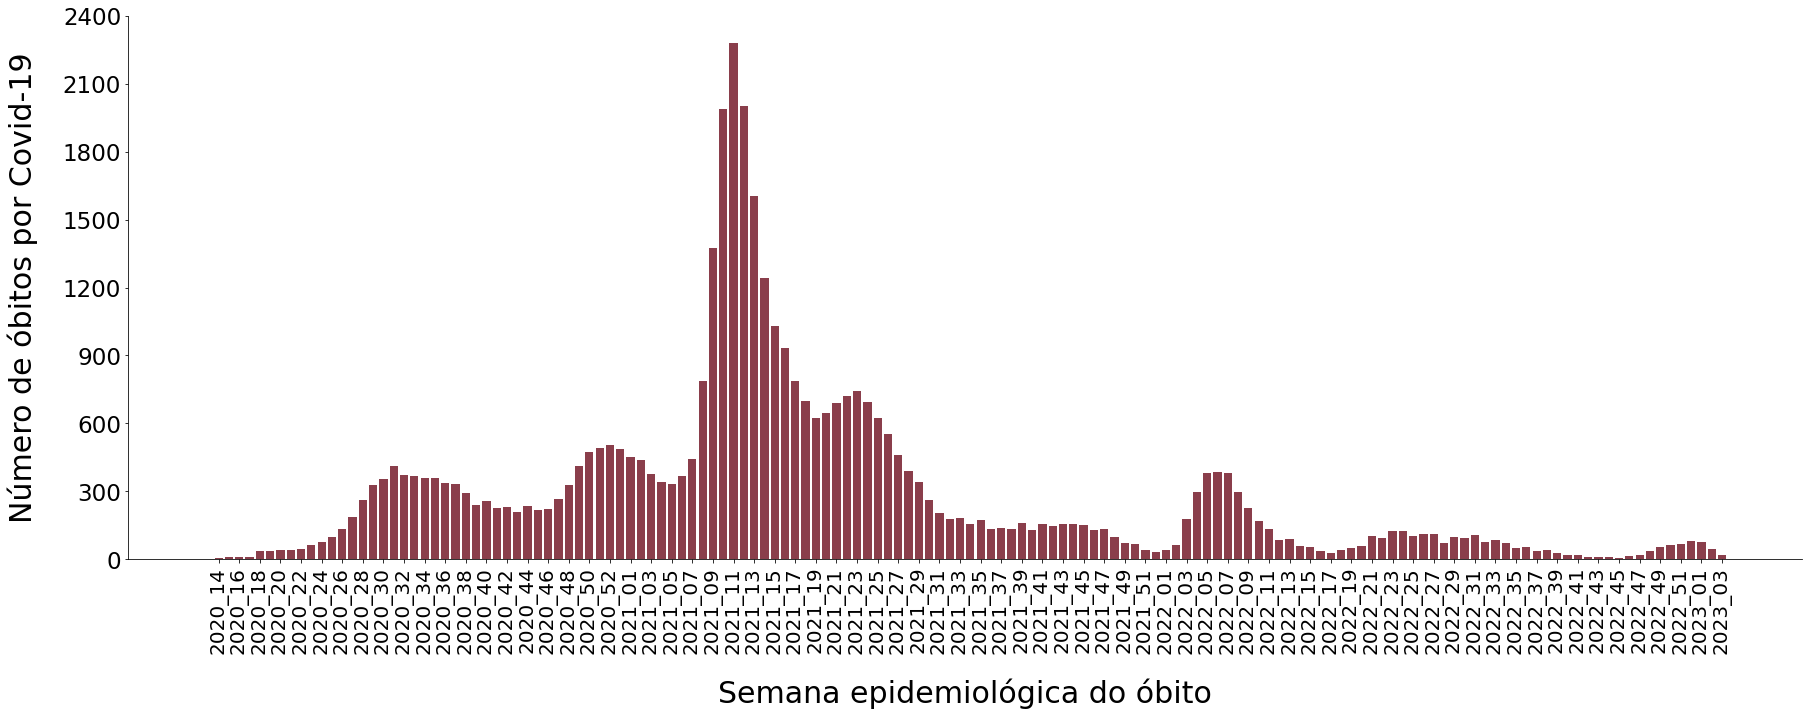

In [247]:
plt.figure(figsize=(30,10))
plt.bar(semana_obitos_Covid,obito_obitos_Covid,color='#8a3e4b')
sns.despine()
plt.xticks(np.arange(1,np.size(semana_obitos_Covid),2),rotation=90,fontsize=20)
plt.yticks(np.arange(0,2700,300),fontsize=23)
plt.xlabel('Semana epidemiológica do óbito',labelpad=25,fontsize=30)
plt.ylabel('Número de óbitos por Covid-19',labelpad=25,fontsize=30)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/obitos_Covid.png',dpi=300,bbox_inches='tight')

In [248]:
zoomObito = filtrado_obitos_Covid.copy()
zoomObito = zoomObito.set_index('Sem Epi Evolucao')
zoomObito = zoomObito['2022_01':]
zoomObito.head()

,Classificacao final,Evolucao
Sem Epi Evolucao,,
2022_01,42,42
2022_02,65,65
2022_03,179,179
2022_04,295,295
2022_05,383,383


In [249]:
zoomSemana_obito_Covid = zoomObito.copy()
zoomSemana_obito_Covid = zoomSemana_obito_Covid.reset_index()
zoomSemana_obito_Covid = zoomSemana_obito_Covid['Sem Epi Evolucao']
zoomSemana_obito_Covid

0     2022_01
1     2022_02
2     2022_03
3     2022_04
4     2022_05
5     2022_06
6     2022_07
7     2022_08
8     2022_09
9     2022_10
10    2022_11
11    2022_12
12    2022_13
13    2022_14
14    2022_15
15    2022_16
16    2022_17
17    2022_18
18    2022_19
19    2022_20
20    2022_21
21    2022_22
22    2022_23
23    2022_24
24    2022_25
25    2022_26
26    2022_27
27    2022_28
28    2022_29
29    2022_30
30    2022_31
31    2022_32
32    2022_33
33    2022_34
34    2022_35
35    2022_36
36    2022_37
37    2022_38
38    2022_39
39    2022_40
40    2022_41
41    2022_42
42    2022_43
43    2022_44
44    2022_45
45    2022_46
46    2022_47
47    2022_48
48    2022_49
49    2022_50
50    2022_51
51    2022_52
52    2023_01
53    2023_02
54    2023_03
Name: Sem Epi Evolucao, dtype: object

In [250]:
zoomObito = zoomObito['Evolucao']
zoomObito.head()

Sem Epi Evolucao
2022_01     42
2022_02     65
2022_03    179
2022_04    295
2022_05    383
Name: Evolucao, dtype: int64

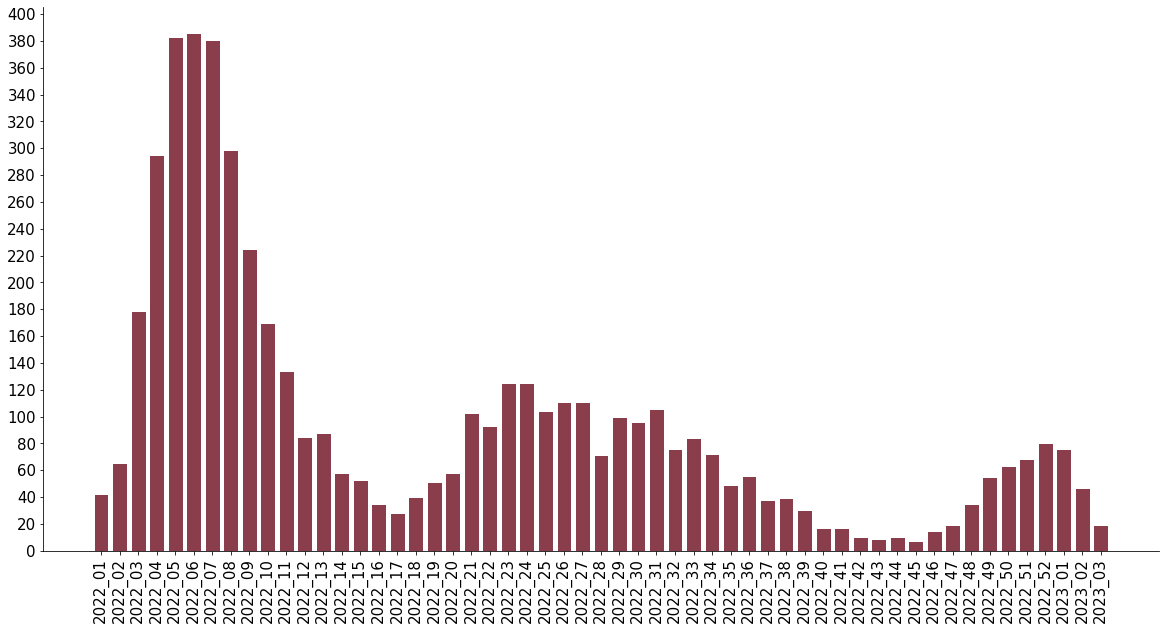

In [251]:
plt.figure(figsize=(20,10))
width=0.8
plt.bar(zoomSemana_obito_Covid,zoomObito,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.xticks(fontsize=15,rotation=90)
plt.yticks(np.arange(0,420,20),fontsize=15)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/obitosZoom_Covid.png',dpi=300,bbox_inches='tight')